# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import matplotlib as plt
%matplotlib inline

Dataframe actualizado, para que no tenga que buscar el código dentro de todo el documento.

In [3]:
archivo=pd.read_csv("miarchivo.csv")

In [4]:
archivo.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
def strtodatetime(string:str):
    return datetime.datetime.strptime(string, '%Y-%m-%dT%H:%M:%S')

def datetimetostr(dateTime:datetime.datetime):
    return datetime.datetime.strftime("%Y-%m-%dT%H:%M:%S")

In [6]:
archivo["TFS_Alarm_Time"]=archivo["TFS_Alarm_Time"].apply(lambda x: strtodatetime(x))
archivo["TFS_Arrival_Time"]=archivo["TFS_Arrival_Time"].apply(lambda x: strtodatetime(x))
archivo["Ext_agent_app_or_defer_time"]=archivo["Ext_agent_app_or_defer_time"].apply(lambda x: strtodatetime(x))
archivo["Fire_Under_Control_Time"]=archivo["Fire_Under_Control_Time"].apply(lambda x: strtodatetime(x))

# Getting the Data
Disclaimer:
Antes estaba usando [este dataset de yelp](https://www.kaggle.com/competitions/yelp-recsys-2013/data?select=yelp_training_set.zip), sin embargo desde que empezamos a usar regresión lineal me dí cuenta que no es un buen dataset para el tipo de análisis que estamos haciendo, por eso decidí cambiarlo y rehacer todo el código pero ahora con el nuevo dataset basado en [Fire Incidents de Toronto](https://www.kaggle.com/datasets/reihanenamdari/fire-incidents).

In [5]:
archivo = pd.read_csv("Fire-Incidents.csv")
#https://www.kaggle.com/competitions/yelp-recsys-2013/data?select=yelp_training_set.zip
#https://www.kaggle.com/datasets/reihanenamdari/fire-incidents

# Data Statistics

In [7]:
archivo = archivo.head(1000)
archivo.head()

Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact  Civilian_Casualties  \
0         No business interruption                    0   
1                     Undetermined                    0   
2  Not applicable (not a business)                    1   
3        May not resume operations                    0   
4  Not applicable (not a business)                    8   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24T17:06:26   
1                                     28         2018-11-24T07:19:00   
2                                    130         2017-02-09T18:02:13   
3                                     14         2012-10-30T00:52:04   
4                                      2         2018-07-08T04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation  ...  Longitude  \
0         Fire alarm system did not operate  ... -79.412479   
1                Fire alarm system operated  ... -79.530419   
2                Fire alarm system operated  ... -79.373460   
3  Fire alarm system operation undetermined  ... -79.393700   
4                Fire alarm system operated  ... -79.511539   

       Material_First_Ignited           Method_Of_Fire_Control  \
0  Undetermined (formerly 98)  Extinguished by fire department   
1                     Plastic         Extinguished by occupant   
2  Undetermined (formerly 98)  Extinguished by fire department   
3  Undetermined (formerly 98)  Extinguished by fire department   
4                     Bedding  Extinguished by fire department   

        Possible_Cause                         Property_Use  \
0         Undetermined  Multi-Unit Dwelling - Over 12 Units   
1  Under Investigation                            Infirmary   
2         Undetermined  Multi-Unit Dwelling - Over 12 Units   
3         Undetermined     Clothing Store, Accessories, fur   
4      Suspected Arson  Multi-Unit Dwelling - Over 12 Units   

            Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
0  Not applicable: Alarm operated OR presence/ope...   
1  Not applicable: Alarm operated OR presence/ope...   
2  Not applicable: Alarm operated OR presence/ope...   
3  Not applicable: Alarm operated OR presence/ope...   
4  Not applicable: Alarm operated OR presence/ope...   

   Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
0                 Hardwired (standalone)   
1                         Interconnected   
2                 Hardwired (standalone)   
3                      Type undetermined   
4                         Interconnected   

                           Status_of_Fire_On_Arrival       TFS_Alarm_Time  \
0  Fire with smoke showing only - including vehic...  2018-08-24T16:49:36   
1                 Fire extinguished prior to arrival  201

    ¿Cuántas columnas hay?

In [17]:
archivo.count()

Area_of_Origin                              1000
Business_Impact                             1000
Civilian_Casualties                         1000
Count_of_Persons_Rescued                    1000
Estimated_Dollar_Loss                       1000
Estimated_Number_Of_Persons_Displaced       1000
Ext_agent_app_or_defer_time                 1000
Extent_Of_Fire                              1000
Fire_Alarm_System_Impact_on_Evacuation      1000
Fire_Alarm_System_Operation                 1000
Fire_Alarm_System_Presence                  1000
Fire_Under_Control_Time                     1000
Ignition_Source                             1000
Incident_Station_Area                       1000
Incident_Ward                                999
Last_TFS_Unit_Clear_Time                    1000
Latitude                                    1000
Longitude                                   1000
Material_First_Ignited                      1000
Method_Of_Fire_Control                      1000
Possible_Cause      

    ¿Qué tipo de columnas hay?

In [8]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            1000 non-null   object 
 1   Business_Impact                           1000 non-null   object 
 2   Civilian_Casualties                       1000 non-null   int64  
 3   Count_of_Persons_Rescued                  1000 non-null   int64  
 4   Estimated_Dollar_Loss                     1000 non-null   int64  
 5   Estimated_Number_Of_Persons_Displaced     1000 non-null   int64  
 6   Ext_agent_app_or_defer_time               1000 non-null   object 
 7   Extent_Of_Fire                            1000 non-null   object 
 8   Fire_Alarm_System_Impact_on_Evacuation    1000 non-null   object 
 9   Fire_Alarm_System_Operation               1000 non-null   object 
 10  Fire_Alarm_System_Presence           

    ¿Cómo son?

In [9]:
archivo.describe()

Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
count          1000.000000               1000.000000           1.000000e+03   
mean              0.405000                  0.697000           6.007022e+04   
std               0.977717                  3.155495           1.940271e+05   
min               0.000000                  0.000000           0.000000e+00   
25%               0.000000                  0.000000           9.500000e+02   
50%               0.000000                  0.000000           6.000000e+03   
75%               1.000000                  1.000000           5.000000e+04   
max              15.000000                 86.000000           3.000000e+06   

       Estimated_Number_Of_Persons_Displaced  Incident_Station_Area  \
count                            1000.000000            1000.000000   
mean                               25.091000             290.061000   
std                               143.666394             108.964391   
min                                 0.000000             111.000000   
25%                                 0.000000             221.000000   
50%                                 0.000000             315.000000   
75%                                 2.000000             411.000000   
max                               997.000000             445.000000   

       Incident_Ward     Latitude    Longitude  
count     999.000000  1000.000000  1000.000000  
mean       13.984985    43.702555   -79.406927  
std         9.283056     0.049029     0.099353  
min         1.000000    43.588926   -79.635241  
25%         7.000000    43.662049   -79.476533  
50%        13.000000    43.695982   -79.410258  
75%        20.000000    43.744494   -79.342996  
max        44.000000    43.826079   -79.139500

    A verlos 👀

In [10]:
archivo.head()

Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact  Civilian_Casualties  \
0         No business interruption                    0   
1                     Undetermined                    0   
2  Not applicable (not a business)                    1   
3        May not resume operations                    0   
4  Not applicable (not a business)                    8   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24T17:06:26   
1                                     28         2018-11-24T07:19:00   
2                                    130         2017-02-09T18:02:13   
3                                     14         2012-10-30T00:52:04   
4                                      2         2018-07-08T04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation  ...  Longitude  \
0         Fire alarm system did not operate  ... -79.412479   
1                Fire alarm system operated  ... -79.530419   
2                Fire alarm system operated  ... -79.373460   
3  Fire alarm system operation undetermined  ... -79.393700   
4                Fire alarm system operated  ... -79.511539   

       Material_First_Ignited           Method_Of_Fire_Control  \
0  Undetermined (formerly 98)  Extinguished by fire department   
1                     Plastic         Extinguished by occupant   
2  Undetermined (formerly 98)  Extinguished by fire department   
3  Undetermined (formerly 98)  Extinguished by fire department   
4                     Bedding  Extinguished by fire department   

        Possible_Cause                         Property_Use  \
0         Undetermined  Multi-Unit Dwelling - Over 12 Units   
1  Under Investigation                            Infirmary   
2         Undetermined  Multi-Unit Dwelling - Over 12 Units   
3         Undetermined     Clothing Store, Accessories, fur   
4      Suspected Arson  Multi-Unit Dwelling - Over 12 Units   

            Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
0  Not applicable: Alarm operated OR presence/ope...   
1  Not applicable: Alarm operated OR presence/ope...   
2  Not applicable: Alarm operated OR presence/ope...   
3  Not applicable: Alarm operated OR presence/ope...   
4  Not applicable: Alarm operated OR presence/ope...   

   Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
0                 Hardwired (standalone)   
1                         Interconnected   
2                 Hardwired (standalone)   
3                      Type undetermined   
4                         Interconnected   

                           Status_of_Fire_On_Arrival       TFS_Alarm_Time  \
0  Fire with smoke showing only - including vehic...  2018-08-24T16:49:36   
1                 Fire extinguished prior to arrival  201

    A ver el final 👀

In [11]:
archivo.tail()

Area_of_Origin  \
995                                   Porch or Balcony   
996  Sleeping Area or Bedroom (inc. patients room, ...   
997                            Cooking Area or Kitchen   
998                                   Porch or Balcony   
999                                               Roof   

                         Business_Impact  Civilian_Casualties  \
995             No business interruption                    0   
996             No business interruption                    0   
997  May resume operations within a week                    0   
998             No business interruption                    0   
999             No business interruption                    0   

     Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
995                         0                   5000   
996                         0                    300   
997                         0                   1000   
998                         0                    200   
999                         0                  10000   

     Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
995                                      5         2019-04-13T00:04:00   
996                                      0         2019-04-16T21:01:18   
997                                      0         2019-04-16T21:44:01   
998                                      0         2019-04-16T13:31:00   
999                                      0         2019-04-16T14:01:28   

                              Extent_Of_Fire  \
995  Confined to part of room/area of origin   
996             Confined to object of origin   
997             Confined to object of origin   
998             Confined to object of origin   
999      Confined to roof/exterior structure   

                Fire_Alarm_System_Impact_on_Evacuation  \
995  Some persons (at risk) evacuated as a result o...   
996  Some persons (at risk) evacuated as a result o...   
997                                       Undetermined   
998  All persons (at risk of injury) evacuated as a...   
999                                       Undetermined   

                  Fire_Alarm_System_Operation  ...  Longitude  \
995                Fire alarm system operated  ... -79.219727   
996                Fire alarm system operated  ... -79.520678   
997  Fire alarm system operation undetermined  ... -79.357493   
998                Fire alarm system operated  ... -79.369578   
999  Fire alarm system operation undetermined  ... -79.297655   

               Material_First_Ignited            Method_Of_Fire_Control  \
995  Multiple diverse objects ignited         Action taken unclassified   
996                         Cabinetry          Extinguished by occupant   
997               Cooking Oil, Grease  Extinguished by automatic system   
998   Bush, Grass, Tree, Leaves, etc.          Extinguished by occupant   
999            Exterior Roof Covering          Extinguished by occupant   

                                       Possible_Cause  \
995                                      Undetermined   
996                                        Unattended   
997                 Unintentional, cause undetermined   
998                                        Unattended   
999  Other misuse of ignition source/material ignited   

                                          Property_Use  \
995                Multi-Unit Dwelling - Over 12 Units   
996            Apartment, Flat, Tenement with Business   
997  Restaurants (occupant load greater than 30 per...   
998                Multi-Unit Dwelling - Over 12 Units   
999                Other Business or Personal Services   

              Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
995  Not applicable: Alarm operated OR presence/ope...   
996  Not applicable: Alarm operated OR presence/ope...   
997  Not applicable: Alarm operated OR presence/ope...   
998  Not applicable: Alarm operated OR presence/ope...   
999  Not applicable: Alarm operated OR presence/ope...  

    A ver las estadísticas

In [12]:
archivo.describe()

Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
count          1000.000000               1000.000000           1.000000e+03   
mean              0.405000                  0.697000           6.007022e+04   
std               0.977717                  3.155495           1.940271e+05   
min               0.000000                  0.000000           0.000000e+00   
25%               0.000000                  0.000000           9.500000e+02   
50%               0.000000                  0.000000           6.000000e+03   
75%               1.000000                  1.000000           5.000000e+04   
max              15.000000                 86.000000           3.000000e+06   

       Estimated_Number_Of_Persons_Displaced  Incident_Station_Area  \
count                            1000.000000            1000.000000   
mean                               25.091000             290.061000   
std                               143.666394             108.964391   
min                                 0.000000             111.000000   
25%                                 0.000000             221.000000   
50%                                 0.000000             315.000000   
75%                                 2.000000             411.000000   
max                               997.000000             445.000000   

       Incident_Ward     Latitude    Longitude  
count     999.000000  1000.000000  1000.000000  
mean       13.984985    43.702555   -79.406927  
std         9.283056     0.049029     0.099353  
min         1.000000    43.588926   -79.635241  
25%         7.000000    43.662049   -79.476533  
50%        13.000000    43.695982   -79.410258  
75%        20.000000    43.744494   -79.342996  
max        44.000000    43.826079   -79.139500

In [13]:
archivo.mean()

C:\Users\anton\AppData\Local\Temp\ipykernel_69396\3590816725.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  archivo.mean()


Civilian_Casualties                          0.405000
Count_of_Persons_Rescued                     0.697000
Estimated_Dollar_Loss                    60070.221000
Estimated_Number_Of_Persons_Displaced       25.091000
Incident_Station_Area                      290.061000
Incident_Ward                               13.984985
Latitude                                    43.702555
Longitude                                  -79.406927
dtype: float64

In [14]:
archivo.median()

C:\Users\anton\AppData\Local\Temp\ipykernel_69396\1998407678.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  archivo.median()


Civilian_Casualties                         0.000000
Count_of_Persons_Rescued                    0.000000
Estimated_Dollar_Loss                    6000.000000
Estimated_Number_Of_Persons_Displaced       0.000000
Incident_Station_Area                     315.000000
Incident_Ward                              13.000000
Latitude                                   43.695982
Longitude                                 -79.410258
dtype: float64

In [15]:
archivo.std()

C:\Users\anton\AppData\Local\Temp\ipykernel_69396\340917962.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  archivo.std()


Civilian_Casualties                           0.977717
Count_of_Persons_Rescued                      3.155495
Estimated_Dollar_Loss                    194027.093788
Estimated_Number_Of_Persons_Displaced       143.666394
Incident_Station_Area                       108.964391
Incident_Ward                                 9.283056
Latitude                                      0.049029
Longitude                                     0.099353
dtype: float64

In [16]:
archivo.corr()

Civilian_Casualties  \
Civilian_Casualties                               1.000000   
Count_of_Persons_Rescued                          0.184198   
Estimated_Dollar_Loss                             0.141148   
Estimated_Number_Of_Persons_Displaced             0.070858   
Incident_Station_Area                             0.037831   
Incident_Ward                                     0.221819   
Latitude                                          0.002575   
Longitude                                         0.036592   

                                       Count_of_Persons_Rescued  \
Civilian_Casualties                                    0.184198   
Count_of_Persons_Rescued                               1.000000   
Estimated_Dollar_Loss                                  0.104344   
Estimated_Number_Of_Persons_Displaced                  0.010331   
Incident_Station_Area                                 -0.028794   
Incident_Ward                                          0.118075   
Latitude                                               0.010747   
Longitude                                             -0.004715   

                                       Estimated_Dollar_Loss  \
Civilian_Casualties                                 0.141148   
Count_of_Persons_Rescued                            0.104344   
Estimated_Dollar_Loss                               1.000000   
Estimated_Number_Of_Persons_Displaced               0.242692   
Incident_Station_Area                               0.020367   
Incident_Ward                                       0.076128   
Latitude                                           -0.016251   
Longitude                                           0.014577   

                                       Estimated_Number_Of_Persons_Displaced  \
Civilian_Casualties                                                 0.070858   
Count_of_Persons_Rescued                                            0.010331   
Estimated_Dollar_Loss                                               0.242692   
Estimated_Number_Of_Persons_Displaced                               1.000000   
Incident_Station_Area                                               0.011783   
Incident_Ward                                                      -0.003175   
Latitude                                                           -0.005716   
Longitude                                                          -0.027223   

                                       Incident_Station_Area  Incident_Ward  \
Civilian_Casualties                                 0.037831       0.221819   
Count_of_Persons_Rescued                           -0.028794       0.118075   
Estimated_Dollar_Loss                               0.020367       0.076128   
Estimated_Number_Of_Persons_Displaced               0.011783      -0.003175   
Incident_Station_Area                               1.000000      -0.386155   
Incident_Ward                                      -0.386155       1.000000   
Latitude                                           -0.654412       0.284212   
Longitude                                          -0.421223       0.816917   

                                       Latitude  Longitude  
Civilian_Casualties                    0.002575   0.036592  
Count_of_Persons_Rescued               0.010747  -0.004715  
Estimated_Dollar_Loss                 -0.016251   0.014577  
Estimated_Number_Of_Persons_Displaced -0.005716  -0.027223  
Incident_Station_Area                 -0.654412  -0.421223  
Incident_Ward                          0.284212   0.816917  
Latitude                               1.000000   0.236542  
Longitude                              0.236542   1.000000

In [18]:
archivo.max()

Area_of_Origin                              Washroom or Bathroom (toilet,restroom/locker r...
Business_Impact                                                                  Undetermined
Civilian_Casualties                                                                        15
Count_of_Persons_Rescued                                                                   86
Estimated_Dollar_Loss                                                                 3000000
Estimated_Number_Of_Persons_Displaced                                                     997
Ext_agent_app_or_defer_time                                               2019-06-29T11:04:29
Extent_Of_Fire                                                                   Undetermined
Fire_Alarm_System_Impact_on_Evacuation                                           Undetermined
Fire_Alarm_System_Operation                                        Not applicable (no system)
Fire_Alarm_System_Presence                                  

In [19]:
archivo.min()

Area_of_Origin                                                                  Attached Deck
Business_Impact                                                     May not resume operations
Civilian_Casualties                                                                         0
Count_of_Persons_Rescued                                                                    0
Estimated_Dollar_Loss                                                                       0
Estimated_Number_Of_Persons_Displaced                                                       0
Ext_agent_app_or_defer_time                                               2011-01-13T01:34:58
Extent_Of_Fire                                                   Confined to object of origin
Fire_Alarm_System_Impact_on_Evacuation      All persons (at risk of injury) evacuated as a...
Fire_Alarm_System_Operation                                 Fire alarm system did not operate
Fire_Alarm_System_Presence                                  

# Data Cleaning

In [5]:
archivo['Estimated_Number_Of_Persons_Displaced']

0          0
1         28
2        130
3         14
4          2
        ... 
11209      0
11210      0
11211      0
11212      1
11213      0
Name: Estimated_Number_Of_Persons_Displaced, Length: 11214, dtype: int64

In [9]:
archivo.isna().sum()

Area_of_Origin                              0
Business_Impact                             0
Civilian_Casualties                         0
Count_of_Persons_Rescued                    0
Estimated_Dollar_Loss                       0
Estimated_Number_Of_Persons_Displaced       0
Ext_agent_app_or_defer_time                 0
Extent_Of_Fire                              0
Fire_Alarm_System_Impact_on_Evacuation      0
Fire_Alarm_System_Operation                 0
Fire_Alarm_System_Presence                  0
Fire_Under_Control_Time                     0
Ignition_Source                             0
Incident_Station_Area                       0
Incident_Ward                               1
Last_TFS_Unit_Clear_Time                    0
Latitude                                    0
Longitude                                   0
Material_First_Ignited                      0
Method_Of_Fire_Control                      0
Possible_Cause                              0
Property_Use                      

Si hubiera alguna columna con datos nulos, lo intentaría llenar de la siguiente manera:

In [10]:
#Este código intenta llenar la mitad de los nulos de la columna, usando este patrón, explorando las 
#opciones de la función fillna como el argumento limit.

archivo["columna"].fillna(value={"A":np.nan,"B":"texto","C":np.nan,"D":"texto"},limit=2, inplace=True)

Again, como no hay datos nulos, no hay nada que dropear. Aun así, con este código se dropearían la mitad de los nulos que había originalmente, ya que en el paso anterior se llenó justamente la mitad de los nulos.

In [31]:
#EN ESTOS METODOS PARA QUE SURTA EFECTO EN EL DATASET ORIGINAL TIENES QUE PONER EL inplace=True
archivo.dropna(inplace=True)

Ordenado por la cantidad de dinero perdido:

In [14]:
archivo.sort_values(by="Estimated_Dollar_Loss",ascending=False)

Area_of_Origin  \
415                                 Lobby, Entranceway   
11                                                Roof   
221     Living Area (e.g. living, TV, recreation, etc)   
37                         Undetermined  (formerly 98)   
102                        Undetermined  (formerly 98)   
..                                                 ...   
796                              Court, Patio, Terrace   
388                                  Chimney/Flue Pipe   
151                            Cooking Area or Kitchen   
152  Washroom or Bathroom (toilet,restroom/locker r...   
611                                  Hallway, Corridor   

                     Business_Impact  Civilian_Casualties  \
415                     Undetermined                    0   
11                      Undetermined                    0   
221  Not applicable (not a business)                    2   
37         May not resume operations                    0   
102         No business interruption                    0   
..                               ...                  ...   
796  Not applicable (not a business)                    2   
388  Not applicable (not a business)                    0   
151         No business interruption                    1   
152         No business interruption                    0   
611         No business interruption                    0   

     Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
415                         0                3000000   
11                          7                2500000   
221                         1                2000000   
37                          3                1500000   
102                         1                1250000   
..                        ...                    ...   
796                         0                      0   
388                         0                      0   
151                         1                      0   
152                         1                      0   
611                         0                      0   

     Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
415                                      0         2018-02-26T23:04:00   
11                                       0         2019-05-06T17:14:21   
221                                      2         2013-05-16T01:45:00   
37                                     997         2013-07-13T05:07:00   
102                                      0         2018-10-31T03:30:20   
..                                     ...                         ...   
796                                      0         2018-10-05T19:47:00   
388                                      0         2018-02-17T17:22:00   
151                                      0         2015-12-10T19:22:22   
152                                      0         2011-02-28T00:10:00   
611                                      0         2018-04-13T04:49:56   

                                        Extent_Of_Fire  \
415       Spread to other floors, confined to building   
11        Spread to other floors, confined to building   
221       Spread to other floors, confined to building   
37   Spread beyond building of origin, resulted in ...   
102                                   Entire Structure   
..                                                 ...   
796            Confined to part of room/area of origin   
388                       Confined to object of origin   
151                       Confined to object of origin   
152                       Confined to object of origin   
611                       Confined to object of origin   

                Fire_Alarm_System_Impact_on_Evacuation  \
415  All persons (at risk of injury) evacuated as a...   
11   All persons (at risk of injury) evacuated as a...   
221                                       Undetermined   
37                                        Undetermined   
102                                       Undetermined   
.. 

Ordenado por la cantidad de vidas civiles perdidas:

In [17]:
archivo.sort_values(by="Civilian_Casualties", ascending=False)

Area_of_Origin  \
13                                   Hallway, Corridor   
7                              Cooking Area or Kitchen   
4    Sleeping Area or Bedroom (inc. patients room, ...   
20                             Cooking Area or Kitchen   
249     Living Area (e.g. living, TV, recreation, etc)   
..                                                 ...   
485                  Basement/cellar (not partitioned)   
486  Washroom or Bathroom (toilet,restroom/locker r...   
488                            Cooking Area or Kitchen   
489                            Cooking Area or Kitchen   
999                                               Roof   

                     Business_Impact  Civilian_Casualties  \
13          No business interruption                   15   
7           No business interruption                    8   
4    Not applicable (not a business)                    8   
20   Not applicable (not a business)                    6   
249  Not applicable (not a business)                    6   
..                               ...                  ...   
485  Not applicable (not a business)                    0   
486         No business interruption                    0   
488  Not applicable (not a business)                    0   
489  Not applicable (not a business)                    0   
999         No business interruption                    0   

     Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
13                          6                1000000   
7                          11                  50000   
4                          11                 125000   
20                          5                  50000   
249                         1                  40000   
..                        ...                    ...   
485                         0                   5000   
486                         0                   1000   
488                         0                     10   
489                         0                  15000   
999                         0                  10000   

     Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
13                                      50         2016-02-05T15:30:00   
7                                       40         2014-06-09T16:15:00   
4                                        2         2018-07-08T04:35:00   
20                                       6         2015-03-28T05:57:58   
249                                      6         2015-03-31T10:10:21   
..                                     ...                         ...   
485                                      0         2018-02-09T15:53:06   
486                                      0         2018-02-09T19:25:56   
488                                      0         2018-02-10T13:01:55   
489                                      6         2018-02-10T22:07:14   
999                                      0         2019-04-16T14:01:28   

                                   Extent_Of_Fire  \
13       Spread beyond room of origin, same floor   
7         Confined to part of room/area of origin   
4        Spread beyond room of origin, same floor   
20   Spread to other floors, confined to building   
249               Spread to entire room of origin   
..                                            ...   
485                  Confined to object of origin   
486                  Confined to object of origin   
488                  Confined to object of origin   
489       Confined to part of room/area of origin   
999           Confined to roof/exterior structure   

                Fire_Alarm_System_Impact_on_Evacuation  \
13   All persons (at risk of injury) evacuated as a...   
7    Not applicable: No fire alarm system, no perso...   
4    Some persons (at risk) evacuated as a result o...   
20   Not applicable: Occupant(s) first alerted by o...   
249  Some persons (at risk) evacuated as a result o...   
..                                                 ...   
485  

In [12]:
archivo.reset_index(drop=True)

Area_of_Origin  \
0                                     Porch or Balcony   
1                              Cooking Area or Kitchen   
2       Living Area (e.g. living, TV, recreation, etc)   
3                          Undetermined  (formerly 98)   
4    Sleeping Area or Bedroom (inc. patients room, ...   
..                                                 ...   
995                                   Porch or Balcony   
996  Sleeping Area or Bedroom (inc. patients room, ...   
997                            Cooking Area or Kitchen   
998                                   Porch or Balcony   
999                                               Roof   

                         Business_Impact  Civilian_Casualties  \
0               No business interruption                    0   
1                           Undetermined                    0   
2        Not applicable (not a business)                    1   
3              May not resume operations                    0   
4        Not applicable (not a business)                    8   
..                                   ...                  ...   
995             No business interruption                    0   
996             No business interruption                    0   
997  May resume operations within a week                    0   
998             No business interruption                    0   
999             No business interruption                    0   

     Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                          86                   3000   
1                          28                  50000   
2                          16                1000000   
3                          12                1000000   
4                          11                 125000   
..                        ...                    ...   
995                         0                   5000   
996                         0                    300   
997                         0                   1000   
998                         0                    200   
999                         0                  10000   

     Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                        0         2018-08-24T17:06:26   
1                                       28         2018-11-24T07:19:00   
2                                      130         2017-02-09T18:02:13   
3                                       14         2012-10-30T00:52:04   
4                                        2         2018-07-08T04:35:00   
..                                     ...                         ...   
995                                      5         2019-04-13T00:04:00   
996                                      0         2019-04-16T21:01:18   
997                                      0         2019-04-16T21:44:01   
998                                      0         2019-04-16T13:31:00   
999                                      0         2019-04-16T14:01:28   

                               Extent_Of_Fire  \
0                Confined to object of origin   
1     Confined to part of room/area of origin   
2    Spread beyond room of origin, same floor   
3                            Entire Structure   
4    Spread beyond room of origin, same floor   
..                                        ...   
995   Confined to part of room/area of origin   
996              Confined to object of origin   
997              Confined to object of origin   
998              Confined to object of origin   
999       Confined to roof/exterior structure   

                Fire_Alarm_System_Impact_on_Evacuation  \
0    Not applicable: Occupant(s) first alerted by o...   
1    Not applicable: Occupant(s) first alerted by o...   
2    Some persons (at risk) evacuated as a result o...   
3                                         Undetermined   
4    Some persons (at risk) evacuated as a result o...   
..                                                 ...   
995  

Analicemos en base al método que se usó para apagar el fuego.

In [21]:
archivoMethod=archivo.groupby("Method_Of_Fire_Control")
archivoMethod.sum()

Civilian_Casualties  \
Method_Of_Fire_Control                                  
Action taken unclassified                          10   
Extinguished by automatic system                    8   
Extinguished by fire department                   320   
Extinguished by occupant                           48   
Fire self extinguished                             19   

                                  Count_of_Persons_Rescued  \
Method_Of_Fire_Control                                       
Action taken unclassified                               13   
Extinguished by automatic system                         5   
Extinguished by fire department                        585   
Extinguished by occupant                                75   
Fire self extinguished                                  19   

                                  Estimated_Dollar_Loss  \
Method_Of_Fire_Control                                    
Action taken unclassified                        153600   
Extinguished by automatic system                 637005   
Extinguished by fire department                57292756   
Extinguished by occupant                         800190   
Fire self extinguished                          1186670   

                                  Estimated_Number_Of_Persons_Displaced  \
Method_Of_Fire_Control                                                    
Action taken unclassified                                           117   
Extinguished by automatic system                                    130   
Extinguished by fire department                                   22448   
Extinguished by occupant                                           1359   
Fire self extinguished                                             1037   

                                  Incident_Station_Area  Incident_Ward  \
Method_Of_Fire_Control                                                   
Action taken unclassified                          4609          311.0   
Extinguished by automatic system                  14025          552.0   
Extinguished by fire department                  200905        10127.0   
Extinguished by occupant                          50274         2157.0   
Fire self extinguished                            20248          824.0   

                                      Latitude     Longitude  
Method_Of_Fire_Control                                        
Action taken unclassified           743.148084  -1349.493469  
Extinguished by automatic system   2141.936275  -3891.681700  
Extinguished by fire department   30197.794774 -54868.418726  
Extinguished by occupant           7648.111521 -13896.821209  
Fire self extinguished             2971.564715  -5400.512344

In [19]:
archivoMethod.mean()

Civilian_Casualties  \
Method_Of_Fire_Control                                  
Action taken unclassified                    0.588235   
Extinguished by automatic system             0.163265   
Extinguished by fire department              0.463097   
Extinguished by occupant                     0.274286   
Fire self extinguished                       0.279412   

                                  Count_of_Persons_Rescued  \
Method_Of_Fire_Control                                       
Action taken unclassified                         0.764706   
Extinguished by automatic system                  0.102041   
Extinguished by fire department                   0.846599   
Extinguished by occupant                          0.428571   
Fire self extinguished                            0.279412   

                                  Estimated_Dollar_Loss  \
Method_Of_Fire_Control                                    
Action taken unclassified                   9035.294118   
Extinguished by automatic system           13000.102041   
Extinguished by fire department            82912.816208   
Extinguished by occupant                    4572.514286   
Fire self extinguished                     17451.029412   

                                  Estimated_Number_Of_Persons_Displaced  \
Method_Of_Fire_Control                                                    
Action taken unclassified                                      6.882353   
Extinguished by automatic system                               2.653061   
Extinguished by fire department                               32.486252   
Extinguished by occupant                                       7.765714   
Fire self extinguished                                        15.250000   

                                  Incident_Station_Area  Incident_Ward  \
Method_Of_Fire_Control                                                   
Action taken unclassified                    271.117647      18.294118   
Extinguished by automatic system             286.224490      11.500000   
Extinguished by fire department              290.745297      14.655572   
Extinguished by occupant                     287.280000      12.325714   
Fire self extinguished                       297.764706      12.117647   

                                   Latitude  Longitude  
Method_Of_Fire_Control                                  
Action taken unclassified         43.714593 -79.381969  
Extinguished by automatic system  43.712985 -79.422076  
Extinguished by fire department   43.701584 -79.404369  
Extinguished by occupant          43.703494 -79.410407  
Fire self extinguished            43.699481 -79.419299

In [20]:
archivoMethod.std()

Civilian_Casualties  \
Method_Of_Fire_Control                                  
Action taken unclassified                    1.003670   
Extinguished by automatic system             0.373438   
Extinguished by fire department              1.096641   
Extinguished by occupant                     0.638039   
Fire self extinguished                       0.568989   

                                  Count_of_Persons_Rescued  \
Method_Of_Fire_Control                                       
Action taken unclassified                         1.032558   
Extinguished by automatic system                  0.305839   
Extinguished by fire department                   3.609516   
Extinguished by occupant                          2.211331   
Fire self extinguished                            0.642885   

                                  Estimated_Dollar_Loss  \
Method_Of_Fire_Control                                    
Action taken unclassified                  11818.613031   
Extinguished by automatic system           20436.063927   
Extinguished by fire department           229112.746198   
Extinguished by occupant                   11517.600460   
Fire self extinguished                     50024.741584   

                                  Estimated_Number_Of_Persons_Displaced  \
Method_Of_Fire_Control                                                    
Action taken unclassified                                     24.051721   
Extinguished by automatic system                              11.002937   
Extinguished by fire department                              163.739616   
Extinguished by occupant                                      75.787490   
Fire self extinguished                                       120.839523   

                                  Incident_Station_Area  Incident_Ward  \
Method_Of_Fire_Control                                                   
Action taken unclassified                    113.150830      11.703443   
Extinguished by automatic system             115.832722       6.844784   
Extinguished by fire department              107.343180       9.415838   
Extinguished by occupant                     110.471177       8.814315   
Fire self extinguished                       117.556861       8.873118   

                                  Latitude  Longitude  
Method_Of_Fire_Control                                 
Action taken unclassified         0.046437   0.121791  
Extinguished by automatic system  0.054968   0.098139  
Extinguished by fire department   0.048444   0.098765  
Extinguished by occupant          0.049792   0.101384  
Fire self extinguished            0.049158   0.094906

Intentaré hace una función para cambiar el contenido de una columna en base a un criterio, esto concierne a la siguiente práctica.

In [28]:
archivo.columns

Index(['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties',
       'Count_of_Persons_Rescued', 'Estimated_Dollar_Loss',
       'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time',
       'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation',
       'Fire_Alarm_System_Operation', 'Fire_Alarm_System_Presence',
       'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area',
       'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'Latitude', 'Longitude',
       'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause',
       'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
       'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival',
       'TFS_Alarm_Time', 'TFS_Arrival_Time'],
      dtype='object')

In [52]:
column = "Smoke_Alarm_at_Fire_Origin_Alarm_Failure"

print("There are a total of " + str(archivo[column].nunique()) + " unique values\n")

print(archivo[column].unique())

There are a total of 11 unique values

['Not applicable: Alarm operated OR presence/operation undetermined'
 'Reason for inoperation undetermined' 'No battery' 'Other reason'
 'Dead battery' 'Remote from fire – smoke did not reach alarm'
 'Tampered with (vandalism)' 'Unit failure'
 'Improper installation of unit'
 'Electrical line or battery not connected'
 'Separated from fire (e.g. wall, etc)']


In [60]:
column = "Fire_Alarm_System_Impact_on_Evacuation"

print("There are a total of " + str(archivo[column].nunique()) + " unique values\n")

print(archivo[column].unique())

There are a total of 7 unique values

['Not applicable: Occupant(s) first alerted by other means'
 'Some persons (at risk) evacuated as a result of hearing fire alarm system'
 'Undetermined' 'Not applicable: No fire alarm system, no persons present'
 'All persons (at risk of injury) evacuated as a result of hearing fire alarm system'
 'No one (at risk) evacuated as a result of hearing fire alarm system'
 'Fire Alarm system operated but failed to alert occupant(s)']


I will work with this one.

In [47]:
column = "Fire_Alarm_System_Presence"

print("There are a total of " + str(archivo[column].nunique()) + " unique values\n")

print(archivo[column].unique())

There are a total of 4 unique values

['Fire alarm system present' 'Undetermined' 'No Fire alarm system'
 'Not applicable (bldg not classified by OBC OR detached/semi/town home)']


In [35]:
type(archivo["Fire_Alarm_System_Presence"][0])

str

In [57]:
def refactor(firealarm:str):
    ListaStatus=['Fire alarm system present','Undetermined','No Fire alarm system','Not applicable (bldg not classified by OBC OR detached/semi/town home)']
    ListaRefactored=['Present','Undetermined', 'No System', 'Not applicable']
    for element in ListaStatus:
        if firealarm == element:
            return ListaRefactored[ListaStatus.index(element)]
    
    
#print(refactor("No Fire alarm system"))


Guardaré los datos en una nueva columna, luego dropeo la vieja.

In [39]:
archivo["Fire_Alarm_System_Presence_(Refactored)"] = archivo["Fire_Alarm_System_Presence"].apply( lambda x: refactor(x))

In [41]:
column = "Fire_Alarm_System_Presence_(Refactored)"

print("There are a total of " + str(archivo[column].nunique()) + " unique values\n")

print(archivo[column].unique())

There are a total of 4 unique values

['Present' 'Undetermined' 'No System' 'Not applicable']


Dropeando columnas que considero innecesarias

In [58]:
#Por ahora solo he de dropear esta, no estoy seguro de si las otras columnas me pueden brindar información relevante.
archivo.drop("Fire_Alarm_System_Presence",axis=1,inplace=True)

#si quieres que afecte al original puedes hacer df = df.drop(filaocolumna,axis=filaocolumna) 
#o solo agregarle el  ->inplace=True<-- a los parámetros de la función drop sin asignarselo de nuevo a nada

archivo.head()

Area_of_Origin  \
0                                   Porch or Balcony   
1                            Cooking Area or Kitchen   
2     Living Area (e.g. living, TV, recreation, etc)   
3                        Undetermined  (formerly 98)   
4  Sleeping Area or Bedroom (inc. patients room, ...   

                   Business_Impact  Civilian_Casualties  \
0         No business interruption                    0   
1                     Undetermined                    0   
2  Not applicable (not a business)                    1   
3        May not resume operations                    0   
4  Not applicable (not a business)                    8   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   
1                        28                  50000   
2                        16                1000000   
3                        12                1000000   
4                        11                 125000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24T17:06:26   
1                                     28         2018-11-24T07:19:00   
2                                    130         2017-02-09T18:02:13   
3                                     14         2012-10-30T00:52:04   
4                                      2         2018-07-08T04:35:00   

                             Extent_Of_Fire  \
0              Confined to object of origin   
1   Confined to part of room/area of origin   
2  Spread beyond room of origin, same floor   
3                          Entire Structure   
4  Spread beyond room of origin, same floor   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   
1  Not applicable: Occupant(s) first alerted by o...   
2  Some persons (at risk) evacuated as a result o...   
3                                       Undetermined   
4  Some persons (at risk) evacuated as a result o...   

                Fire_Alarm_System_Operation  ...      Material_First_Ignited  \
0         Fire alarm system did not operate  ...  Undetermined (formerly 98)   
1                Fire alarm system operated  ...                     Plastic   
2                Fire alarm system operated  ...  Undetermined (formerly 98)   
3  Fire alarm system operation undetermined  ...  Undetermined (formerly 98)   
4                Fire alarm system operated  ...                     Bedding   

            Method_Of_Fire_Control       Possible_Cause  \
0  Extinguished by fire department         Undetermined   
1         Extinguished by occupant  Under Investigation   
2  Extinguished by fire department         Undetermined   
3  Extinguished by fire department         Undetermined   
4  Extinguished by fire department      Suspected Arson   

                          Property_Use  \
0  Multi-Unit Dwelling - Over 12 Units   
1                            Infirmary   
2  Multi-Unit Dwelling - Over 12 Units   
3     Clothing Store, Accessories, fur   
4  Multi-Unit Dwelling - Over 12 Units   

            Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
0  Not applicable: Alarm operated OR presence/ope...   
1  Not applicable: Alarm operated OR presence/ope...   
2  Not applicable: Alarm operated OR presence/ope...   
3  Not applicable: Alarm operated OR presence/ope...   
4  Not applicable: Alarm operated OR presence/ope...   

   Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
0                 Hardwired (standalone)   
1                         Interconnected   
2                 Hardwired (standalone)   
3                      Type undetermined   
4                         Interconnected   

                           Status_of_Fire_On_Arrival       TFS_Alarm_Time  \
0  Fire with smoke showing only - including vehic...  2018-08-24T16:49:36   
1                 Fire extinguished prior to arrival  2018-11-24T07:09:12   
2  Flames showing from small area (one storey 

Voy a cambiar el nombre de ciertas columnas

In [62]:
for element in archivo.columns:
    print(element)

Area_of_Origin
Business_Impact
Civilian_Casualties
Count_of_Persons_Rescued
Estimated_Dollar_Loss
Estimated_Number_Of_Persons_Displaced
Ext_agent_app_or_defer_time
Extent_Of_Fire
Fire_Alarm_System_Impact_on_Evacuation
Fire_Alarm_System_Operation
Fire_Under_Control_Time
Ignition_Source
Incident_Station_Area
Incident_Ward
Last_TFS_Unit_Clear_Time
Latitude
Longitude
Material_First_Ignited
Method_Of_Fire_Control
Possible_Cause
Property_Use
Smoke_Alarm_at_Fire_Origin_Alarm_Failure
Smoke_Alarm_at_Fire_Origin_Alarm_Type
Status_of_Fire_On_Arrival
TFS_Alarm_Time
TFS_Arrival_Time
Fire_Alarm_System_Presence_(Refactored)


In [63]:
columnas={
    "Latitude":"lat",
    "Longitude":"long",
    }
archivo.rename(columns=columnas,errors="raise",inplace=True)

archivo

Area_of_Origin  \
0                                     Porch or Balcony   
1                              Cooking Area or Kitchen   
2       Living Area (e.g. living, TV, recreation, etc)   
3                          Undetermined  (formerly 98)   
4    Sleeping Area or Bedroom (inc. patients room, ...   
..                                                 ...   
995                                   Porch or Balcony   
996  Sleeping Area or Bedroom (inc. patients room, ...   
997                            Cooking Area or Kitchen   
998                                   Porch or Balcony   
999                                               Roof   

                         Business_Impact  Civilian_Casualties  \
0               No business interruption                    0   
1                           Undetermined                    0   
2        Not applicable (not a business)                    1   
3              May not resume operations                    0   
4        Not applicable (not a business)                    8   
..                                   ...                  ...   
995             No business interruption                    0   
996             No business interruption                    0   
997  May resume operations within a week                    0   
998             No business interruption                    0   
999             No business interruption                    0   

     Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                          86                   3000   
1                          28                  50000   
2                          16                1000000   
3                          12                1000000   
4                          11                 125000   
..                        ...                    ...   
995                         0                   5000   
996                         0                    300   
997                         0                   1000   
998                         0                    200   
999                         0                  10000   

     Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                        0         2018-08-24T17:06:26   
1                                       28         2018-11-24T07:19:00   
2                                      130         2017-02-09T18:02:13   
3                                       14         2012-10-30T00:52:04   
4                                        2         2018-07-08T04:35:00   
..                                     ...                         ...   
995                                      5         2019-04-13T00:04:00   
996                                      0         2019-04-16T21:01:18   
997                                      0         2019-04-16T21:44:01   
998                                      0         2019-04-16T13:31:00   
999                                      0         2019-04-16T14:01:28   

                               Extent_Of_Fire  \
0                Confined to object of origin   
1     Confined to part of room/area of origin   
2    Spread beyond room of origin, same floor   
3                            Entire Structure   
4    Spread beyond room of origin, same floor   
..                                        ...   
995   Confined to part of room/area of origin   
996              Confined to object of origin   
997              Confined to object of origin   
998              Confined to object of origin   
999       Confined to roof/exterior structure   

                Fire_Alarm_System_Impact_on_Evacuation  \
0    Not applicable: Occupant(s) first alerted by o...   
1    Not applicable: Occupant(s) first alerted by o...   
2    Some persons (at risk) evacuated as a result o...   
3                                         Undetermined   
4    Some persons (at risk) evacuated as a result o...   
..                                                 ...   
995  

In [3]:
type(archivo["TFS_Alarm_Time"][0])

str

In [42]:
import datetime

In [5]:
#ejemplo
datetime.datetime.strptime("2018-08-24T16:49:36", '%Y-%m-%dT%H:%M:%S')

datetime.datetime(2018, 8, 24, 16, 49, 36)

In [84]:
def strtodatetime(string:str):
    return datetime.datetime.strptime(string, '%Y-%m-%dT%H:%M:%S')

def datetimetostr(dateTime:datetime.datetime):
    return datetime.datetime.strftime("%Y-%m-%dT%H:%M:%S")

In [13]:
list=[]
for element in archivo['TFS_Alarm_Time']:
    list.append(type(element))
    
x = np.array(list)
x

array([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'st

In [9]:
archivo["TFS_Alarm_Time"].iloc[0]

'2018-08-24 16:49:36'

In [ ]:
archivo["TFS_Alarm_Time"][0]=datetimetostr(archivo["TFS_Alarm_Time"][0])

There's a date that don't match the format, I want to locate where it is.
(Hint: it's the same as above)

In [21]:
#I found it

#archivo[archivo["TFS_Alarm_Time"]=='2018-08-24 16:49:36']
#archivo.loc[lambda df: df["TFS_Alarm_Time"] == '2018-08-24 16:49:36']

archivo.loc[lambda df: df["TFS_Alarm_Time"] == '2018-08-24 16:49:36',"TFS_Alarm_Time"]

Area_of_Origin           Business_Impact  Civilian_Casualties  \
0  Porch or Balcony  No business interruption                    0   

   Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0                        86                   3000   

   Estimated_Number_Of_Persons_Displaced Ext_agent_app_or_defer_time  \
0                                      0         2018-08-24T17:06:26   

                 Extent_Of_Fire  \
0  Confined to object of origin   

              Fire_Alarm_System_Impact_on_Evacuation  \
0  Not applicable: Occupant(s) first alerted by o...   

         Fire_Alarm_System_Operation  ...      Material_First_Ignited  \
0  Fire alarm system did not operate  ...  Undetermined (formerly 98)   

            Method_Of_Fire_Control  Possible_Cause  \
0  Extinguished by fire department    Undetermined   

                          Property_Use  \
0  Multi-Unit Dwelling - Over 12 Units   

            Smoke_Alarm_at_Fire_Origin_Alarm_Failure  \
0  Not applicable: Alarm operated OR presence/ope...   

   Smoke_Alarm_at_Fire_Origin_Alarm_Type  \
0                 Hardwired (standalone)   

                           Status_of_Fire_On_Arrival       TFS_Alarm_Time  \
0  Fire with smoke showing only - including vehic...  2018-08-24 16:49:36   

      TFS_Arrival_Time Fire_Alarm_System_Presence_(Refactored)  
0  2018-08-24T16:54:09                                 Present  

[1 rows x 27 columns]

In [27]:
#I'm formatting the issue

archivo.loc[lambda df: df["TFS_Alarm_Time"] == '2018-08-24 16:49:36',"TFS_Alarm_Time"] = '2018-08-24T16:49:36'

In [28]:
#Let's see
archivo.loc[lambda df: df["TFS_Alarm_Time"] == '2018-08-24 16:49:36',"TFS_Alarm_Time"]

#Well done!

Series([], Name: TFS_Alarm_Time, dtype: object)

Let's try to parse again.

In [85]:
archivo["TFS_Alarm_Time"].apply(lambda x: strtodatetime(x))

0     2018-08-24 16:49:36
1     2018-11-24 07:09:12
2     2017-02-09 17:45:07
3     2012-10-30 00:42:01
4     2018-07-08 04:08:50
              ...        
994   2019-04-12 23:55:26
995   2019-04-16 20:52:57
996   2019-04-16 21:39:29
997   2019-04-16 13:26:57
998   2019-04-16 13:50:14
Name: TFS_Alarm_Time, Length: 999, dtype: datetime64[ns]

In [35]:
archivo.set_index("TFS_Alarm_Time")

Area_of_Origin  \
TFS_Alarm_Time                                                           
2018-08-24T16:49:36                                   Porch or Balcony   
2018-11-24T07:09:12                            Cooking Area or Kitchen   
2017-02-09T17:45:07     Living Area (e.g. living, TV, recreation, etc)   
2012-10-30T00:42:01                        Undetermined  (formerly 98)   
2018-07-08T04:08:50  Sleeping Area or Bedroom (inc. patients room, ...   
...                                                                ...   
2019-04-12T23:55:26                                   Porch or Balcony   
2019-04-16T20:52:57  Sleeping Area or Bedroom (inc. patients room, ...   
2019-04-16T21:39:29                            Cooking Area or Kitchen   
2019-04-16T13:26:57                                   Porch or Balcony   
2019-04-16T13:50:14                                               Roof   

                                         Business_Impact  Civilian_Casualties  \
TFS_Alarm_Time                                                                  
2018-08-24T16:49:36             No business interruption                    0   
2018-11-24T07:09:12                         Undetermined                    0   
2017-02-09T17:45:07      Not applicable (not a business)                    1   
2012-10-30T00:42:01            May not resume operations                    0   
2018-07-08T04:08:50      Not applicable (not a business)                    8   
...                                                  ...                  ...   
2019-04-12T23:55:26             No business interruption                    0   
2019-04-16T20:52:57             No business interruption                    0   
2019-04-16T21:39:29  May resume operations within a week                    0   
2019-04-16T13:26:57             No business interruption                    0   
2019-04-16T13:50:14             No business interruption                    0   

                     Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
TFS_Alarm_Time                                                         
2018-08-24T16:49:36                        86                   3000   
2018-11-24T07:09:12                        28                  50000   
2017-02-09T17:45:07                        16                1000000   
2012-10-30T00:42:01                        12                1000000   
2018-07-08T04:08:50                        11                 125000   
...                                       ...                    ...   
2019-04-12T23:55:26                         0                   5000   
2019-04-16T20:52:57                         0                    300   
2019-04-16T21:39:29                         0                   1000   
2019-04-16T13:26:57                         0                    200   
2019-04-16T13:50:14                         0                  10000   

                     Estimated_Number_Of_Persons_Displaced  \
TFS_Alarm_Time                                               
2018-08-24T16:49:36                                      0   
2018-11-24T07:09:12                                     28   
2017-02-09T17:45:07                                    130   
2012-10-30T00:42:01                                     14   
2018-07-08T04:08:50                                      2   
...                                                    ...   
2019-04-12T23:55:26                                      5   
2019-04-16T20:52:57                                      0   
2019-04-16T21:39:29                                      0   
2019-04-16T13:26:57                                      0   
2019-04-16T13:50:14                                      0   

                    Ext_agent_app_or_defer_time  \
TFS_Alarm_Time                                    
2018-08-24T16:49:36         2018-08-24T17:06:26   
2018-11-24T07:09:12         2018-11-24T07:19:00   
2017-02-09T17:45:07         2017-02-09T18:02:13   
2012-10-30T00:42:01         2012-10-30T0

In [65]:
archivo["TFS_Arrival_Time"][0]

'2018-08-24T16:54:09'

In [66]:
archivo["TFS_Arrival_Time"].apply(lambda x: strtodatetime(x))

0     2018-08-24 16:54:09
1     2018-11-24 07:14:23
2     2017-02-09 17:48:49
3     2012-10-30 00:44:58
4     2018-07-08 04:13:54
              ...        
995   2019-04-13 00:02:11
996   2019-04-16 20:57:20
997   2019-04-16 21:44:00
998   2019-04-16 13:30:29
999   2019-04-16 13:56:17
Name: TFS_Arrival_Time, Length: 999, dtype: datetime64[ns]

In [67]:
archivo["Ext_agent_app_or_defer_time"][0]

'2018-08-24T17:06:26'

In [68]:
archivo["Ext_agent_app_or_defer_time"].apply(lambda x: strtodatetime(x))

0     2018-08-24 17:06:26
1     2018-11-24 07:19:00
2     2017-02-09 18:02:13
3     2012-10-30 00:52:04
4     2018-07-08 04:35:00
              ...        
995   2019-04-13 00:04:00
996   2019-04-16 21:01:18
997   2019-04-16 21:44:01
998   2019-04-16 13:31:00
999   2019-04-16 14:01:28
Name: Ext_agent_app_or_defer_time, Length: 999, dtype: datetime64[ns]

In [69]:
archivo["Fire_Under_Control_Time"][0]

'2018-08-24T17:06:28'

In [70]:
archivo["Fire_Under_Control_Time"].apply(lambda x: strtodatetime(x))

0     2018-08-24 17:06:28
1     2018-11-24 07:19:00
2     2017-02-09 18:36:21
3     2012-10-30 01:28:48
4     2018-07-08 04:38:28
              ...        
995   2019-04-13 00:05:50
996   2019-04-16 20:58:00
997   2019-04-16 21:44:00
998   2019-04-16 13:31:00
999   2019-04-16 14:31:32
Name: Fire_Under_Control_Time, Length: 999, dtype: datetime64[ns]

In [71]:
#archivo.to_csv("miarchivo.csv")

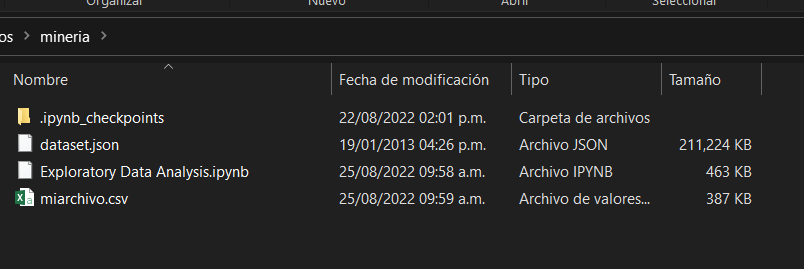

In [15]:
archivo=pd.read_csv("miarchivo.csv")

In [3]:
archivo.drop("Unnamed: 0",axis=1,inplace=True)

# Plotting

In [20]:
import matplotlib as plt
%matplotlib inline

### Vamos a ver que tipo de columnas podemos plotear, primero voy a checar cuales son las columnas numericas.

In [43]:
archivo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Area_of_Origin                            999 non-null    object 
 1   Business_Impact                           999 non-null    object 
 2   Civilian_Casualties                       999 non-null    int64  
 3   Count_of_Persons_Rescued                  999 non-null    int64  
 4   Estimated_Dollar_Loss                     999 non-null    int64  
 5   Estimated_Number_Of_Persons_Displaced     999 non-null    int64  
 6   Ext_agent_app_or_defer_time               999 non-null    object 
 7   Extent_Of_Fire                            999 non-null    object 
 8   Fire_Alarm_System_Impact_on_Evacuation    999 non-null    object 
 9   Fire_Alarm_System_Operation               999 non-null    object 
 10  Fire_Under_Control_Time               

In [7]:
def uniqueValue(archivo: pd.DataFrame, column: str):
    print("There are a total of " + str(archivo[column].nunique()) + " unique values\n")
    print(archivo[column].unique())

#### Columnas numéricas (int y float).

Lat y long corresponden a coordenadas, esas no.

Incident ward no sé qué hace, vamos a ver. 

Incident_Ward: "Ward where the incident occurred, when available"

In [45]:
archivo["Incident_Ward"]

0      18.0
1       7.0
2      27.0
3      20.0
4       5.0
       ... 
995    24.0
996     5.0
997    16.0
998    10.0
999    21.0
Name: Incident_Ward, Length: 999, dtype: float64

Incident_Station_Area: TFS Station area where the incident occurred

In [46]:
archivo["Incident_Station_Area"]

0      114
1      142
2      325
3      332
4      442
      ... 
995    231
996    442
997    122
998    333
999    245
Name: Incident_Station_Area, Length: 999, dtype: int64

El resto de las columnas numéricas son autodescriptivas.
- Civilian_Casualties
- Count_of_Persons_Rescued
- Estimated_Dollar_Loss

#### Columnas string o categóricas.

- Area_of_Origin
- Business_Impact
- Extent_Of_Fire
- Fire_Alarm_System_Impact_on_Evacuation
- Fire_Alarm_System_Operation
- Ignition_Source
- Material_First_Ignited
- Method_Of_Fire_Control
- Possible_Cause
- Smoke_Alarm_at_Fire_Origin_Alarm_Failure
- Smoke_Alarm_at_Fire_Origin_Alarm_Type
- Status_of_Fire_On_Arrival
- Fire_Alarm_System_Presence_(Refactored)

Vamos a explorar algunas de estas columnas para ver cuál nos conviene más graficar sin que se vea tan mal y aparte que nos de información útil.

In [49]:
uniqueValue(archivo, "Area_of_Origin")

There are a total of 62 unique values

['Porch or Balcony' 'Cooking Area or Kitchen'
 'Living Area (e.g. living, TV, recreation, etc)'
 'Undetermined  (formerly 98)'
 'Sleeping Area or Bedroom (inc. patients room, dormitory, etc)'
 'Engine Area' 'Concealed Ceiling Area' 'Hallway, Corridor' 'Laundry Area'
 'Roof' 'Electrical Systems' 'Storage Area (outside)'
 'Basement/cellar (not partitioned)' 'Court, Patio, Terrace'
 'Lobby, Entranceway'
 'Trash, Rubbish Storage (inc garbage chute room, garbage/industri'
 'Other Outside Area' 'Closet (eg. clothes, broom, linen closet, etc.)'
 'Garage' 'Trash, rubbish area (outside)'
 'Dining or Beverage Area (inc mess, canteen, lunchroom, cafeteria'
 'Washroom or Bathroom (toilet,restroom/locker room)' 'Attached Deck'
 'Other - unclassified' 'Mechanical/Electrical Services Room'
 'Other Storage Area' 'Stairway, Escalator' 'Attic Area'
 'Other Structural Area'
 'HVAC Equipment Room (furnace room, water heater closet, boiler)'
 'Office' 'Exterior Wall'


In [53]:
uniqueValue(archivo, "Business_Impact") #🌟

There are a total of 7 unique values

['No business interruption' 'Undetermined'
 'Not applicable (not a business)' 'May not resume operations'
 'May resume operations within a month'
 'May resume operations within a week'
 'May resume operations within a year']


In [60]:
uniqueValue(archivo, "Extent_Of_Fire")

There are a total of 12 unique values

['Confined to object of origin' 'Confined to part of room/area of origin'
 'Spread beyond room of origin, same floor' 'Entire Structure'
 'Spread to other floors, confined to building'
 'Spread to entire room of origin'
 'Spread beyond building of origin, resulted in exposure fire(s)'
 'Undetermined' 'Multi unit bldg: spread to separate suite(s)'
 'Confined to roof/exterior structure'
 'Multi unit bldg: spread beyond suite of origin but not to separated suite(s)'
 'Spread beyond building of origin']


In [56]:
uniqueValue(archivo, "Fire_Alarm_System_Impact_on_Evacuation")

There are a total of 7 unique values

['Not applicable: Occupant(s) first alerted by other means'
 'Some persons (at risk) evacuated as a result of hearing fire alarm system'
 'Undetermined' 'Not applicable: No fire alarm system, no persons present'
 'All persons (at risk of injury) evacuated as a result of hearing fire alarm system'
 'No one (at risk) evacuated as a result of hearing fire alarm system'
 'Fire Alarm system operated but failed to alert occupant(s)']


In [59]:
uniqueValue(archivo, "Method_Of_Fire_Control") #🌟

There are a total of 5 unique values

['Extinguished by fire department' 'Extinguished by occupant'
 'Action taken unclassified' 'Fire self extinguished'
 'Extinguished by automatic system']


In [61]:
uniqueValue(archivo, "Possible_Cause")

There are a total of 21 unique values

['Undetermined' 'Under Investigation' 'Suspected Arson'
 'Electrical Failure' 'Unattended'
 'Used or Placed too close to combustibles' 'Improperly Discarded'
 'Children Playing (Ages 11 and under)' 'Improper Storage'
 'Improper handling of ignition source or ignited material'
 'Other unintentional cause, not classified'
 'Design/Construction/Installation/Maintenance Deficiency'
 'Mechanical Failure' 'Unintentional, cause undetermined'
 'Used for purpose not intended' 'Exposure fire'
 'Other misuse of ignition source/material ignited'
 'Routine maintenance deficiency, eg creosote, lint, grease buildup'
 'Suspected Vandalism' 'Suspected Youth Vandalism (Ages 12 to 17)'
 'Natural Cause']


In [62]:
uniqueValue(archivo, "Status_of_Fire_On_Arrival")

There are a total of 8 unique values

['Fire with smoke showing only - including vehicle, outdoor fires'
 'Fire extinguished prior to arrival'
 'Flames showing from small area (one storey or less, part of a vehicle, outdoor)'
 'Flames showing from large area (more than one storey, large area outdoors)'
 'Fire with no evidence from street'
 'Fully involved (total structure, vehicle, spreading outdoor fire)'
 'Unclassified' 'Exposure involved']


In [64]:
uniqueValue(archivo, "Fire_Alarm_System_Presence_(Refactored)") #🌟

There are a total of 4 unique values

['Present' 'Undetermined' 'No System' 'Not applicable']


Con esto concluyo que las mejores columnas categóricas para graficar sin desordenar mucho las graficas son:
- Fire_Alarm_System_Presence_(Refactored)
- Method_Of_Fire_Control
- Business_Impact

#### Columnas Time

- TFS_Alarm_Time
- TFS_Arrival_Time
- Ext_agent_app_or_defer_time
- Fire_Under_Control_Time

Creo que las tres que más nos interesan son:
- TFS_Alarm_Time <- Sobre todo esta 
- TFS_Arrival_Time
- Fire_Under_Control_Time <- Y esta

### Empezamos a plotear

In [17]:
#Funcion original, crea todos los dataframes A LA MISMA ESCALA, no es útil así que hay que reordenar las cosas un poco

def boxplot_por_tipo(dataframe,column: str, dateColumn:str, agg_fn = pd.DataFrame.sum):
    
    #Limpio los datos
    df = dataframe.drop(["Incident_Station_Area","lat","long"], axis=1)
    
    df_by_type = df.groupby([column,dateColumn]).aggregate(agg_fn)
    df_by_type.boxplot(by = column, figsize=(15,9))

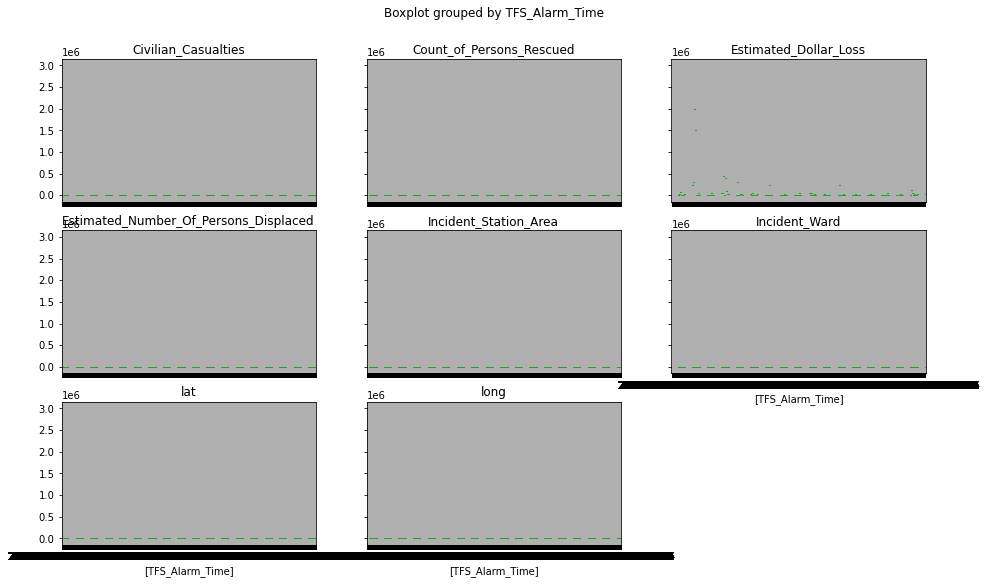

In [85]:
boxplot_por_tipo(archivo,"Fire_Alarm_System_Presence_(Refactored)","TFS_Alarm_Time")

¿Cómo es el dataframe agrupado por __TFS_Alarm_Time__ y __Fire_Alarm_System_Presence_(Refactored)__?

In [31]:
df_by_type = archivo.groupby(["TFS_Alarm_Time","Fire_Alarm_System_Presence_(Refactored)"]).sum()
df_by_type[["Estimated_Dollar_Loss"]]

Estimated_Dollar_Loss
TFS_Alarm_Time      Fire_Alarm_System_Presence_(Refactored)                       
2011-01-13T01:28:21 Present                                                  15600
2011-01-14T08:37:06 Present                                                   5000
2011-01-24T06:34:30 Present                                                  50000
2011-01-28T01:08:35 Not applicable                                          100000
2011-02-12T16:13:28 Present                                                 400000
...                                                                            ...
2019-05-18T06:25:18 Present                                                  15000
2019-06-16T11:32:38 Present                                                  15000
2019-06-18T22:10:31 Not applicable                                             200
2019-06-27T23:44:15 Present                                                  20000
2019-06-29T10:59:25 Present                                                  20000

[999 rows x 1 columns]

### Veamos unas gráficas

In [66]:
df = archivo.drop(["Incident_Station_Area","lat","long"], axis=1)

df_by_type = df.groupby(["TFS_Alarm_Time","Fire_Alarm_System_Presence_(Refactored)"]).sum()
df_by_type.columns

Index(['Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Incident_Ward'],
      dtype='object')

<AxesSubplot:title={'center':'Incident_Ward'}, xlabel='[Fire_Alarm_System_Presence_(Refactored)]'>

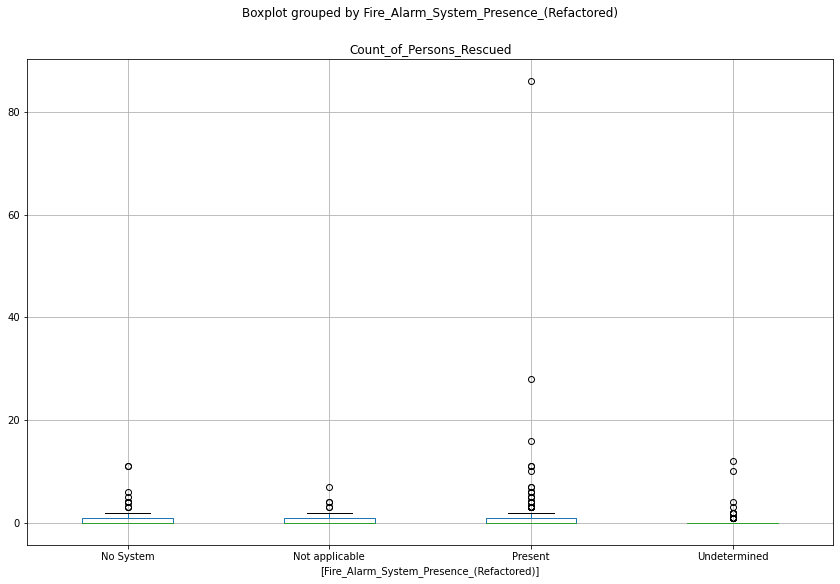

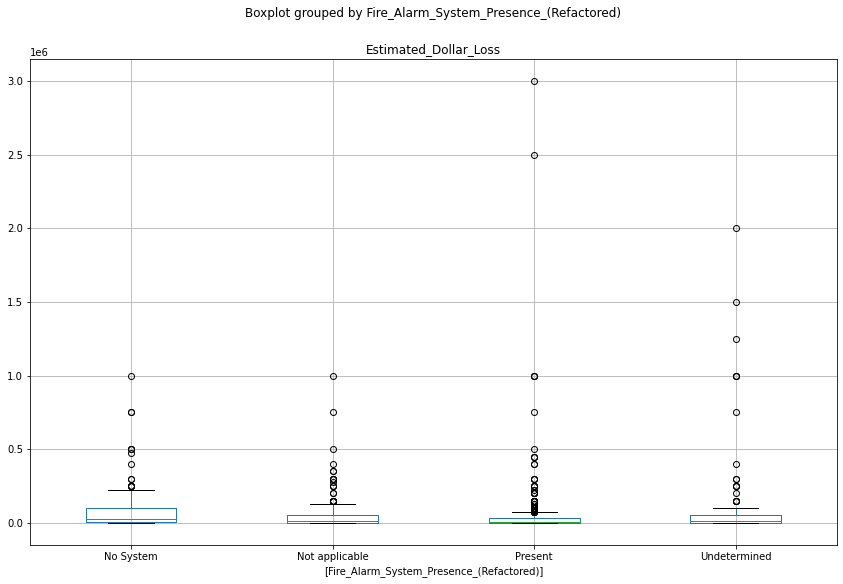

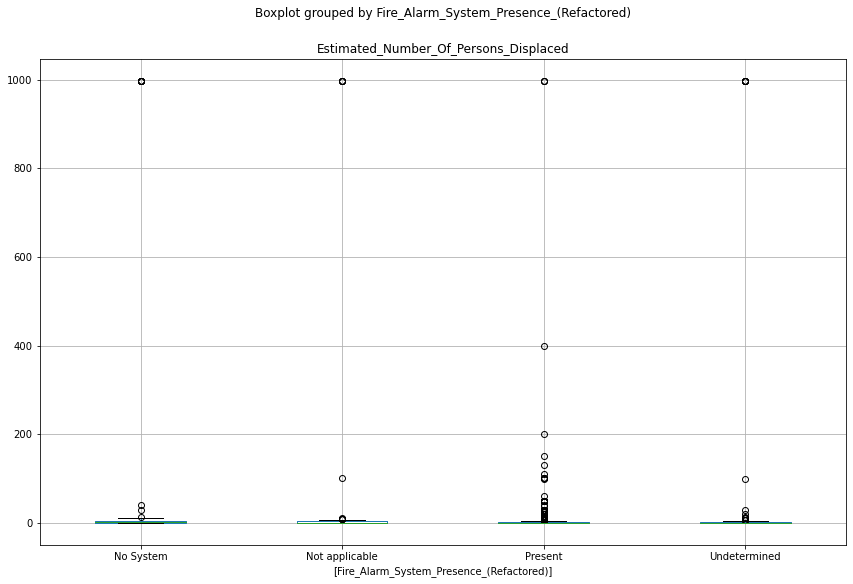

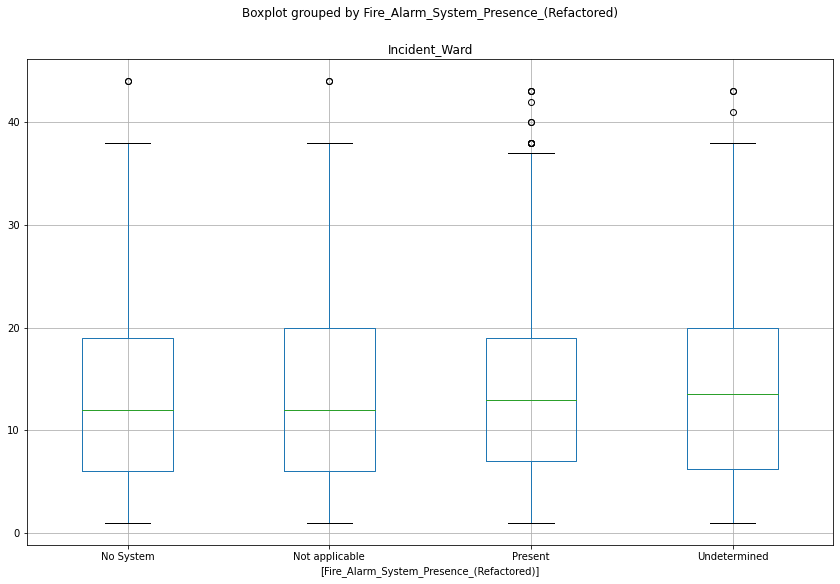

In [69]:
df_plot = df_by_type["Count_of_Persons_Rescued"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Fire_Alarm_System_Presence_(Refactored)", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Estimated_Dollar_Loss"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Fire_Alarm_System_Presence_(Refactored)", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Estimated_Number_Of_Persons_Displaced"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Fire_Alarm_System_Presence_(Refactored)", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Incident_Ward"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Fire_Alarm_System_Presence_(Refactored)", figsize=(14,9))

¿Cómo es el dataframe agrupado por __inserte_columna_fecha__ y __inserte_columna__?

¿Cómo es el dataframe agrupado por __TFS_Alarm_Time__ y __Method_Of_Fire_Control__?

In [70]:
df_by_type = archivo.groupby(["TFS_Alarm_Time","Method_Of_Fire_Control"]).sum()
df_by_type[["Estimated_Dollar_Loss"]]

Estimated_Dollar_Loss
TFS_Alarm_Time      Method_Of_Fire_Control                                 
2011-01-13T01:28:21 Action taken unclassified                         15600
2011-01-14T08:37:06 Extinguished by fire department                    5000
2011-01-24T06:34:30 Extinguished by fire department                   50000
2011-01-28T01:08:35 Extinguished by fire department                  100000
2011-02-12T16:13:28 Extinguished by fire department                  400000
...                                                                     ...
2019-05-18T06:25:18 Extinguished by fire department                   15000
2019-06-16T11:32:38 Extinguished by fire department                   15000
2019-06-18T22:10:31 Extinguished by occupant                            200
2019-06-27T23:44:15 Extinguished by fire department                   20000
2019-06-29T10:59:25 Extinguished by automatic system                  20000

[999 rows x 1 columns]

In [71]:
df_by_type = df.groupby(["TFS_Alarm_Time","Method_Of_Fire_Control"]).sum()
df_by_type.columns

Index(['Civilian_Casualties', 'Count_of_Persons_Rescued',
       'Estimated_Dollar_Loss', 'Estimated_Number_Of_Persons_Displaced',
       'Incident_Ward'],
      dtype='object')

<AxesSubplot:title={'center':'Incident_Ward'}, xlabel='[Method_Of_Fire_Control]'>

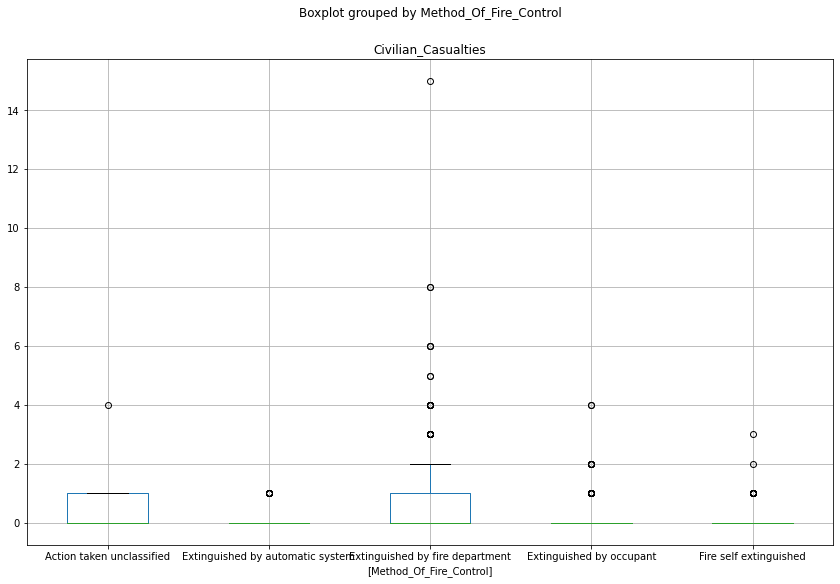

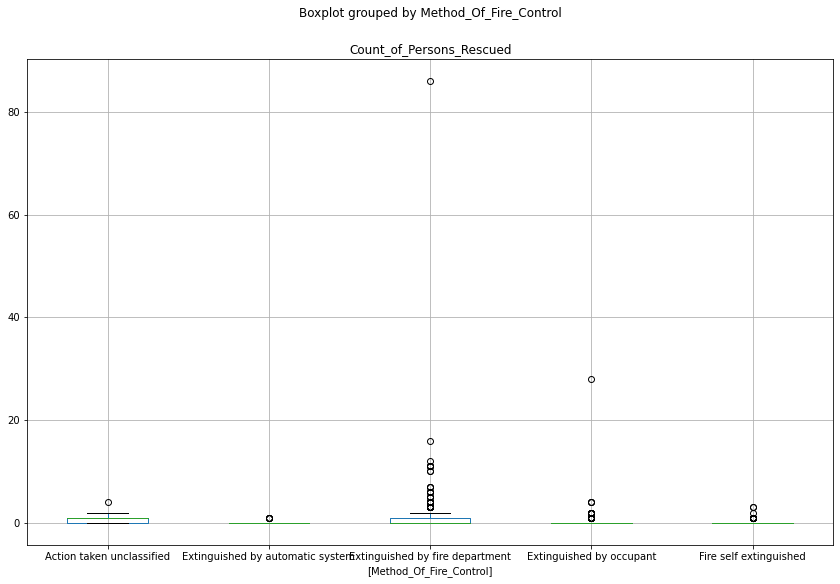

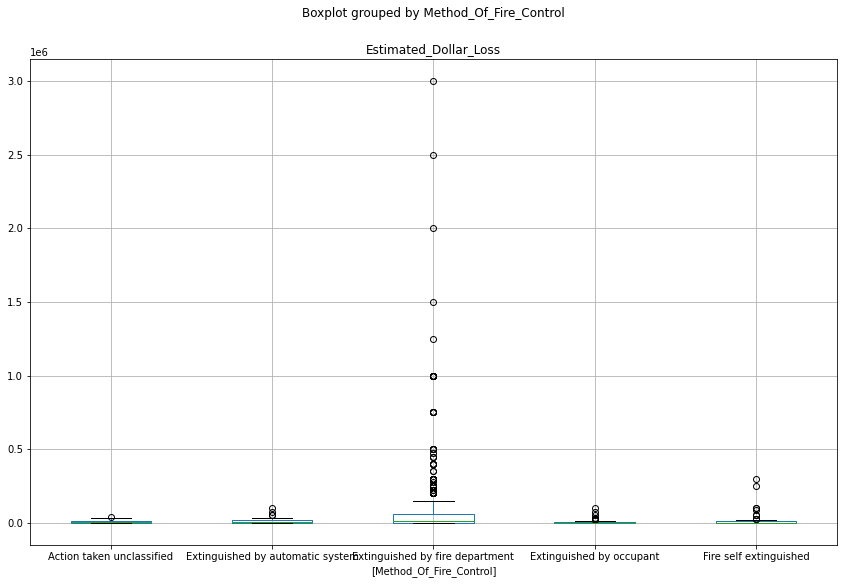

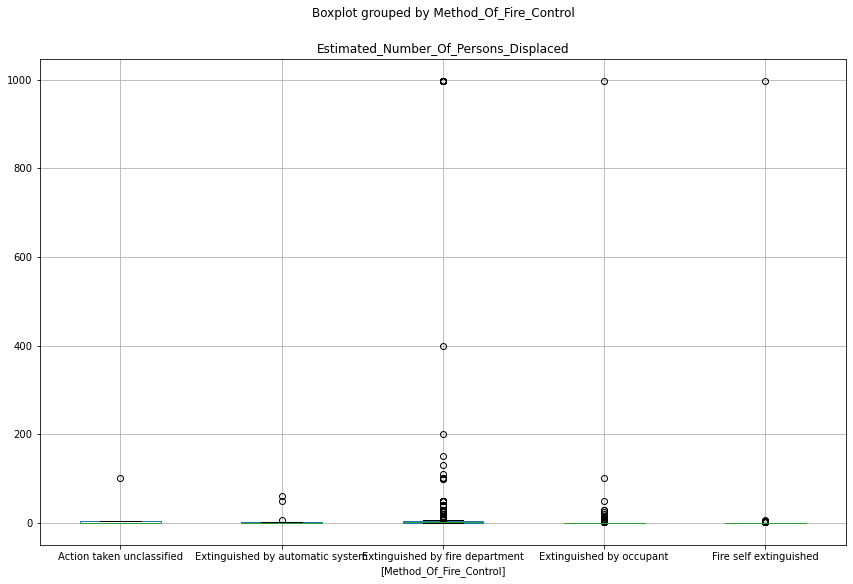

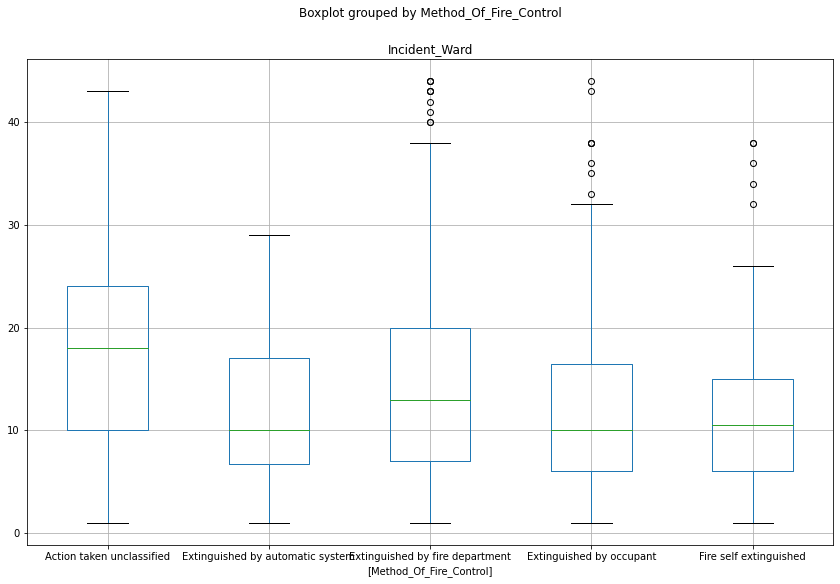

In [72]:
df_plot = df_by_type["Civilian_Casualties"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Method_Of_Fire_Control", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Count_of_Persons_Rescued"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Method_Of_Fire_Control", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Estimated_Dollar_Loss"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Method_Of_Fire_Control", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Estimated_Number_Of_Persons_Displaced"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Method_Of_Fire_Control", figsize=(14,9))
#------------------------------------------------------------------------
df_plot = df_by_type["Incident_Ward"]
df_plot = pd.DataFrame(df_plot)

df_plot.boxplot(by="Method_Of_Fire_Control", figsize=(14,9))

# -------------------------------------------------------------------------------------------------------------

In [76]:
import datetime

In [91]:
type(archivo['TFS_Alarm_Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
def plot_EDL_por_columna_y_fecha(dataframe, column: str, start_date: str, end_date:str, agg_fn = pd.DataFrame.mean,):
    
    #aquí establezco un rango de fechas
    start_date=datetime.datetime.strptime(start_date,'%Y-%m-%dT%H:%M:%S')
    end_date=datetime.datetime.strptime(end_date,'%Y-%m-%dT%H:%M:%S')
    
    #aqui filtro dentro de ese rango para TFS_Alarm_Time
    df = dataframe[(dataframe['TFS_Alarm_Time'] > start_date) & (dataframe['TFS_Alarm_Time'] <= end_date)]
    
    df_by_EDL = df.groupby([column,"TFS_Alarm_Time"])[["Estimated_Dollar_Loss"]].aggregate(agg_fn)
    df_by_EDL.reset_index(inplace=True)
    df_by_EDL.set_index("TFS_Alarm_Time", inplace=True)

    df_by_EDL.plot(y = 'Estimated_Dollar_Loss', legend=True, figsize=(24,8),title=column)
    

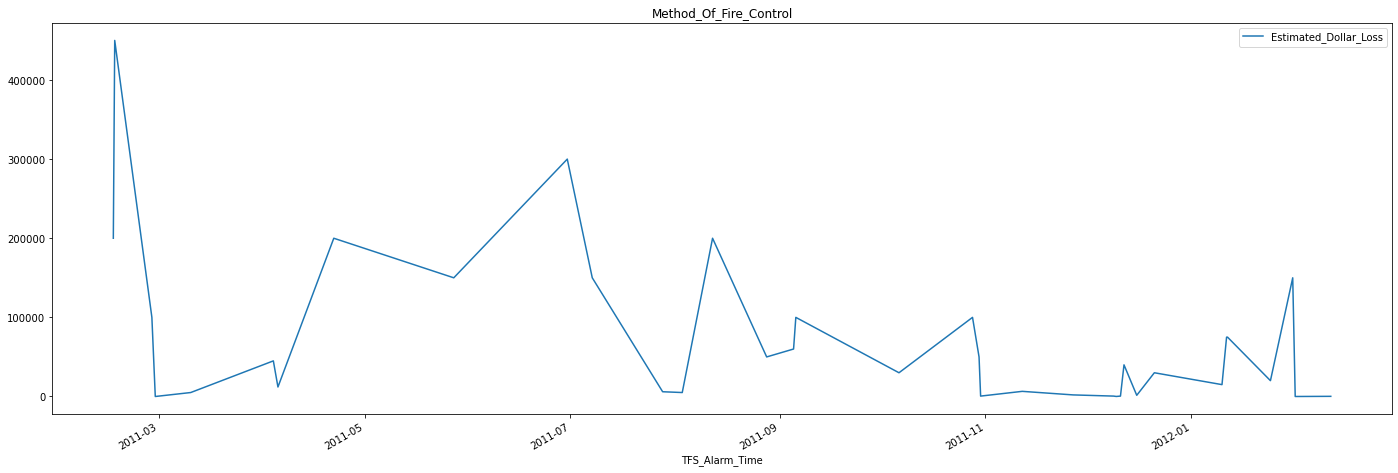

In [92]:
plot_EDL_por_columna_y_fecha(archivo, "Method_Of_Fire_Control", "2011-02-12T16:13:28","2012-02-12T16:13:28")

In [81]:
def plot_por_tipo_y_fecha(dataframe, column: str, start_date: str, end_date:str, agg_fn = pd.DataFrame.mean,):
    
    #aquí filtro las reviews por fecha
    start_date=datetime.datetime.strptime(start_date,'%Y-%m-%dT%H:%M:%S')
    end_date=datetime.datetime.strptime(end_date,'%Y-%m-%dT%H:%M:%S')
    
    df = dataframe[(dataframe['TFS_Alarm_Time'] > start_date) & (dataframe['TFS_Alarm_Time'] <= end_date)]
    
    df_by_review=df[[column,"TFS_Alarm_Time","Estimated_Dollar_Loss"]]

    df_by_review.plot(y = 'Estimated_Dollar_Loss',x="TFS_Alarm_Time", legend=True, figsize=(24,8),title=column)
    

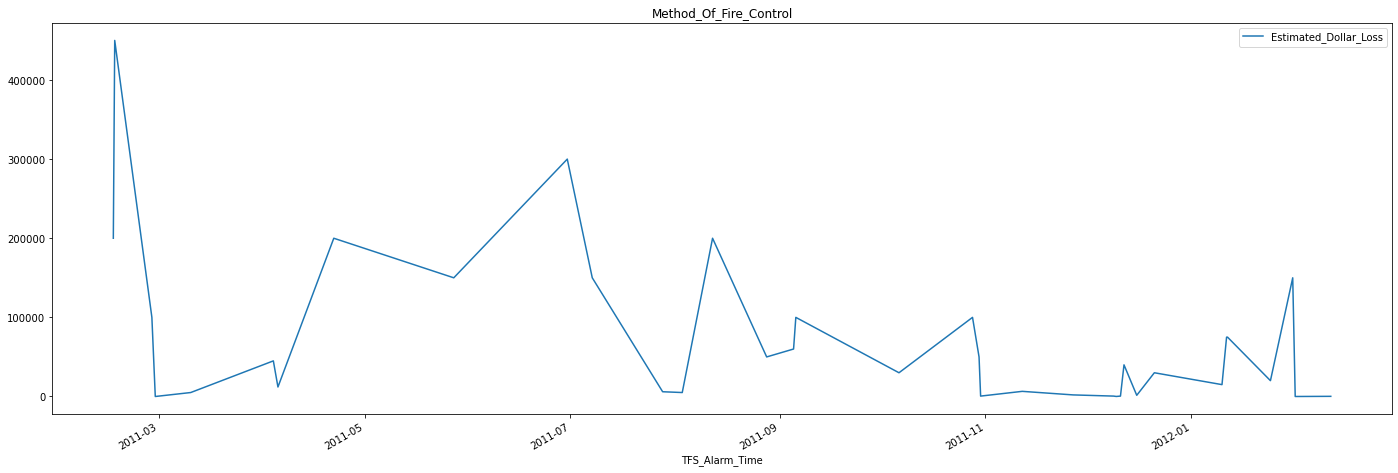

In [93]:
plot_por_tipo_y_fecha(archivo, "Method_Of_Fire_Control", "2011-02-12T16:13:28","2012-02-12T16:13:28")

C:\Users\anton\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


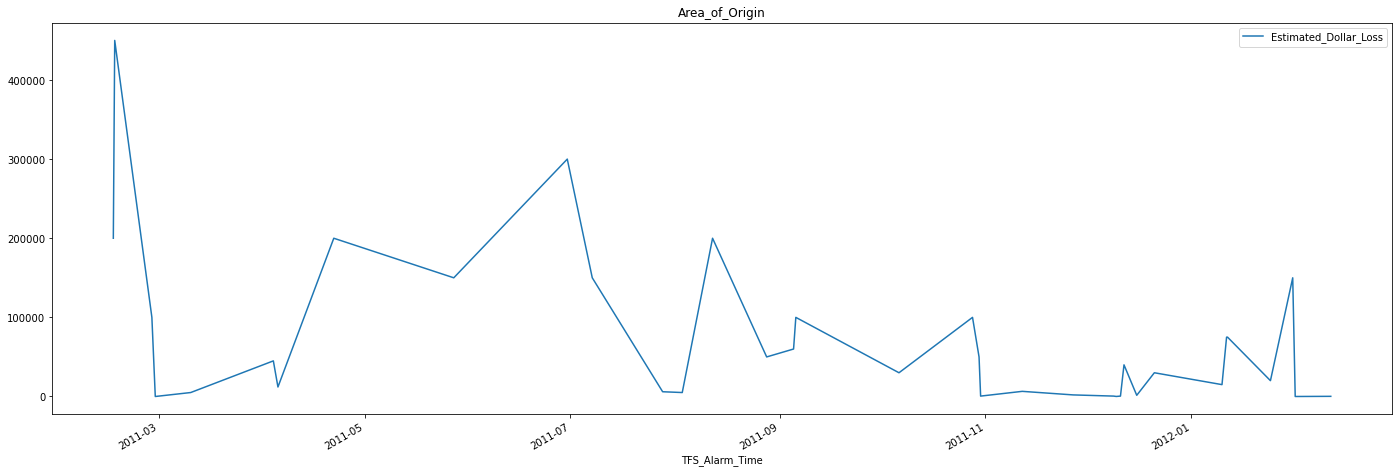

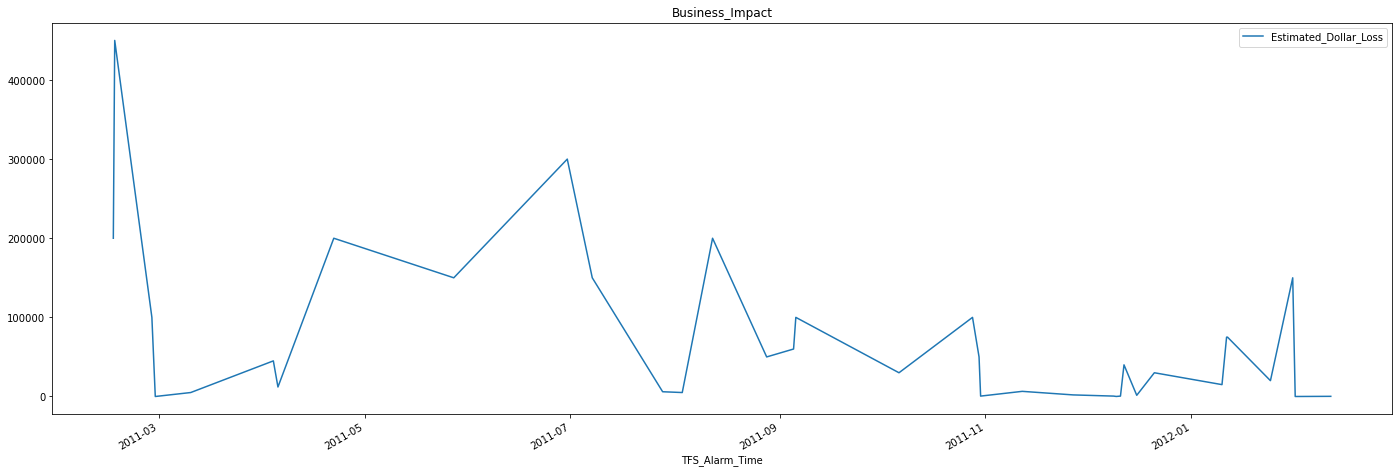

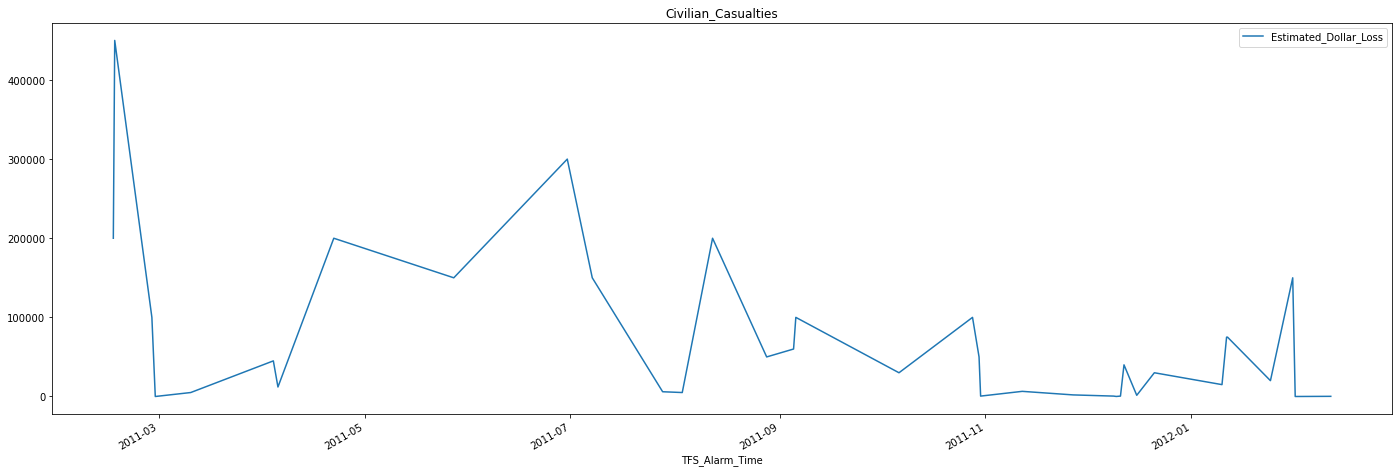

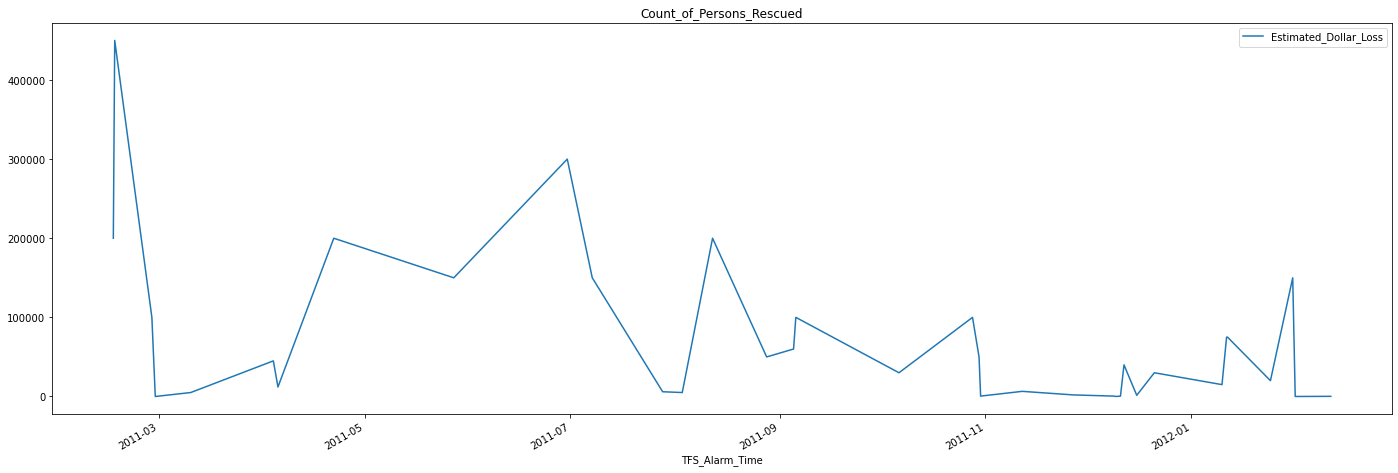

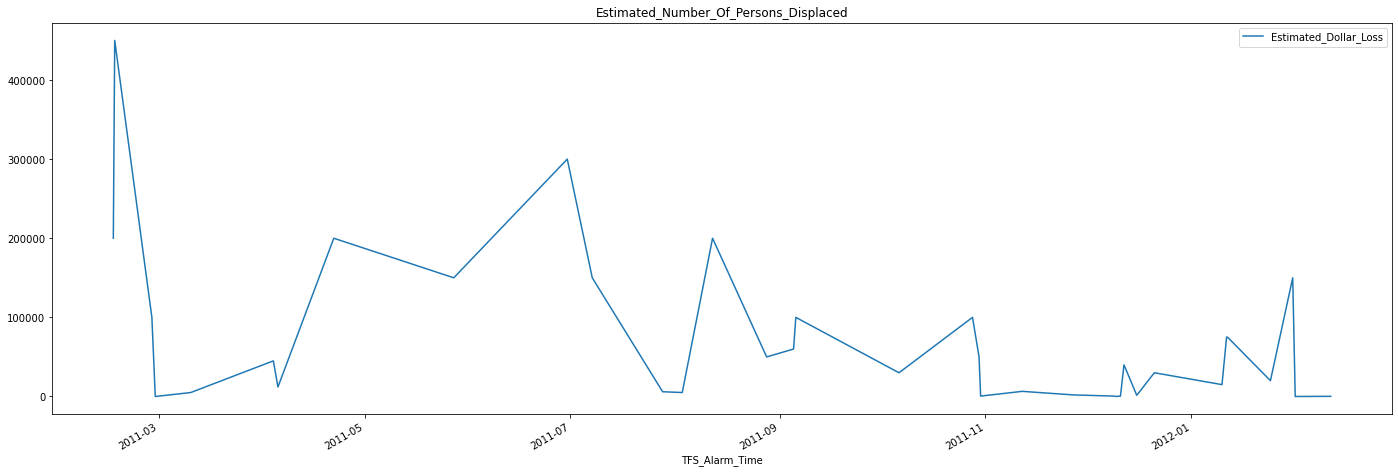

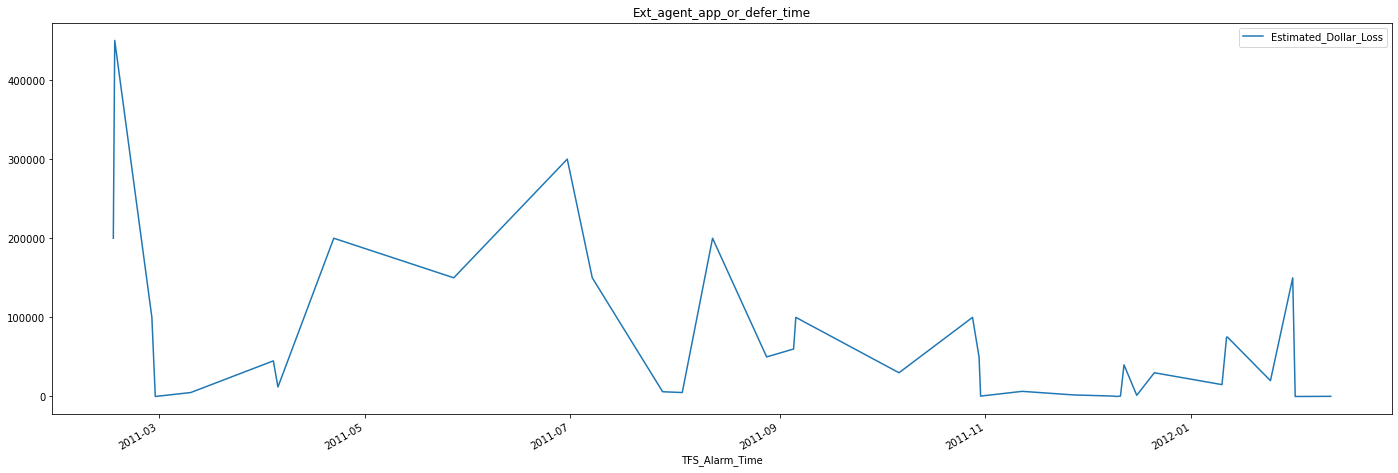

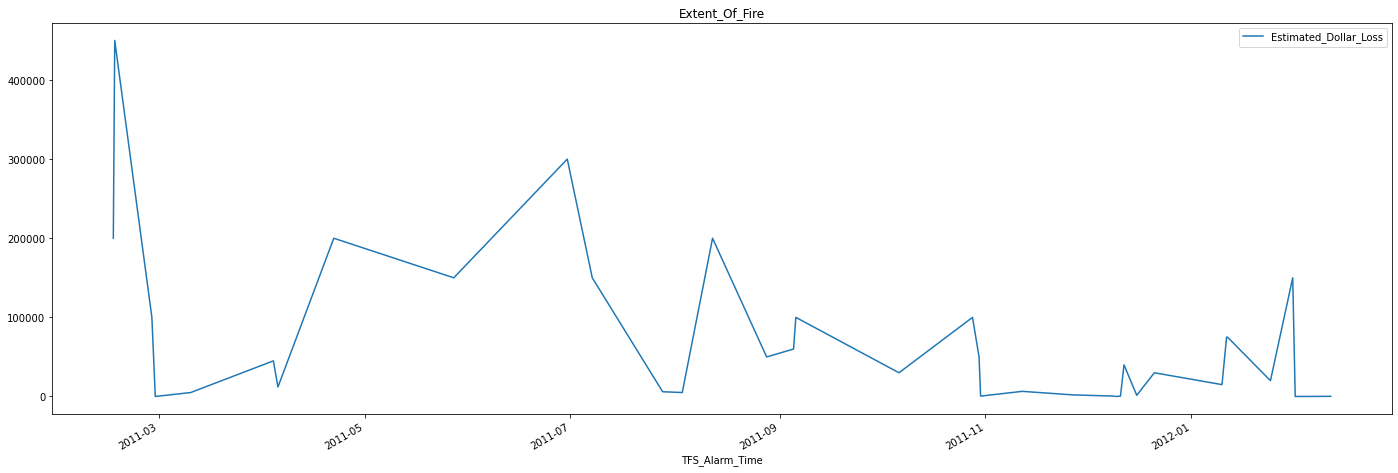

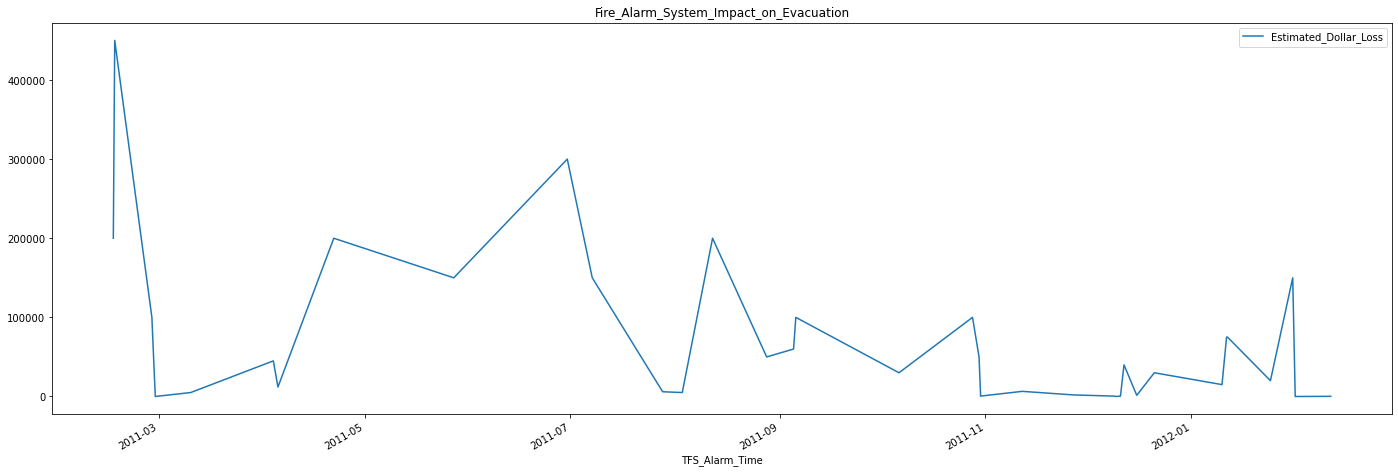

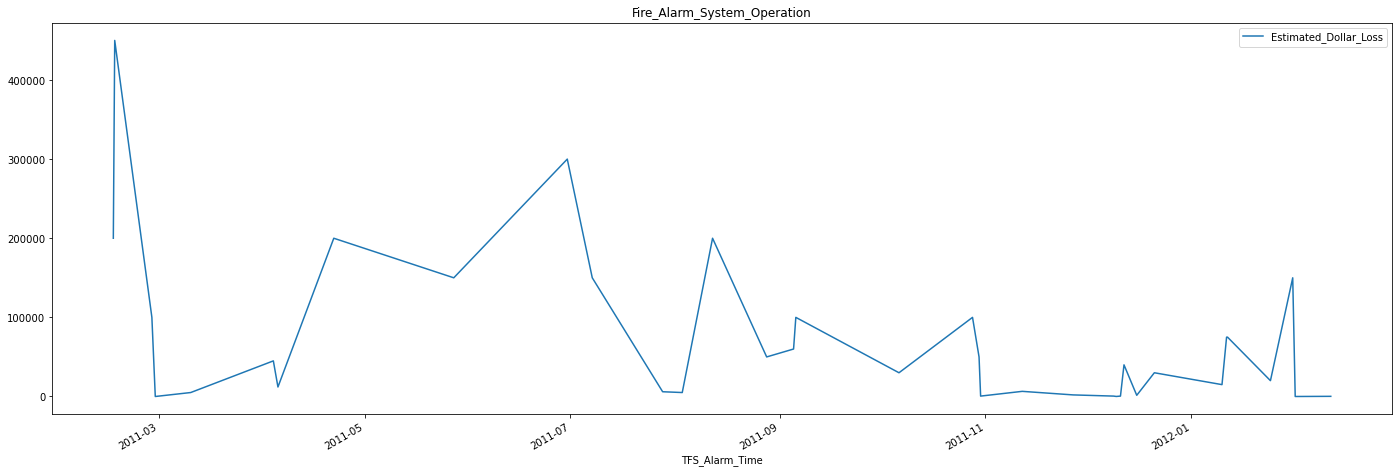

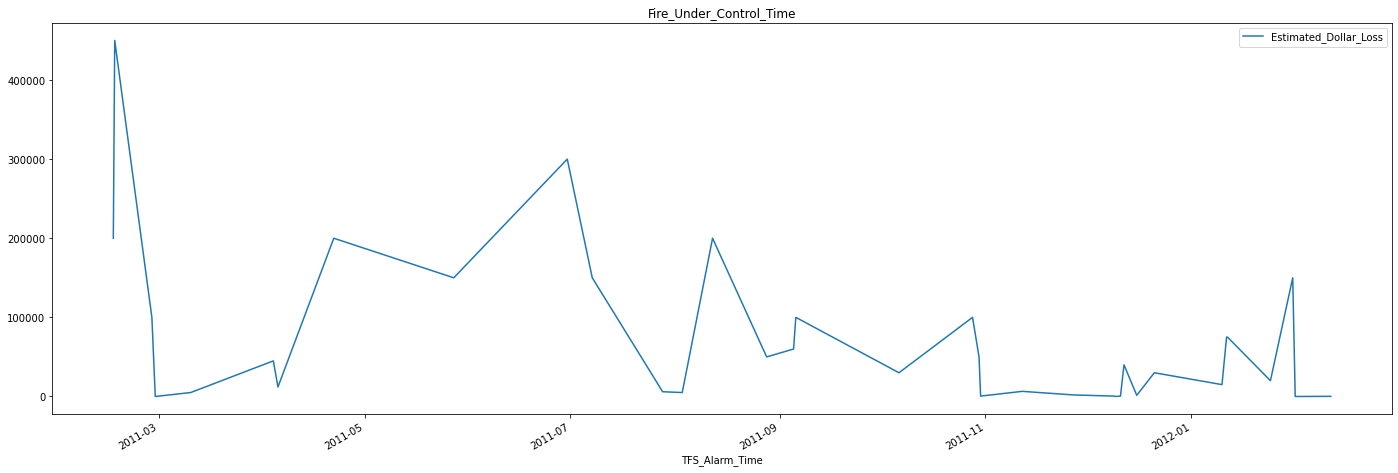

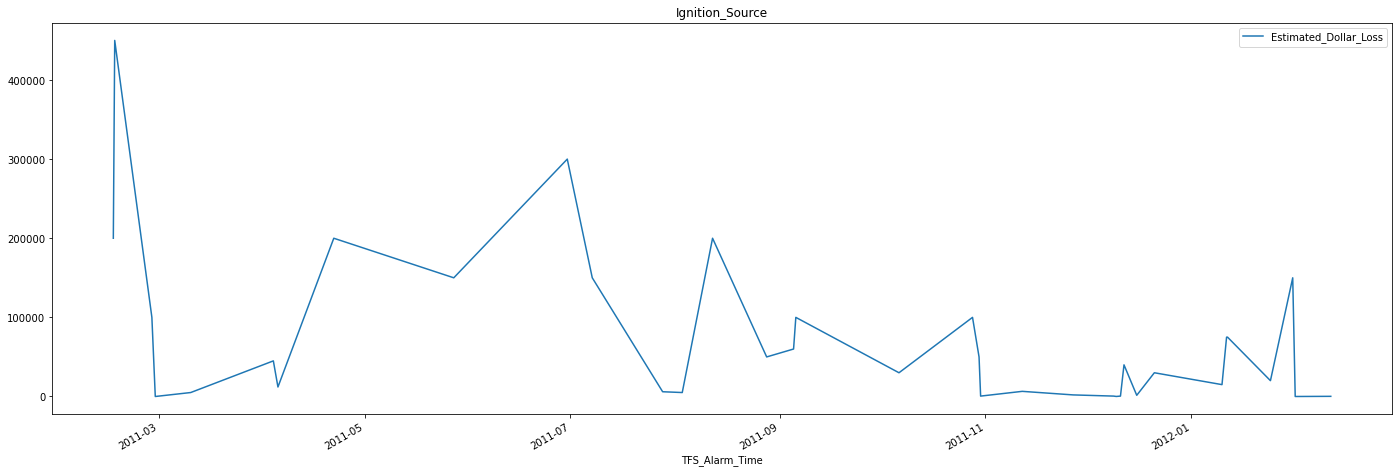

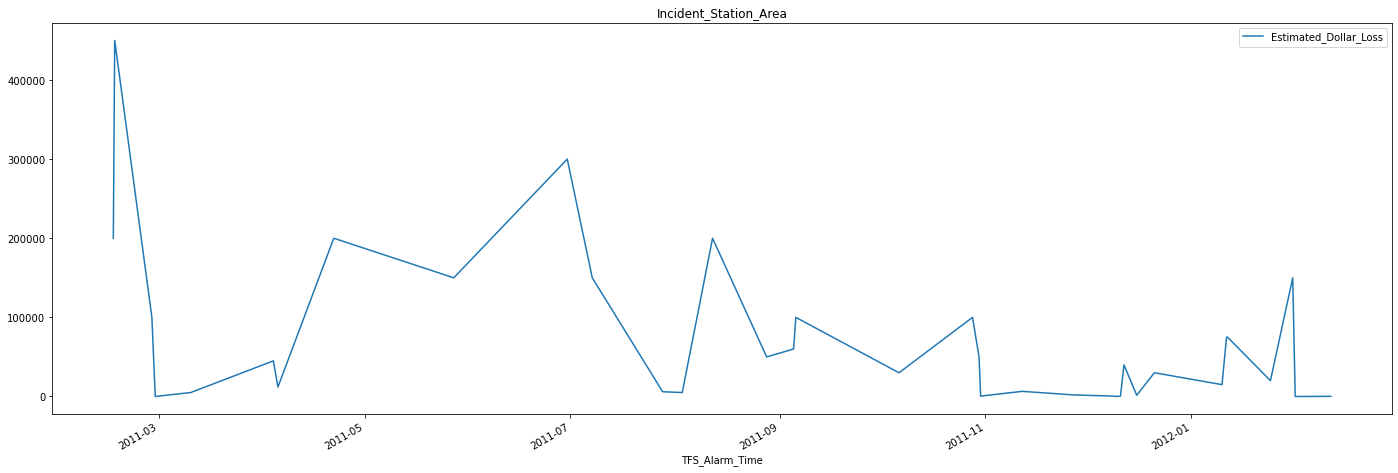

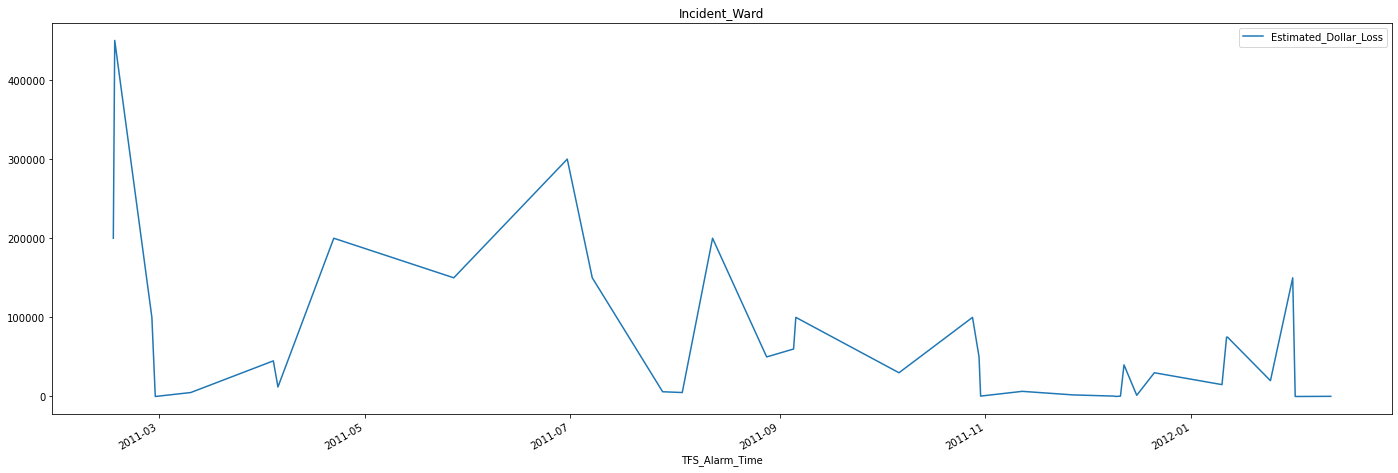

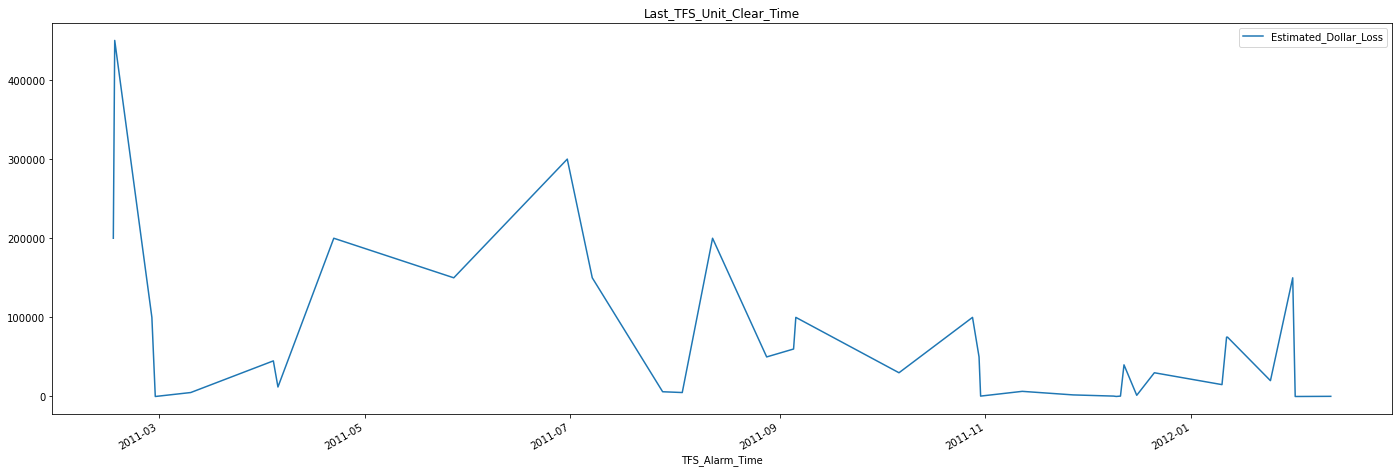

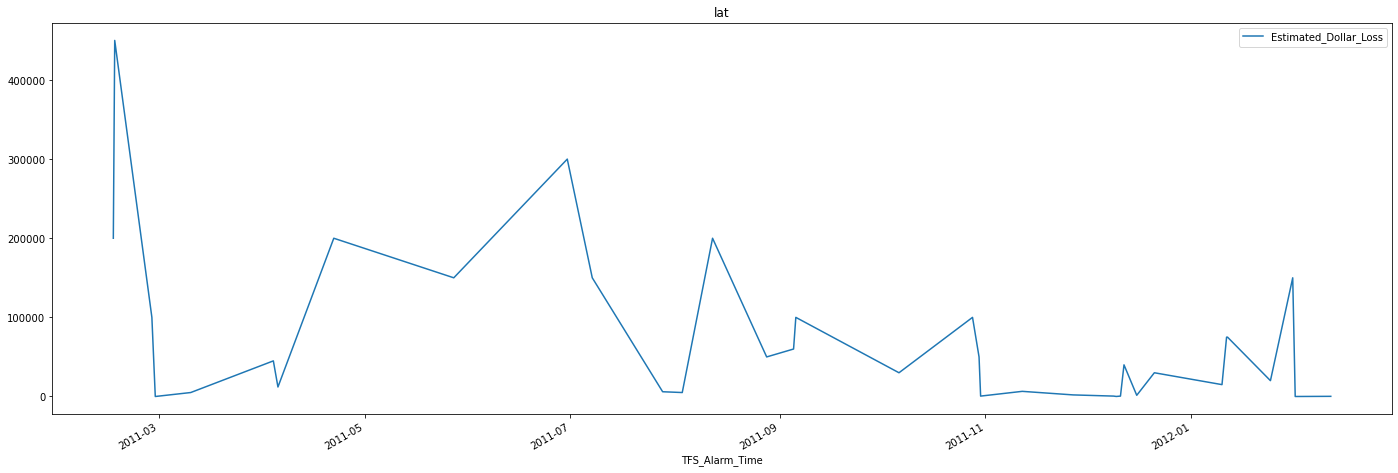

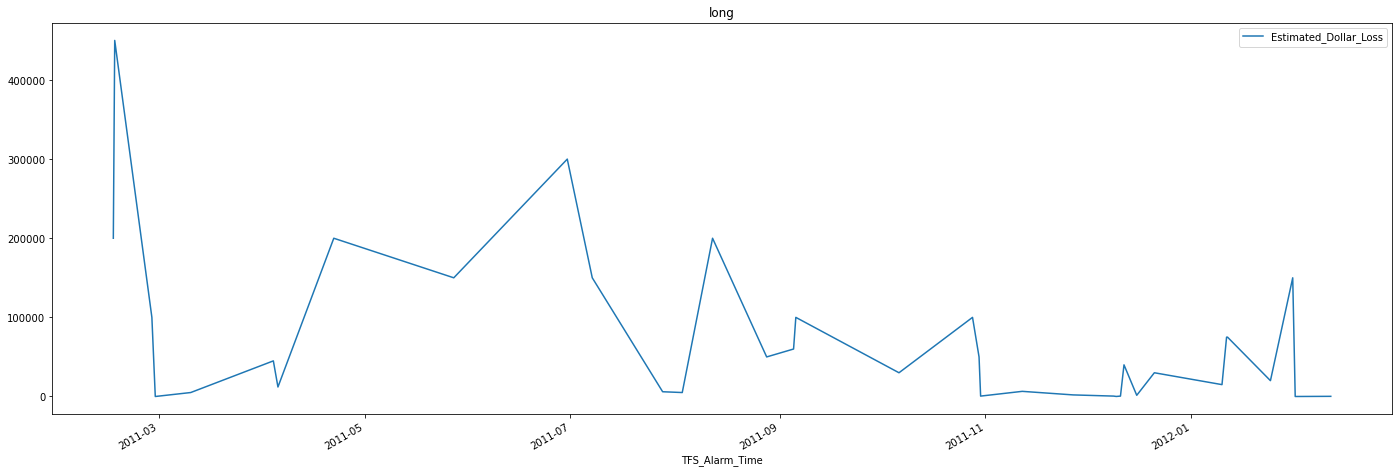

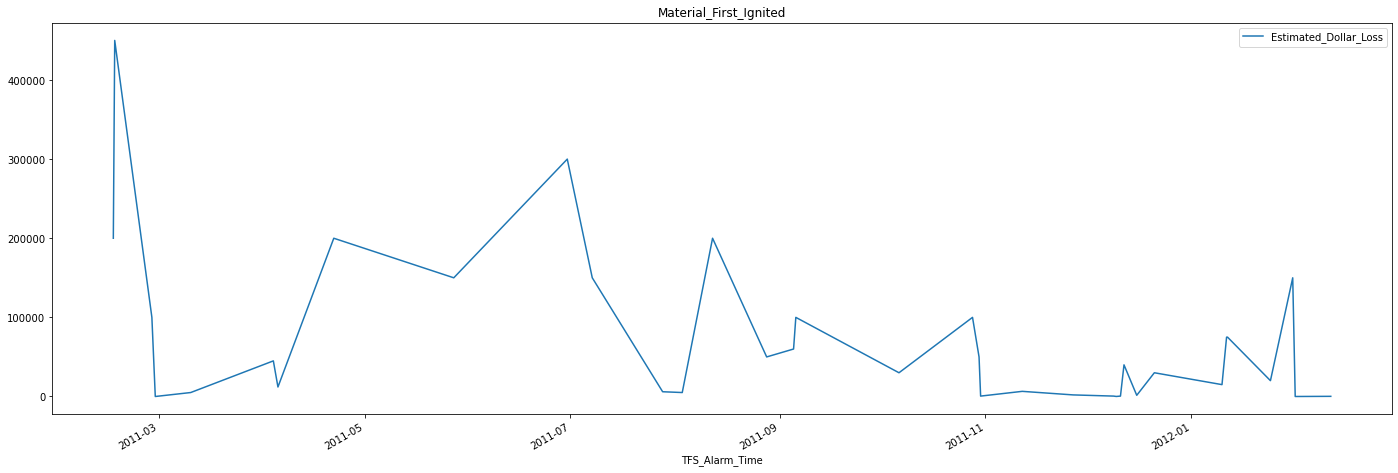

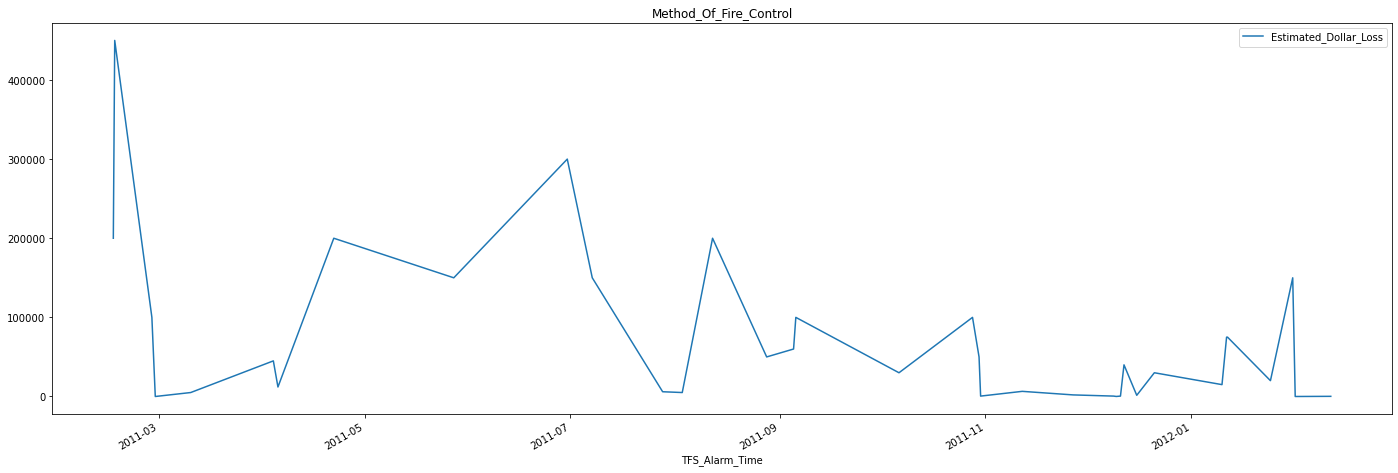

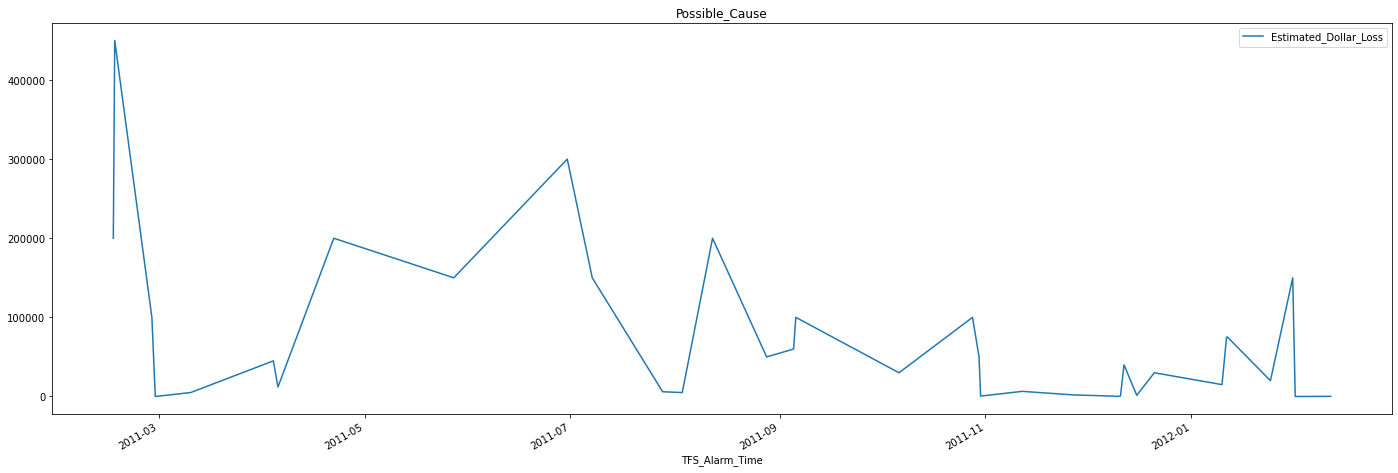

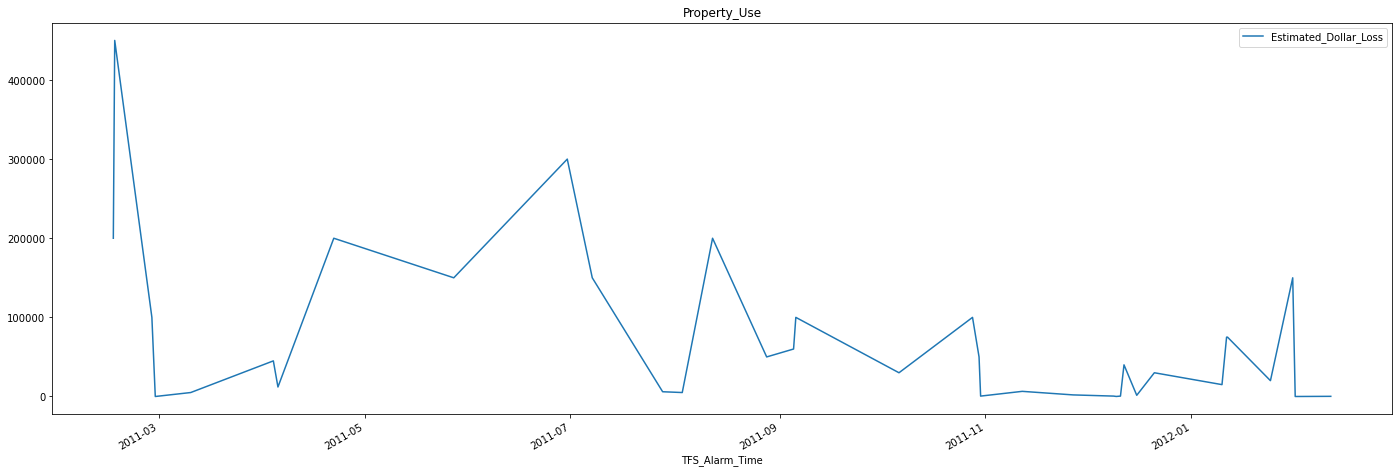

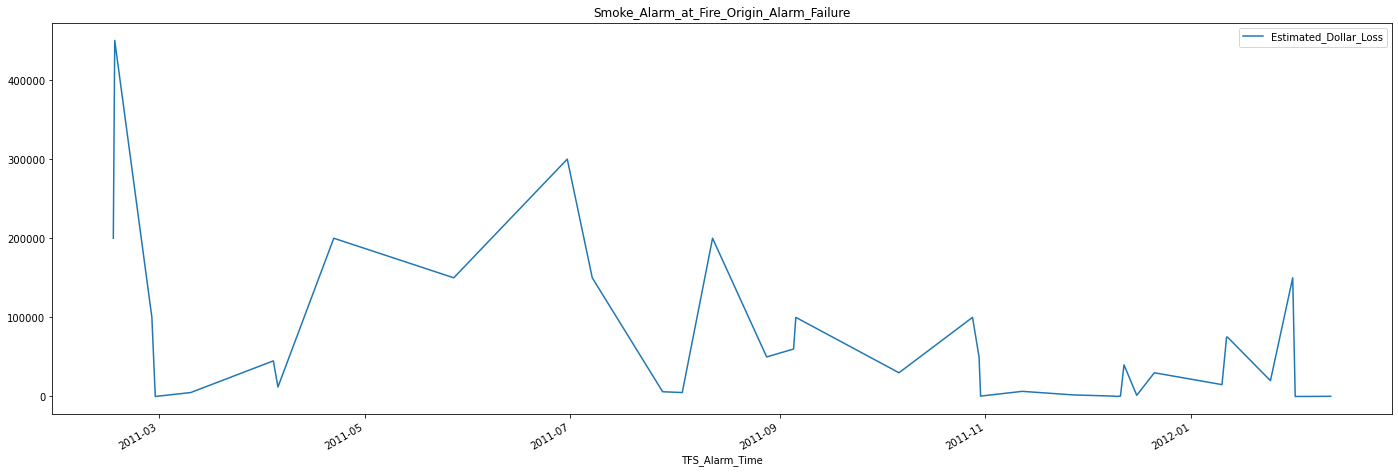

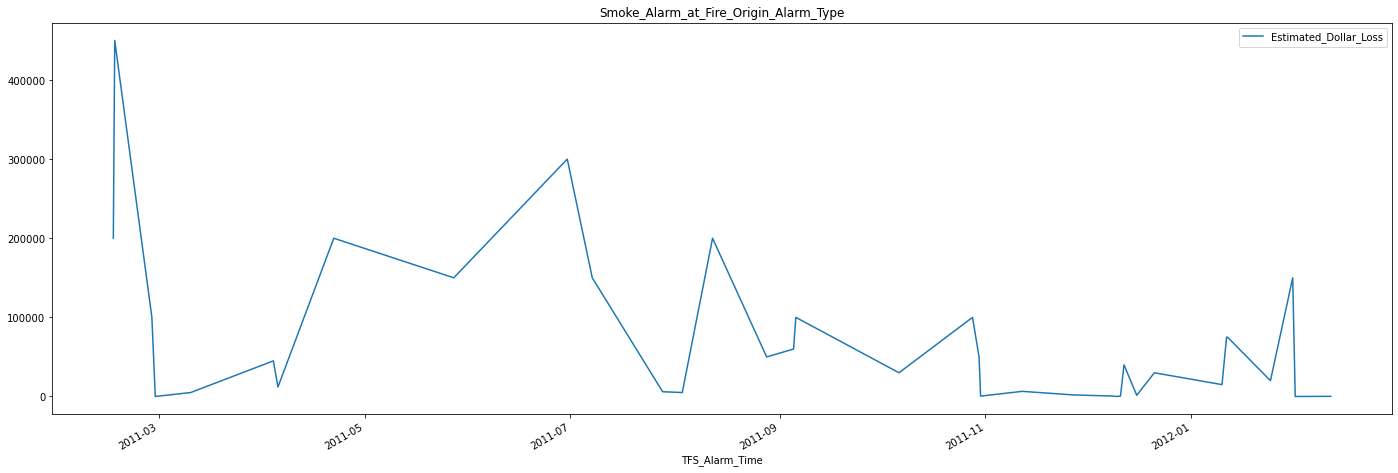

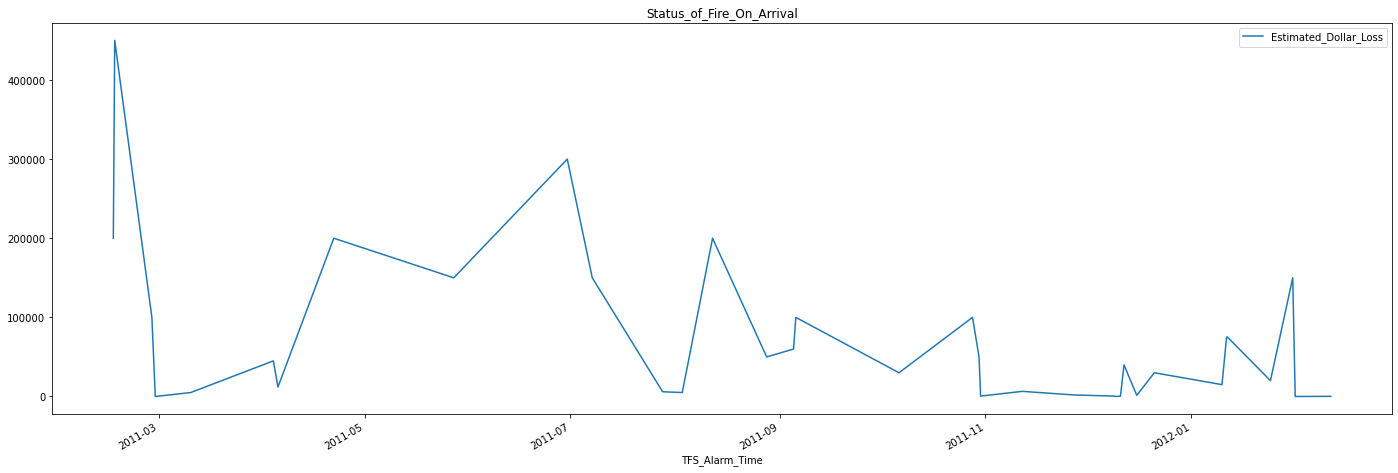

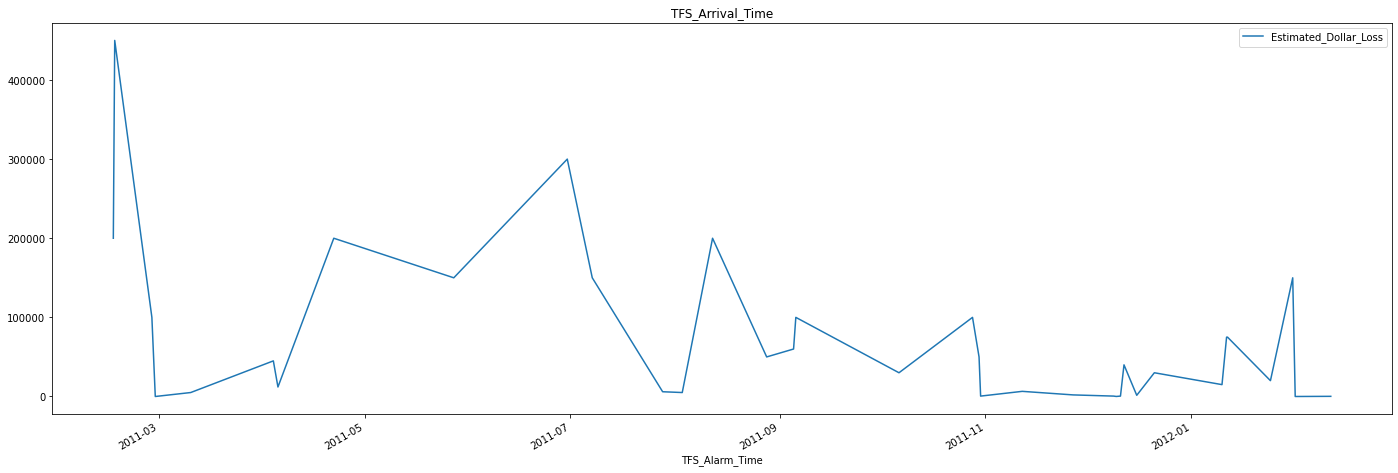

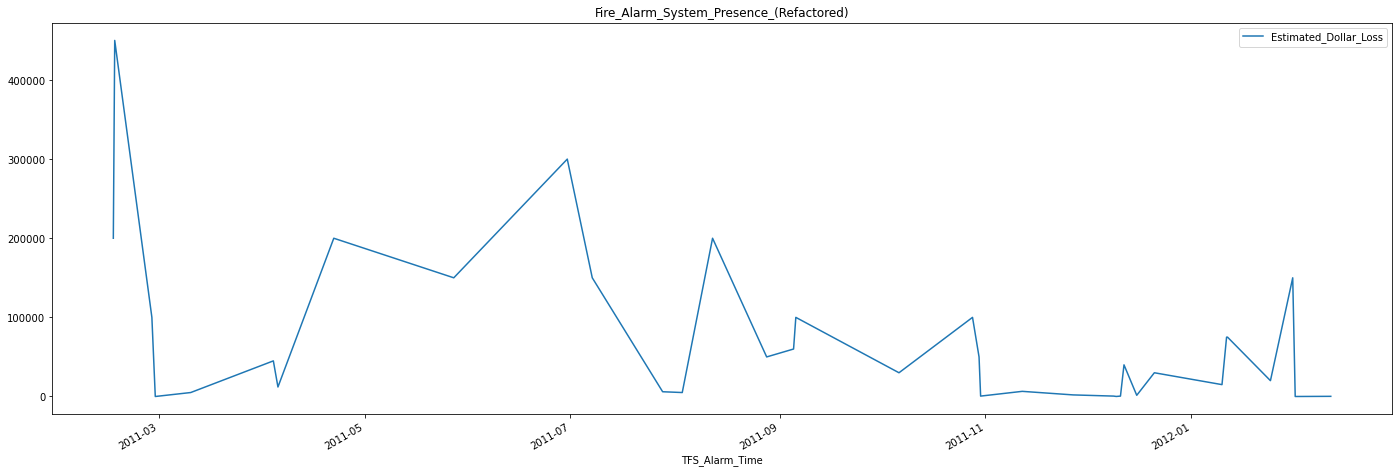

In [97]:
columnas = list(archivo.columns)
columnas.remove("TFS_Alarm_Time")
columnas.remove("Estimated_Dollar_Loss")

for columna in columnas:
    plot_por_tipo_y_fecha(archivo,columna,"2011-02-12T16:13:28","2012-02-12T16:13:28")

C:\Users\anton\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


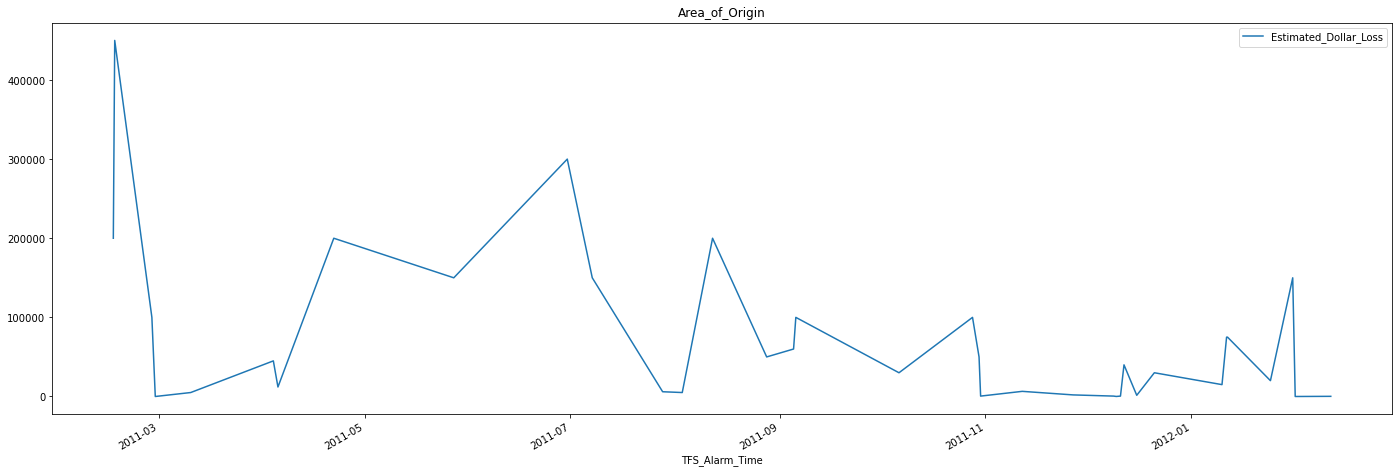

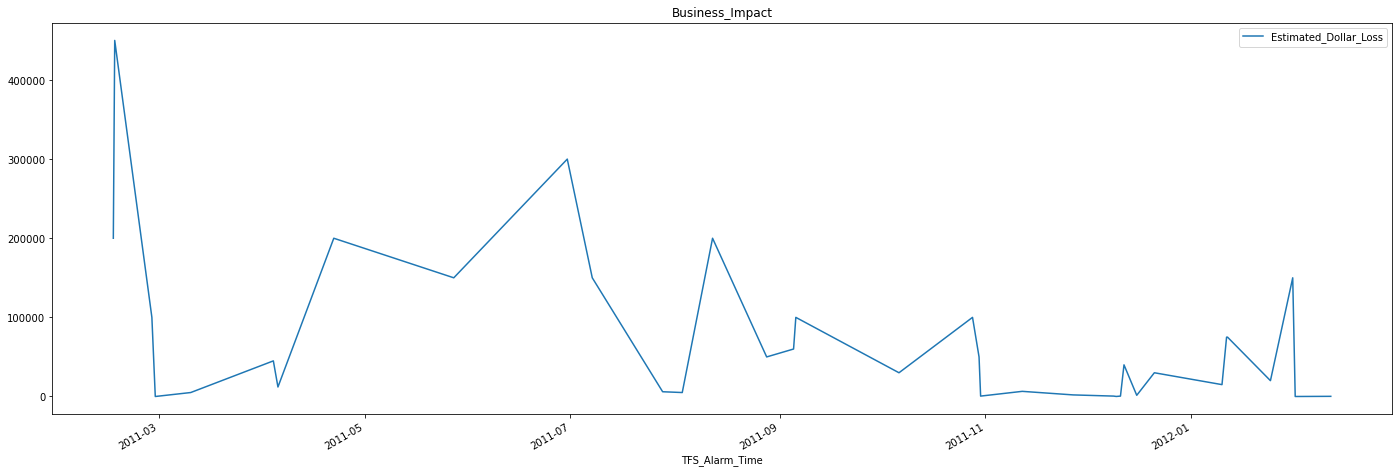

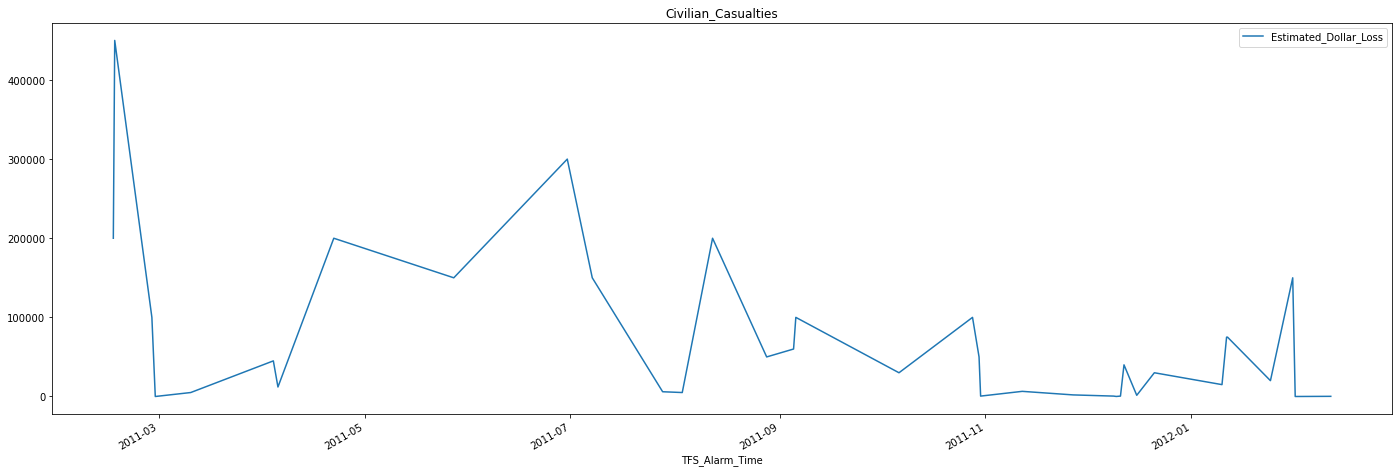

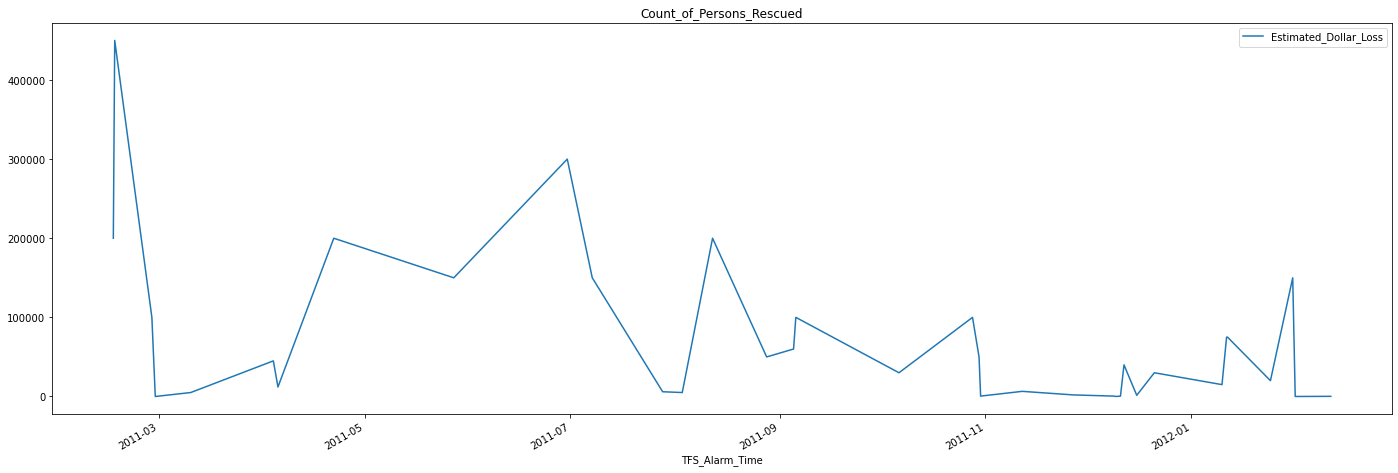

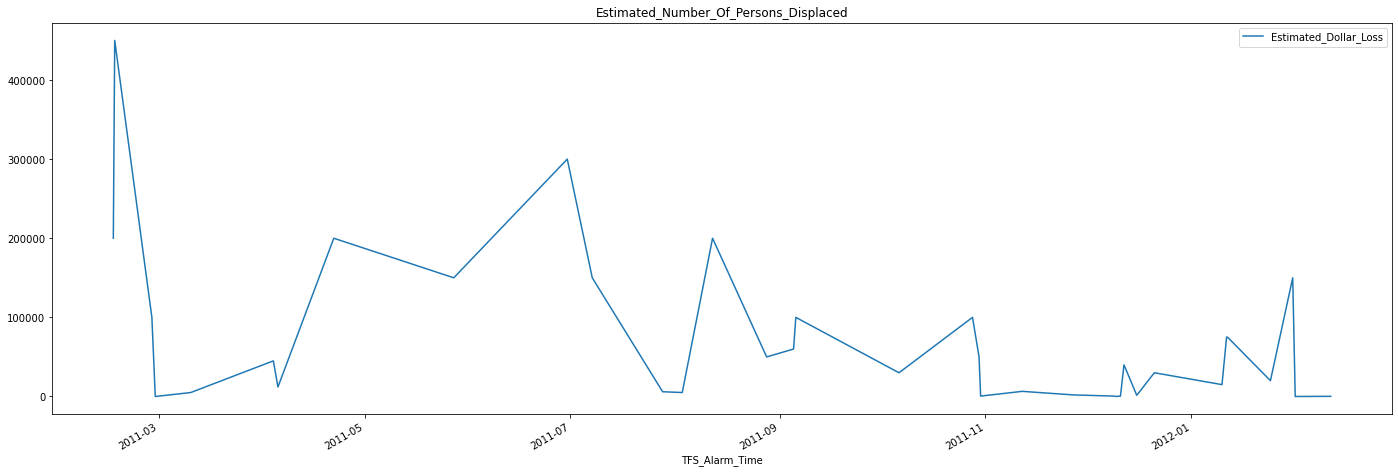

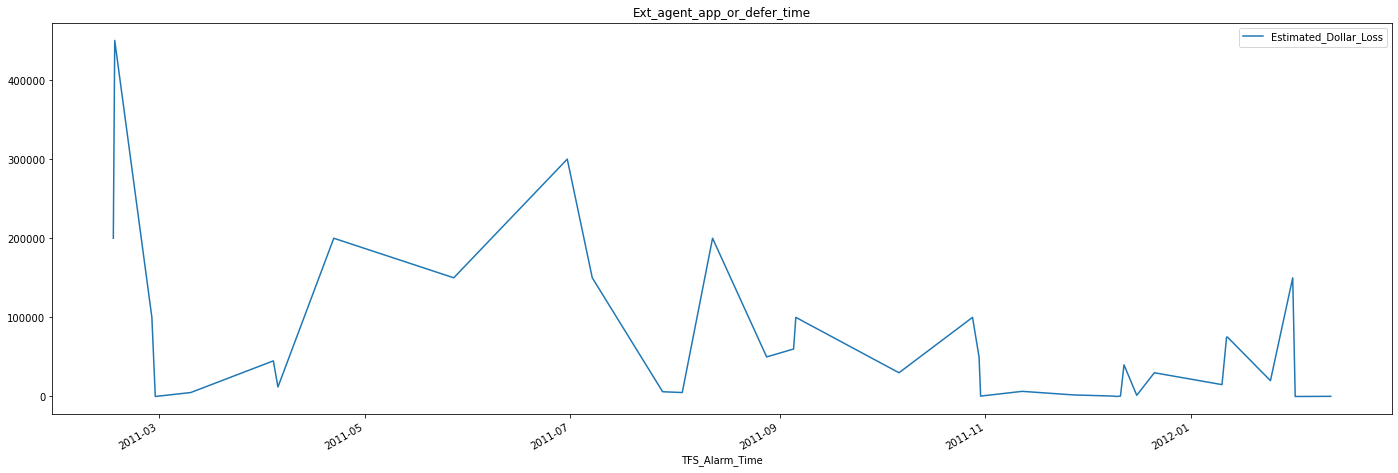

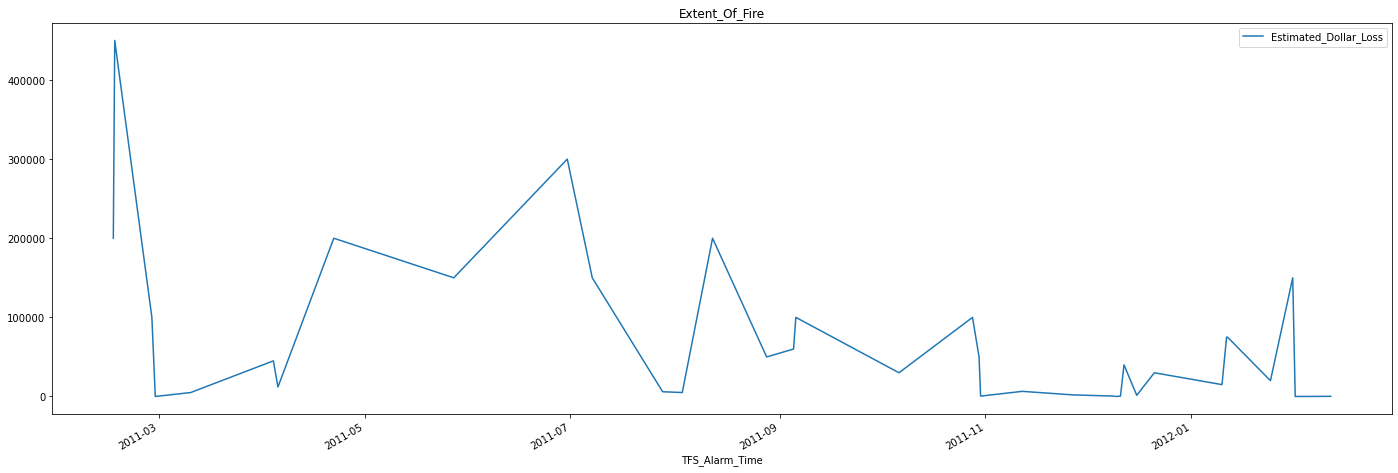

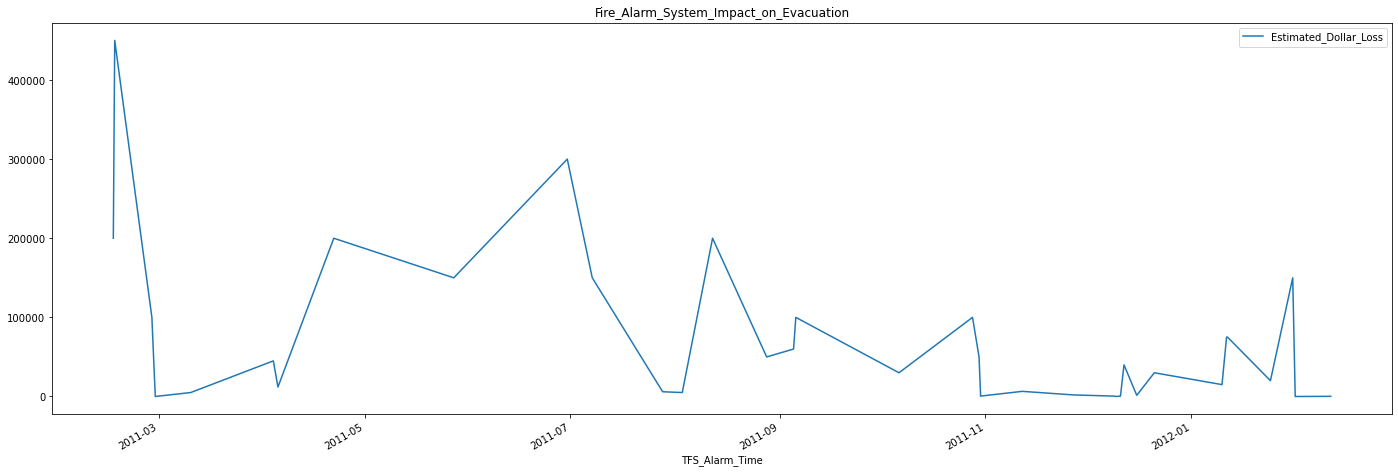

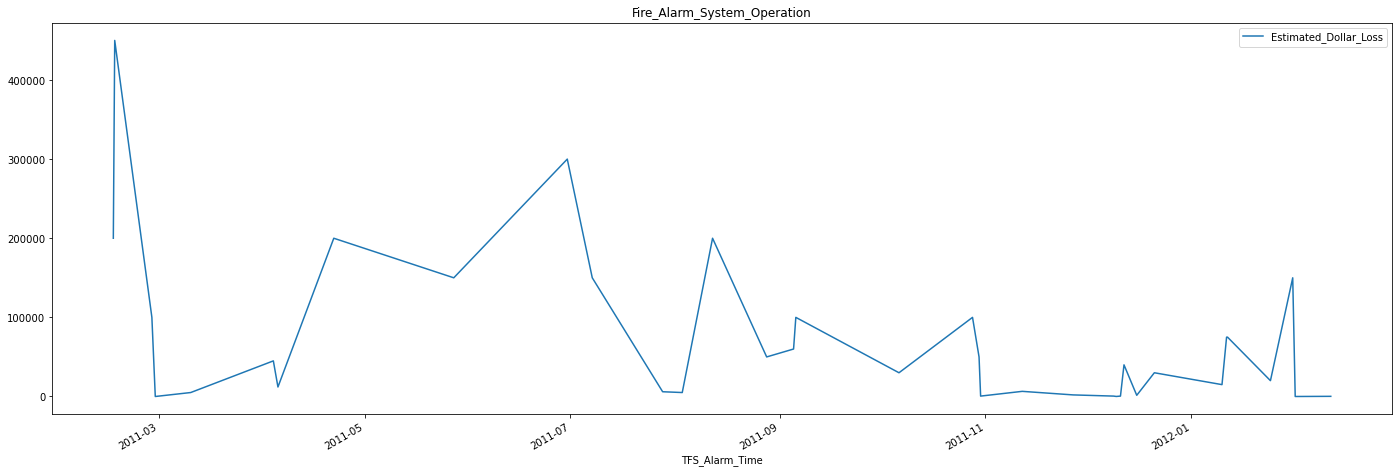

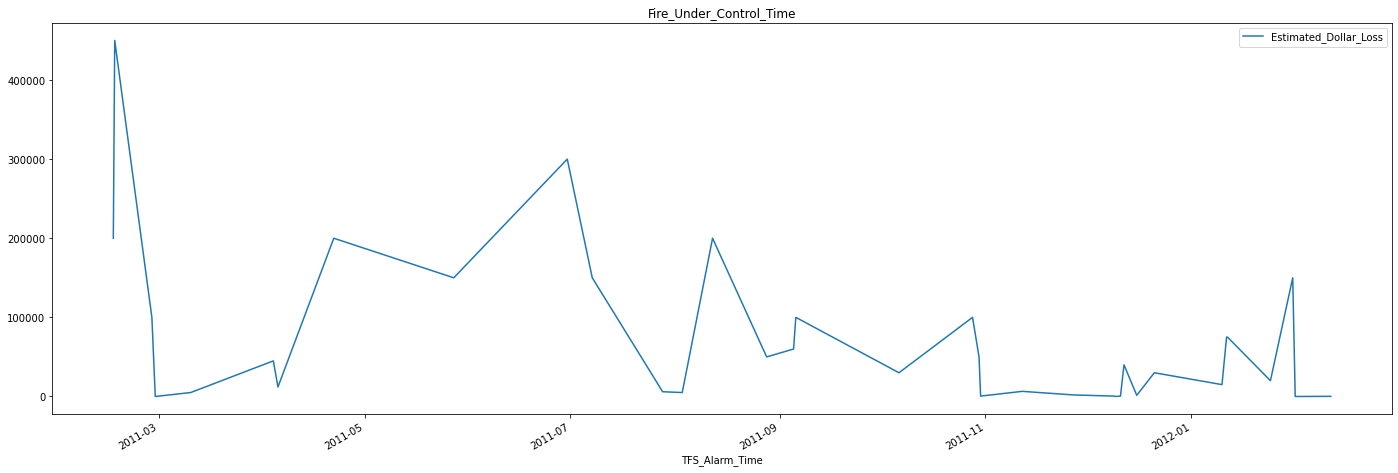

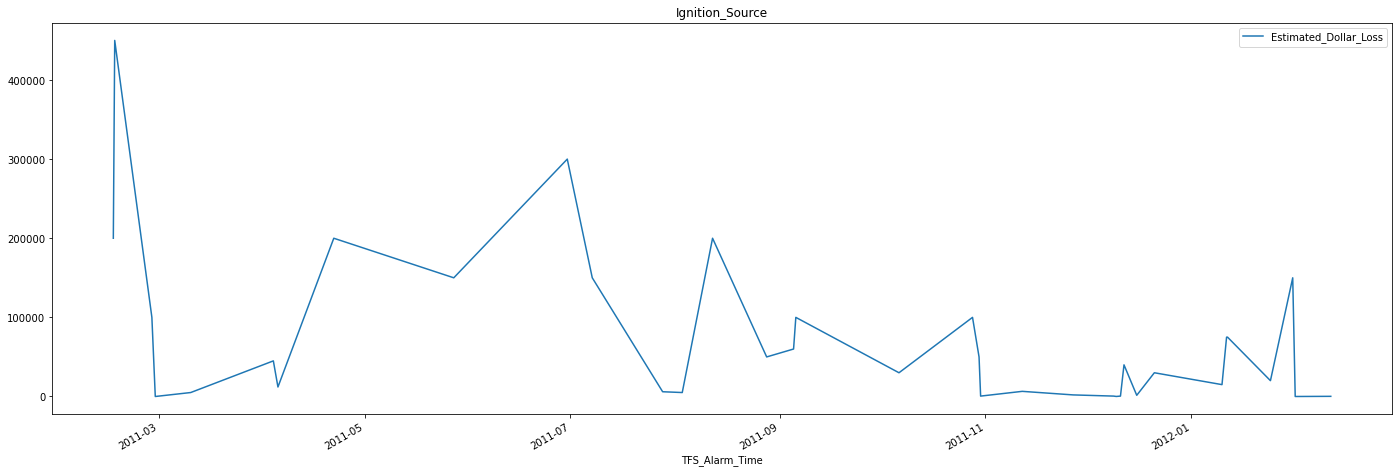

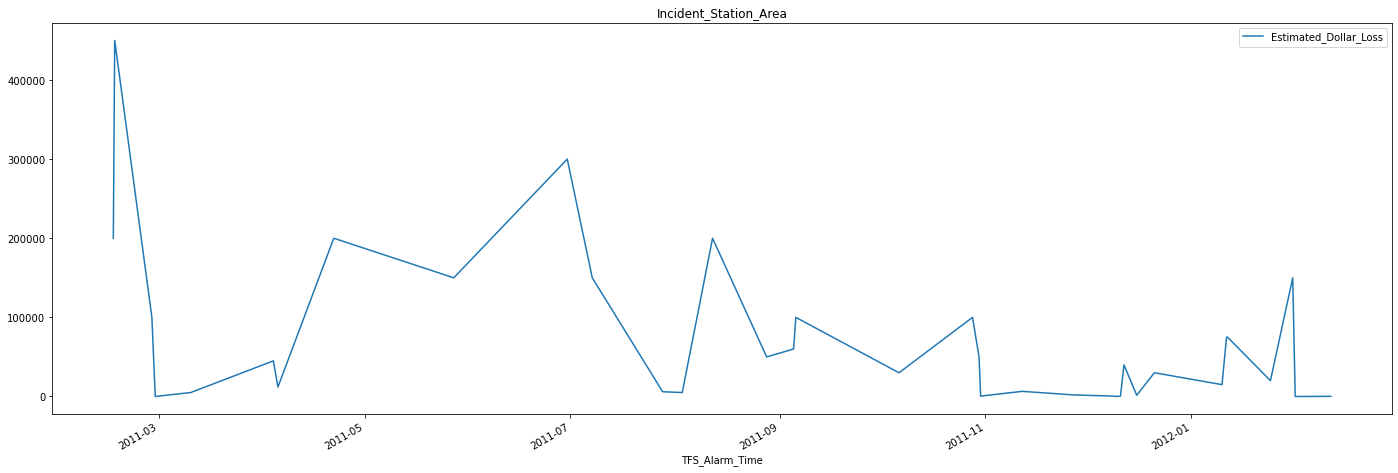

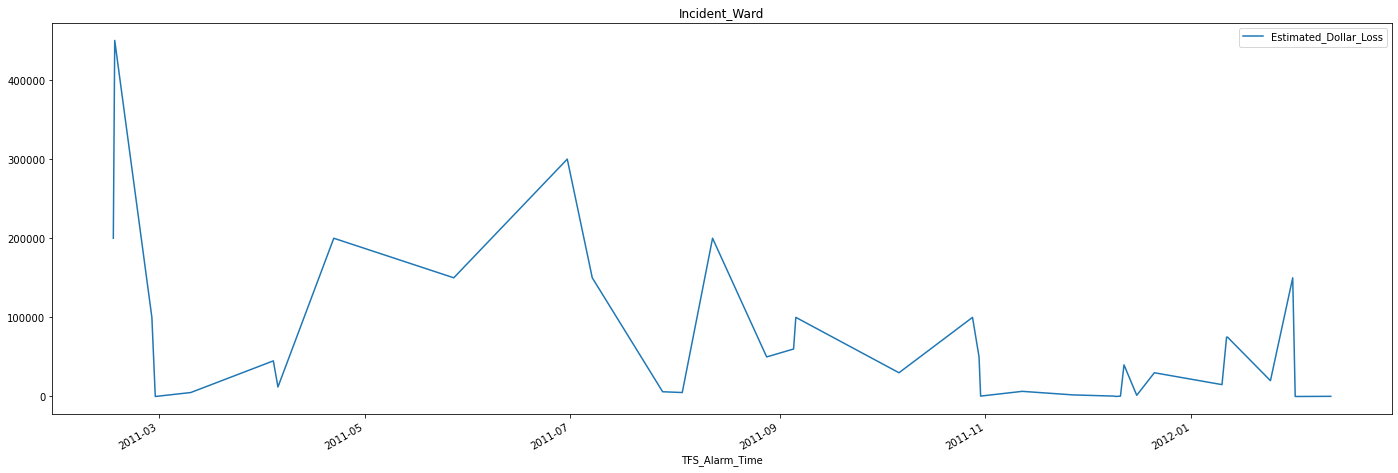

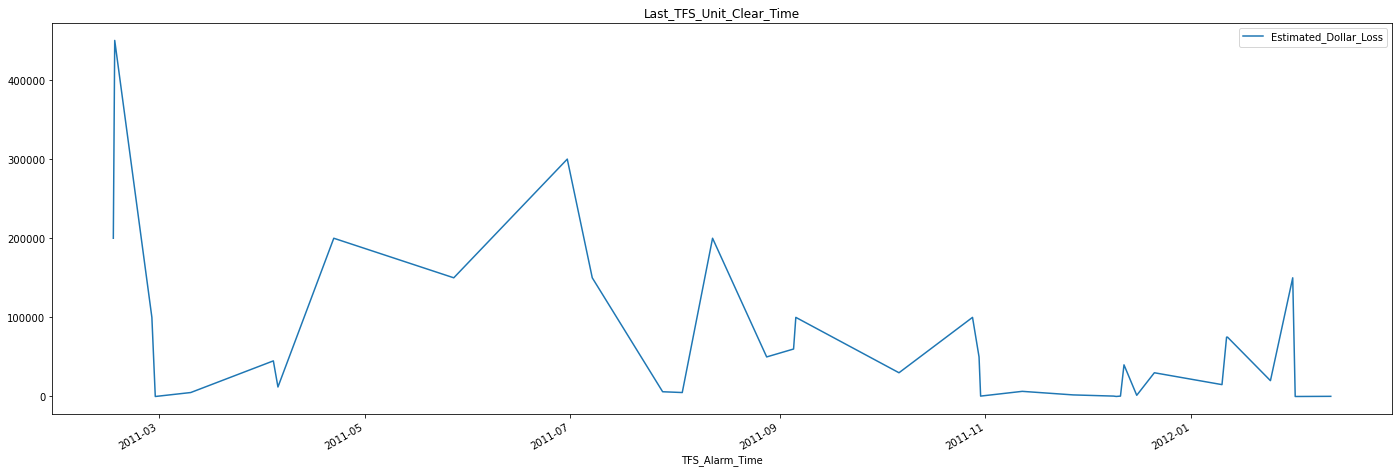

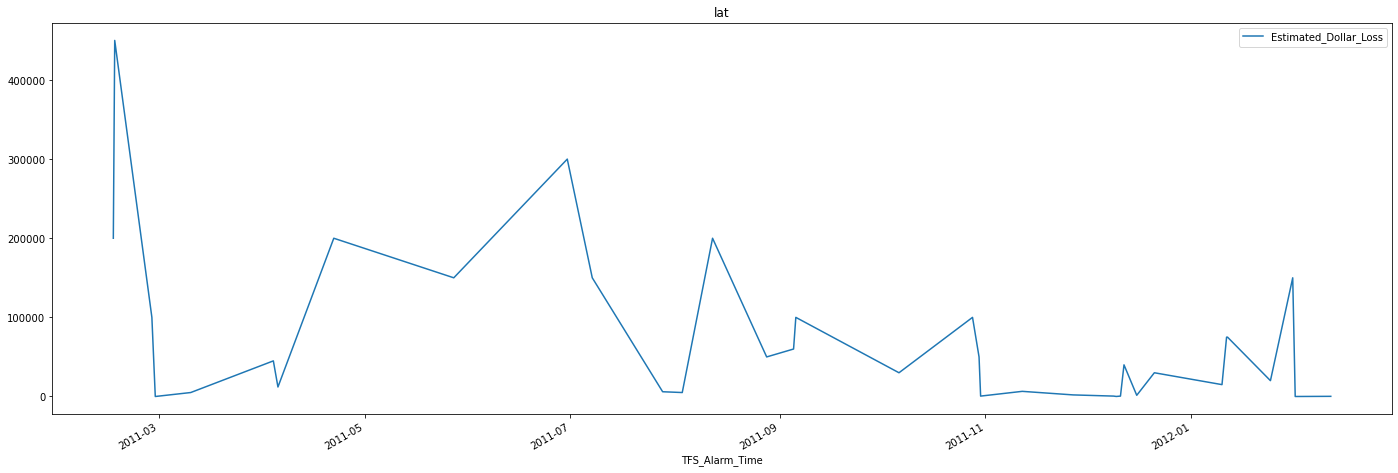

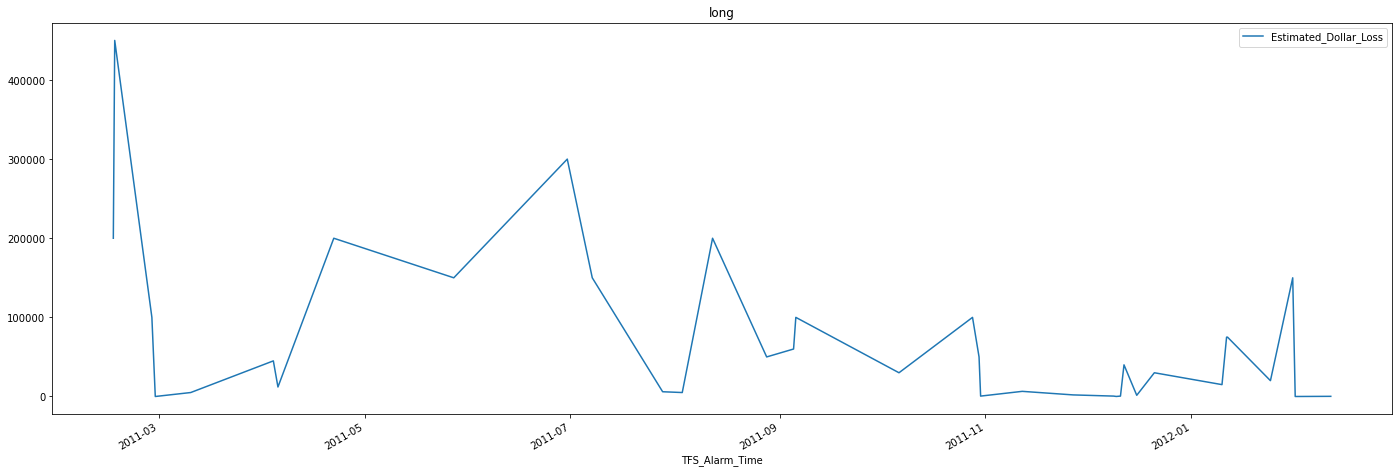

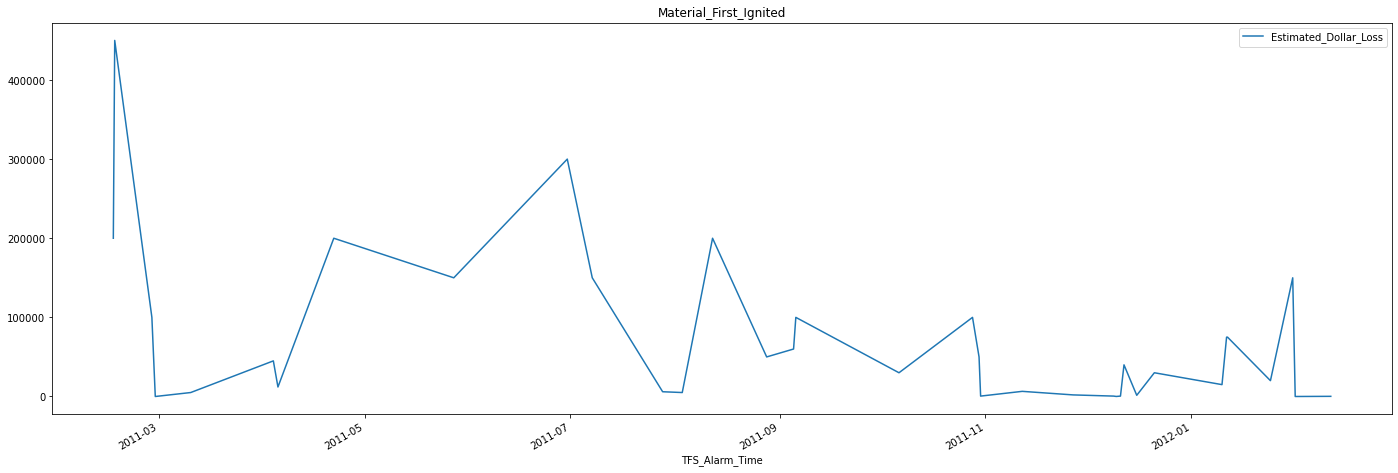

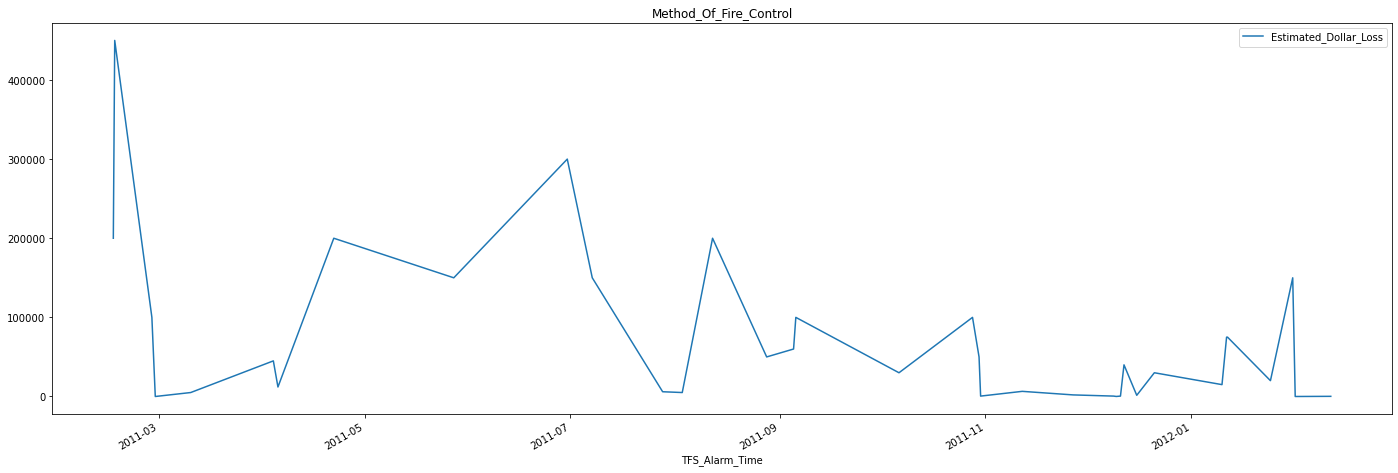

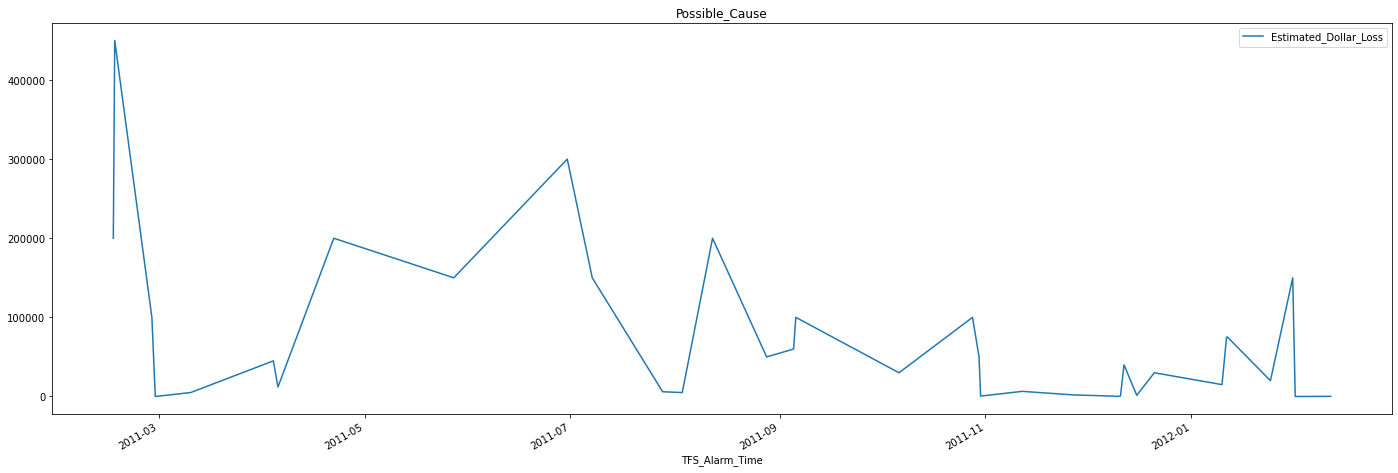

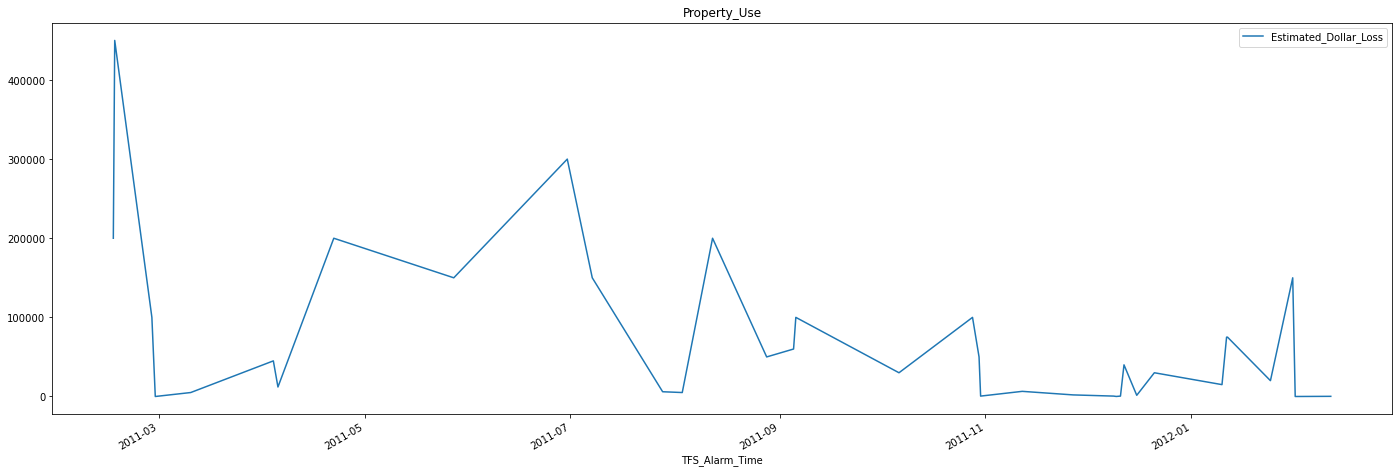

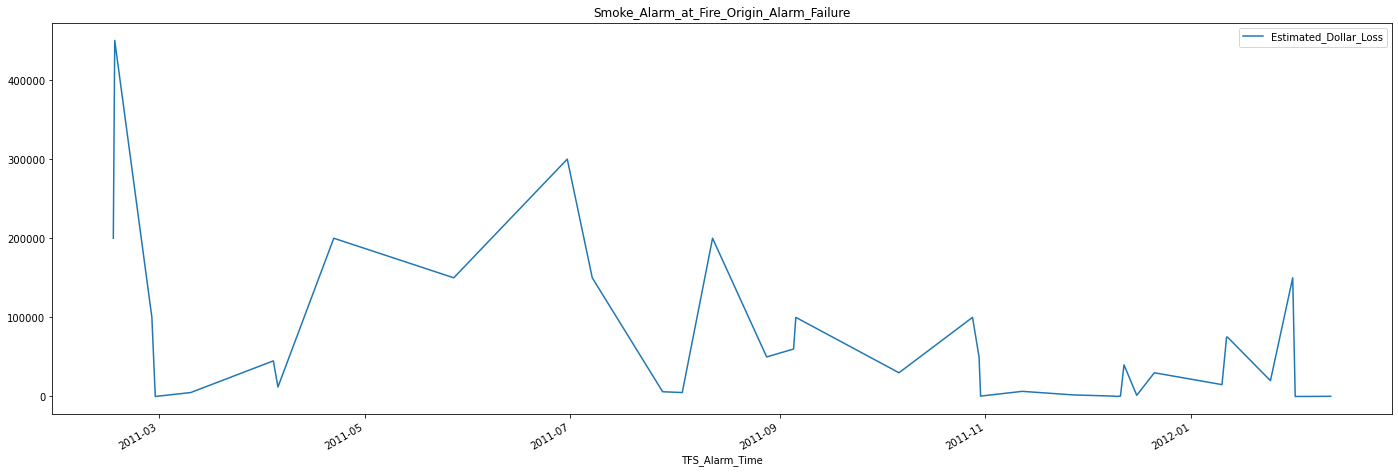

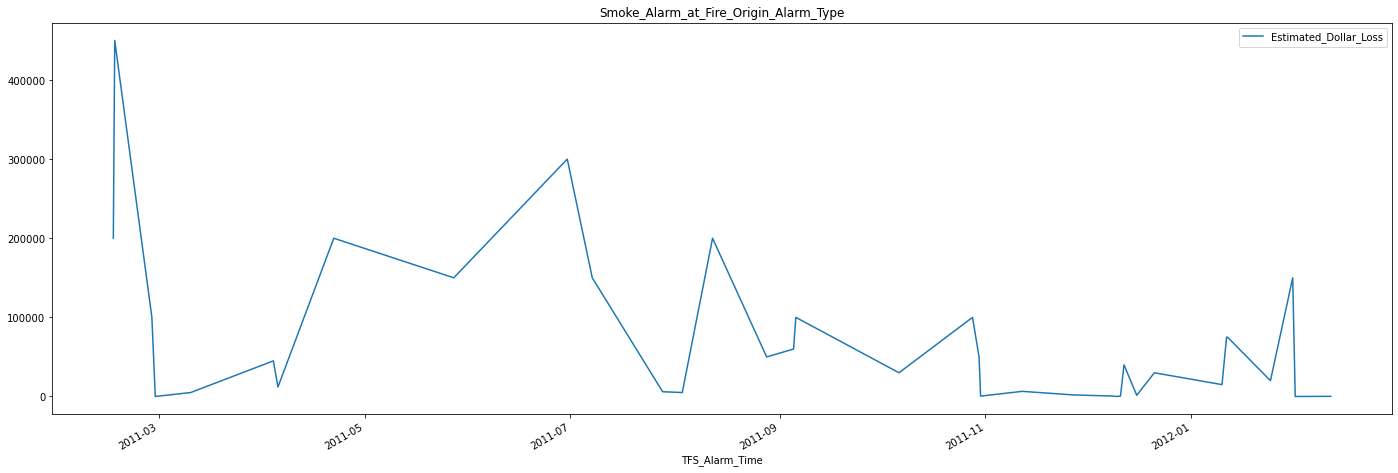

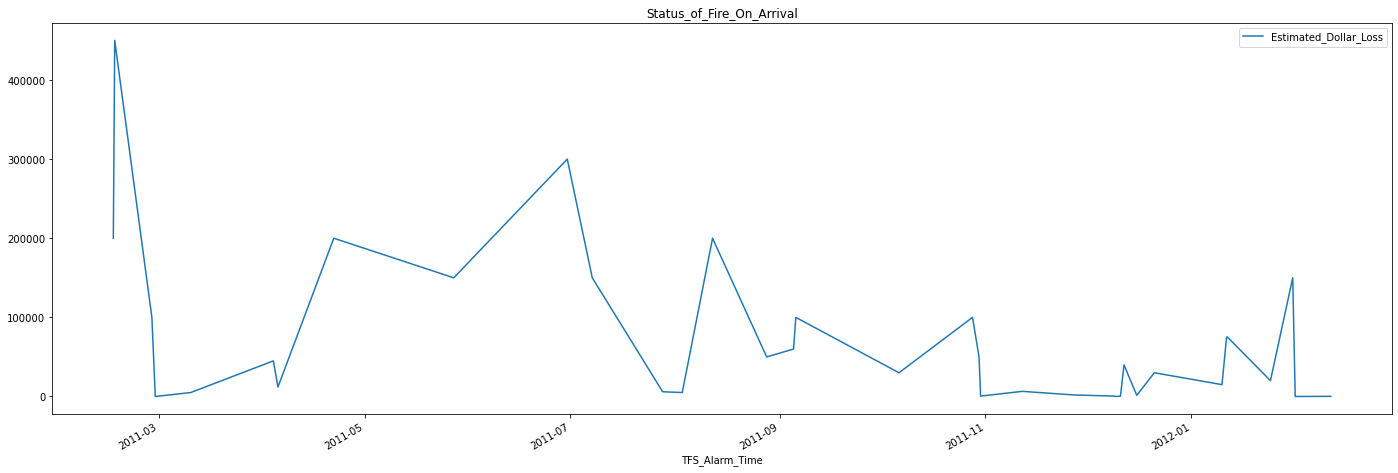

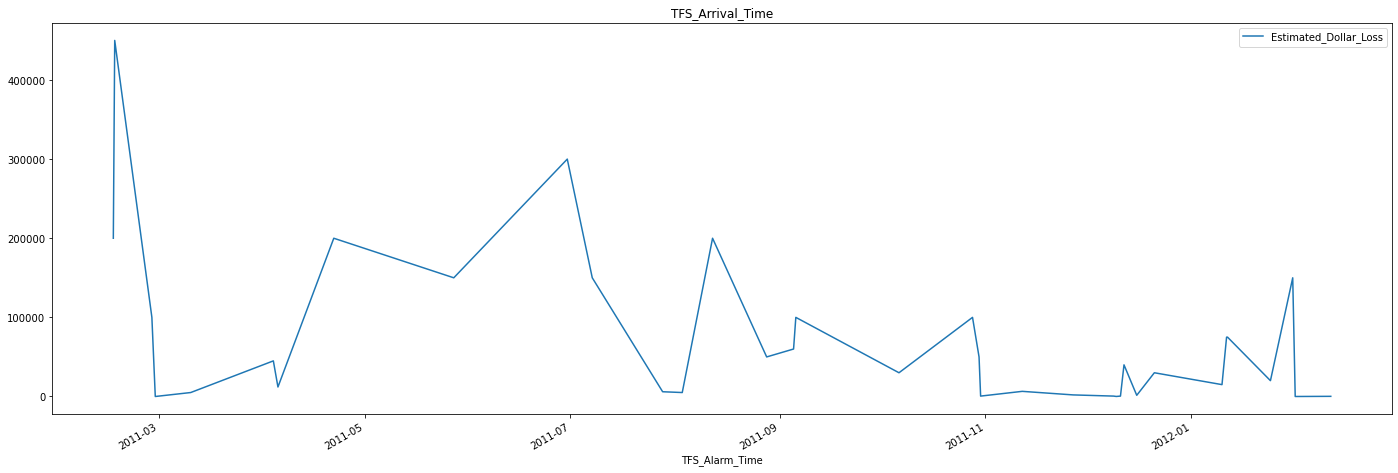

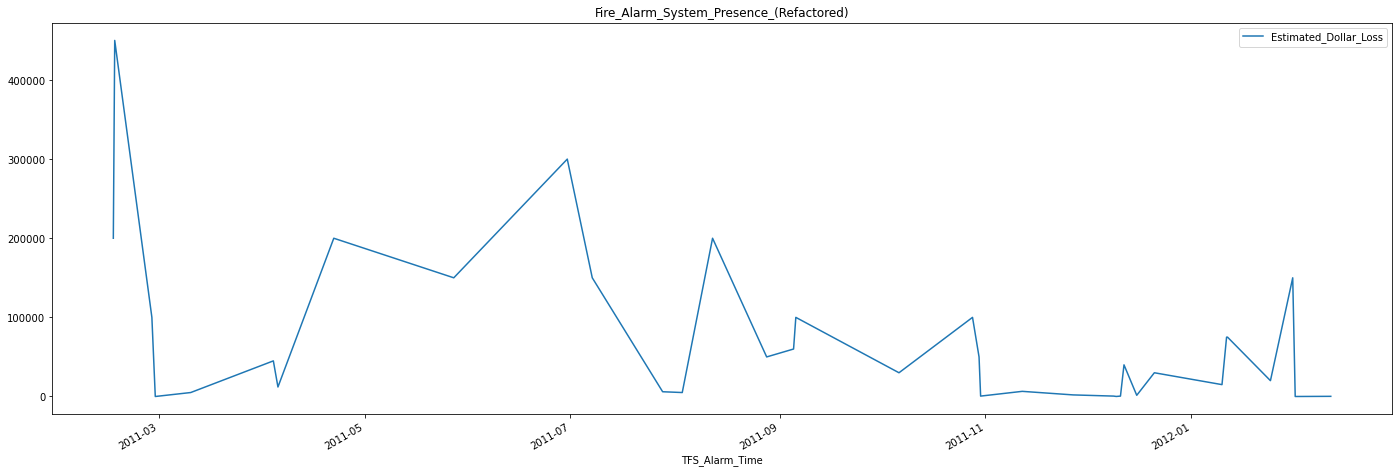

In [98]:
for columna in columnas:
    plot_EDL_por_columna_y_fecha(archivo,columna,"2011-02-12T16:13:28","2012-02-12T16:13:28")

In [99]:
columnas

['Area_of_Origin',
 'Business_Impact',
 'Civilian_Casualties',
 'Count_of_Persons_Rescued',
 'Estimated_Number_Of_Persons_Displaced',
 'Ext_agent_app_or_defer_time',
 'Extent_Of_Fire',
 'Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Under_Control_Time',
 'Ignition_Source',
 'Incident_Station_Area',
 'Incident_Ward',
 'Last_TFS_Unit_Clear_Time',
 'lat',
 'long',
 'Material_First_Ignited',
 'Method_Of_Fire_Control',
 'Possible_Cause',
 'Property_Use',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Status_of_Fire_On_Arrival',
 'TFS_Arrival_Time',
 'Fire_Alarm_System_Presence_(Refactored)']

In [148]:
def boxplot_Civilian_Casualties_por_tipo(dataframe, column: str, agg_fn = pd.DataFrame.mean):
    
    dataframe.boxplot(column="Civilian_Casualties",by=column, figsize=(8,5))
    
    #df_by_column = dataframe.groupby(column).aggregate(agg_fn)
    #plt.pyplot.boxplot(data=df_by_column,x="Civilian_Casualties")

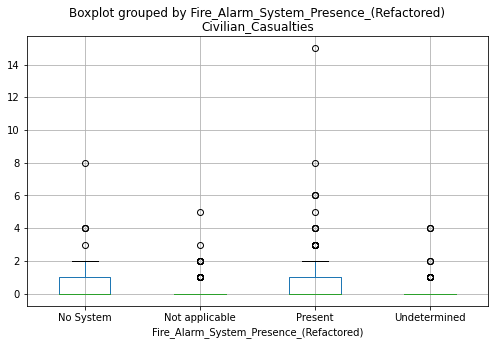

In [149]:
boxplot_Civilian_Casualties_por_tipo(archivo,"Fire_Alarm_System_Presence_(Refactored)")

<AxesSubplot:>

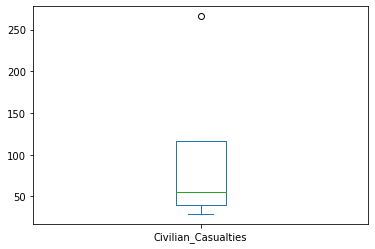

In [129]:
archivo.groupby("Fire_Alarm_System_Presence_(Refactored)").sum()["Civilian_Casualties"].plot.box()

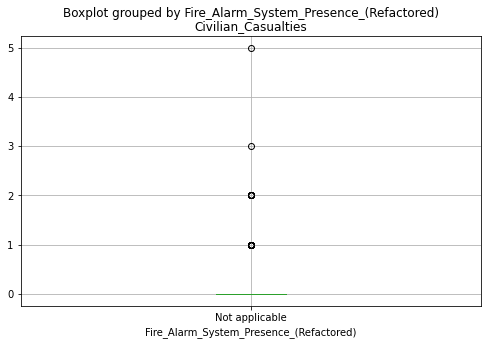

In [151]:
boxplot_Civilian_Casualties_por_tipo(archivo[archivo["Fire_Alarm_System_Presence_(Refactored)"]=="Not applicable"],
                                     "Fire_Alarm_System_Presence_(Refactored)")

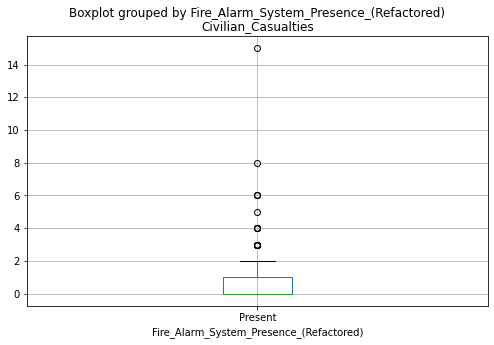

In [153]:
boxplot_Civilian_Casualties_por_tipo(archivo[archivo["Fire_Alarm_System_Presence_(Refactored)"]=="Present"],
                                     "Fire_Alarm_System_Presence_(Refactored)")

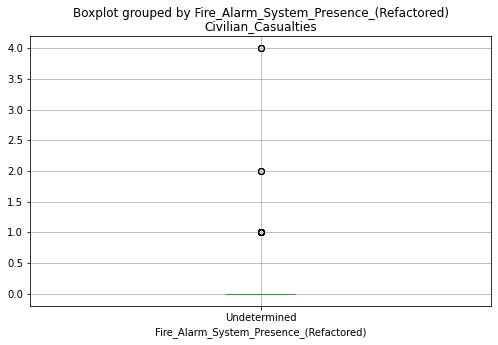

In [154]:
boxplot_Civilian_Casualties_por_tipo(archivo[archivo["Fire_Alarm_System_Presence_(Refactored)"]=="Undetermined"],
                                     "Fire_Alarm_System_Presence_(Refactored)")

In [155]:
archivo.groupby("Fire_Alarm_System_Presence_(Refactored)").sum()["Civilian_Casualties"]

Fire_Alarm_System_Presence_(Refactored)
No System          66
Not applicable     44
Present           266
Undetermined       29
Name: Civilian_Casualties, dtype: int64

In [162]:
#Funcion de ejemplo
def create_boxplot_by_type(file_name:str, column: str, agg_fn= pd.DataFrame.count):
    df_complete = pd.read_csv(file_name)
    df_by_type = df_complete.groupby([column,"Fecha"])[["Sueldo Neto"]].aggregate(agg_fn)# .count()
    df_by_type.boxplot(by = column, figsize=(27,18))
    
#Implementación propia
def boxplot_por_tipo(dataframe, column: str, agg_fn = pd.DataFrame.mean,):
    df_by_column = dataframe.groupby([column,"TFS_Alarm_Time"])[["Civilian_Casualties"]].aggregate(agg_fn)
    df_by_column.reset_index(inplace=True)
    df_by_column.set_index("TFS_Alarm_Time", inplace=True)

    df_by_column.boxplot(by = column, figsize=(24,8), rot=90)

In [ ]:
columnas.remove("Civilian_Casualties")

C:\Users\anton\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


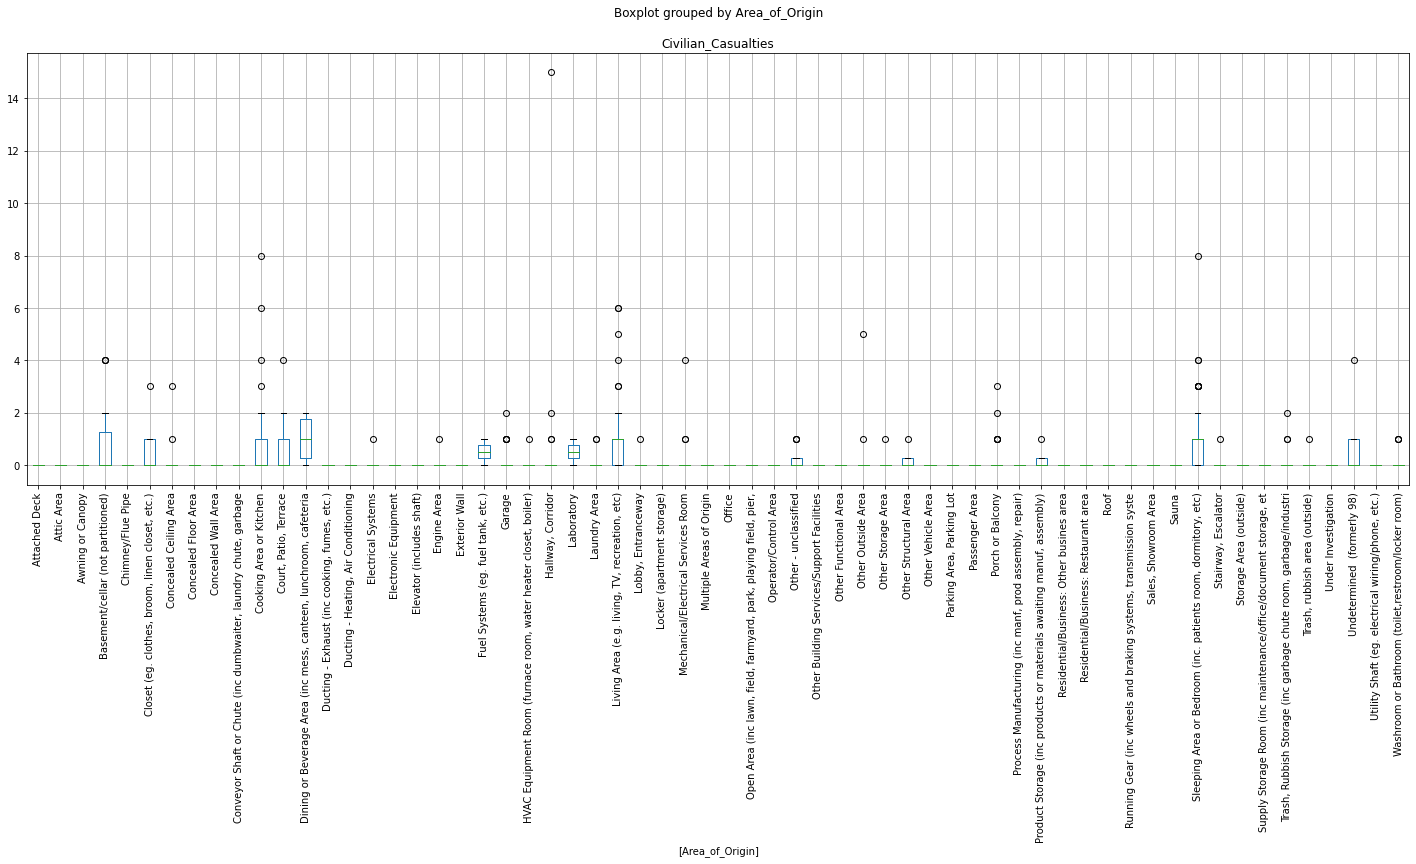

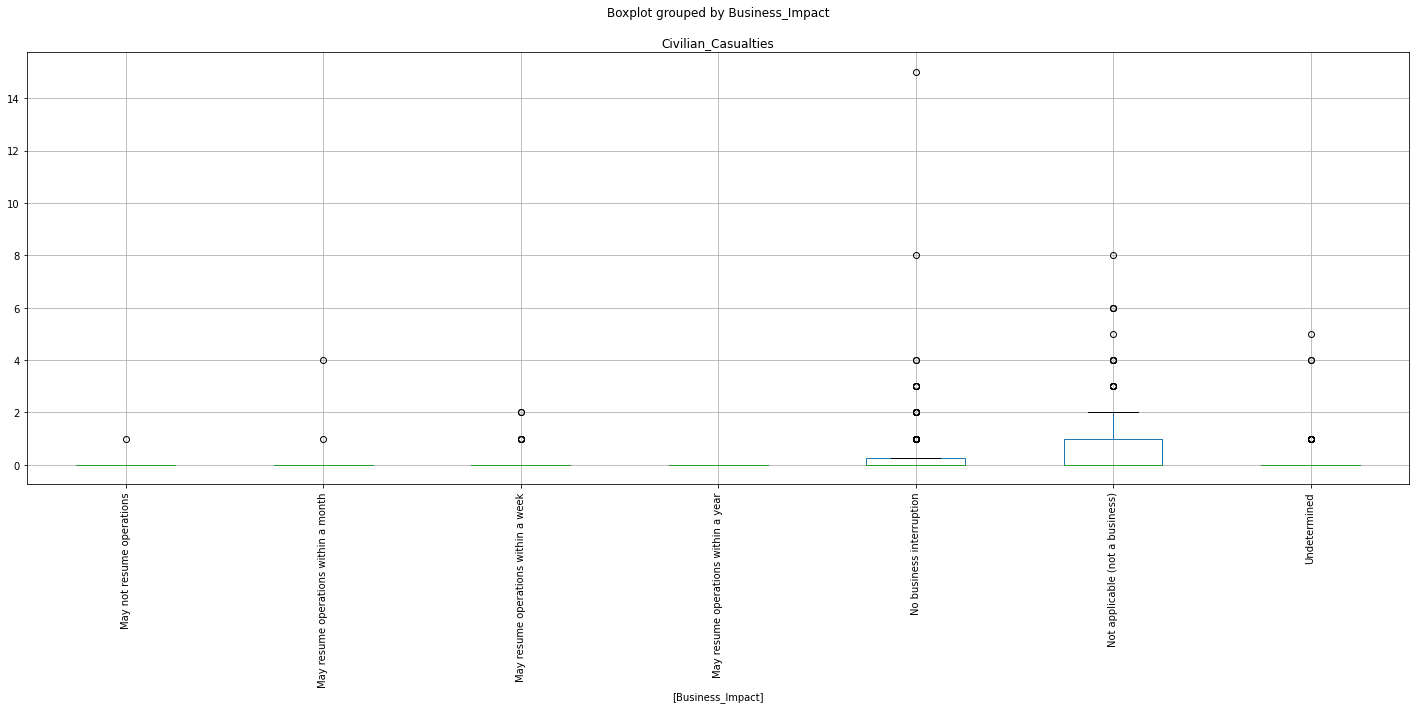

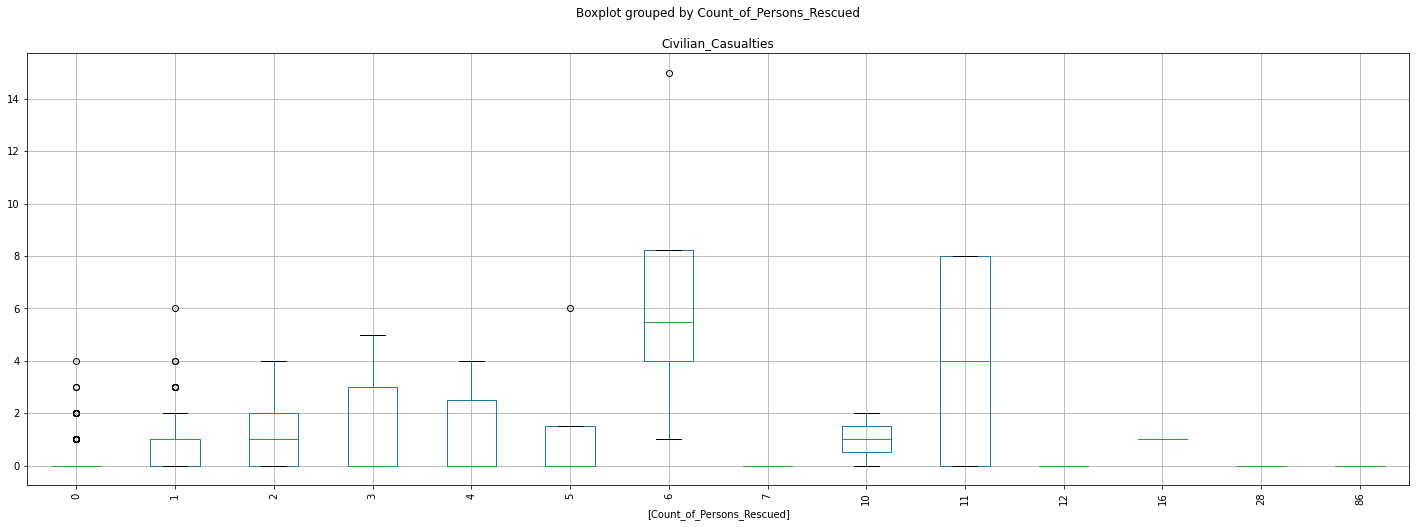

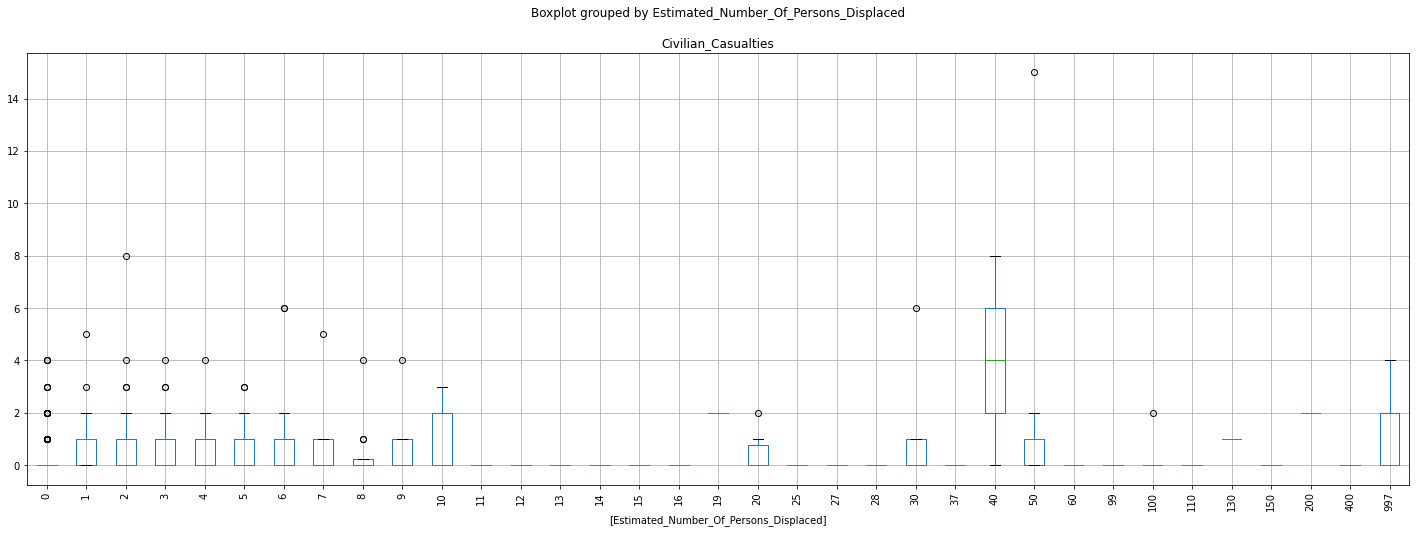

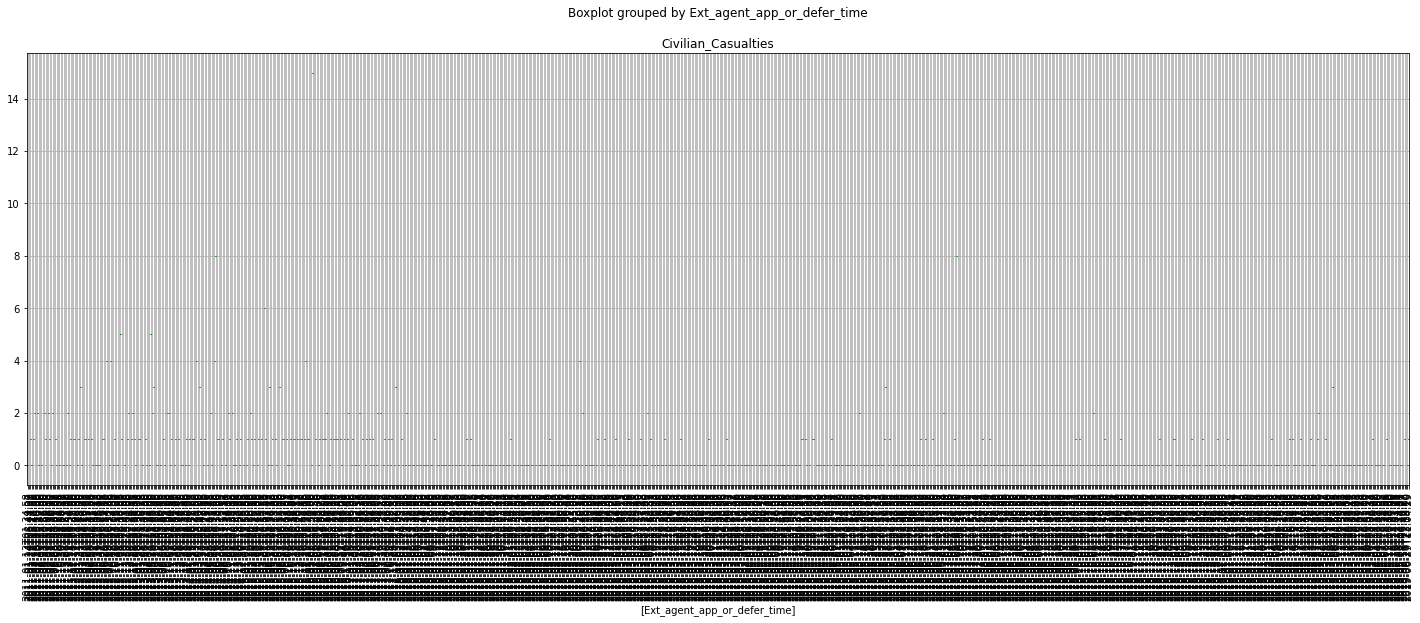

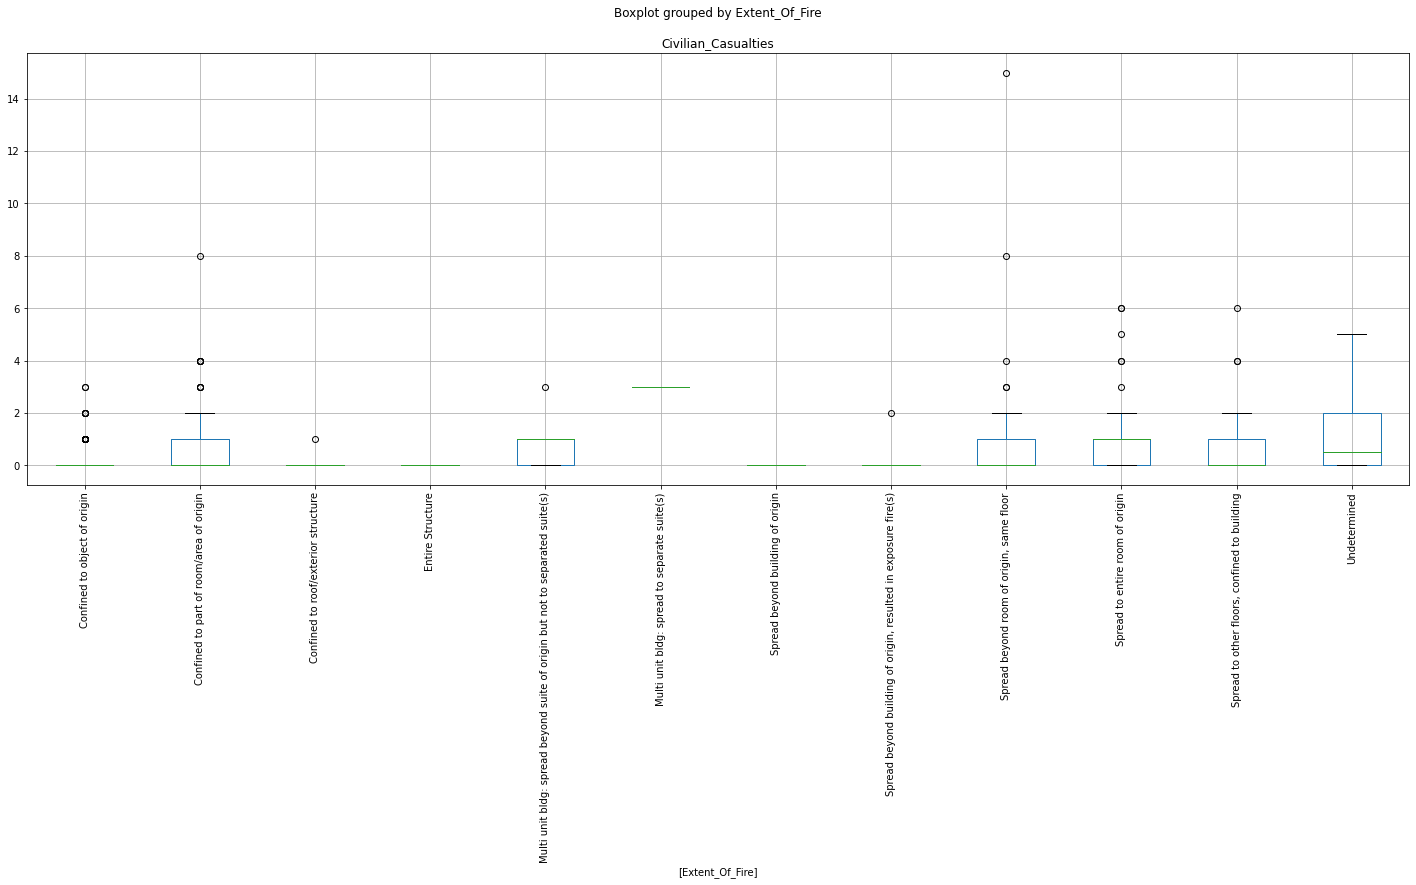

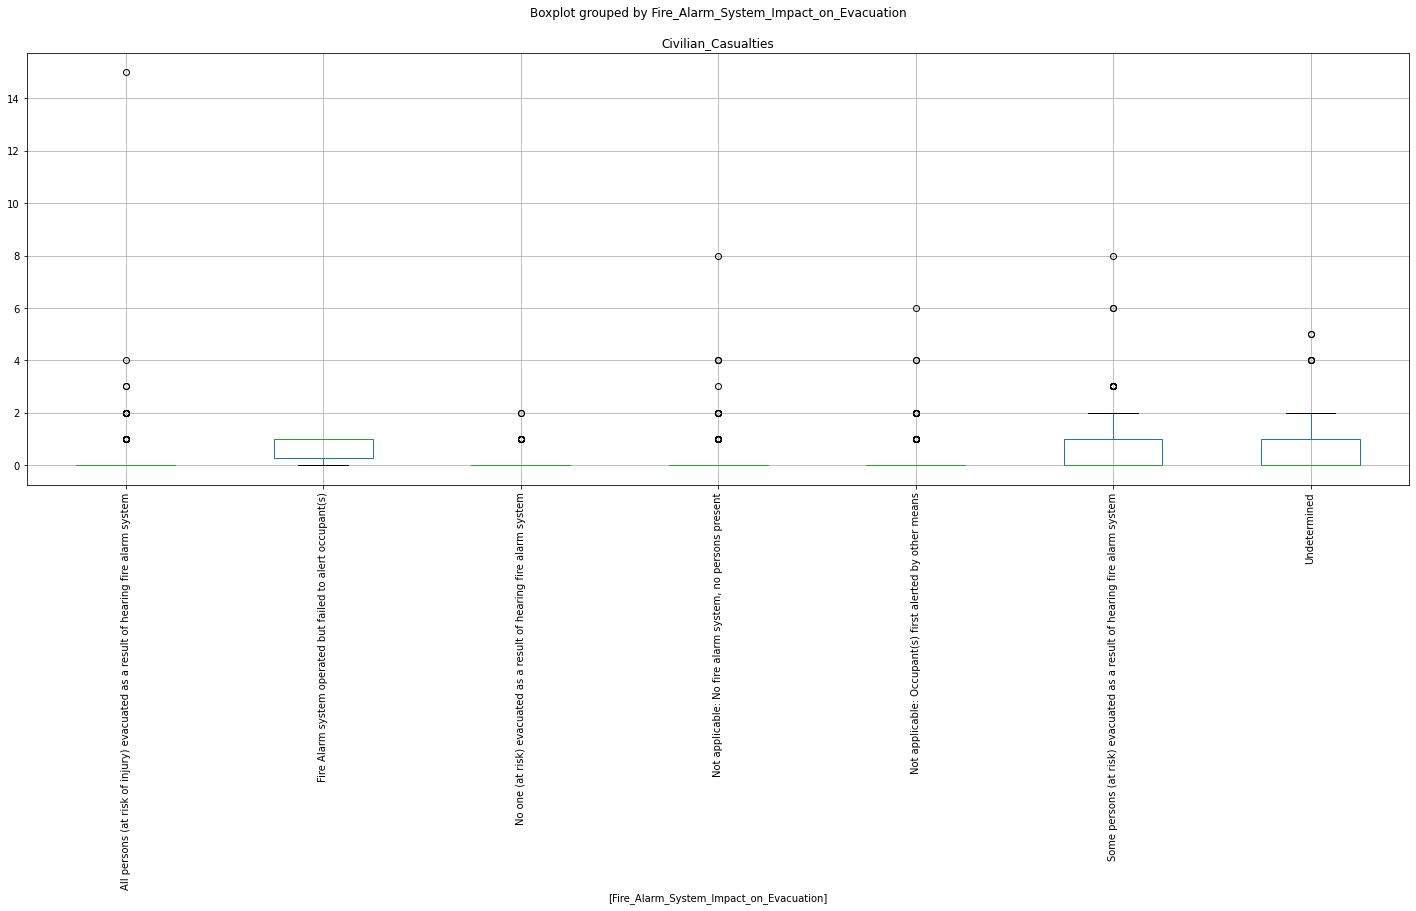

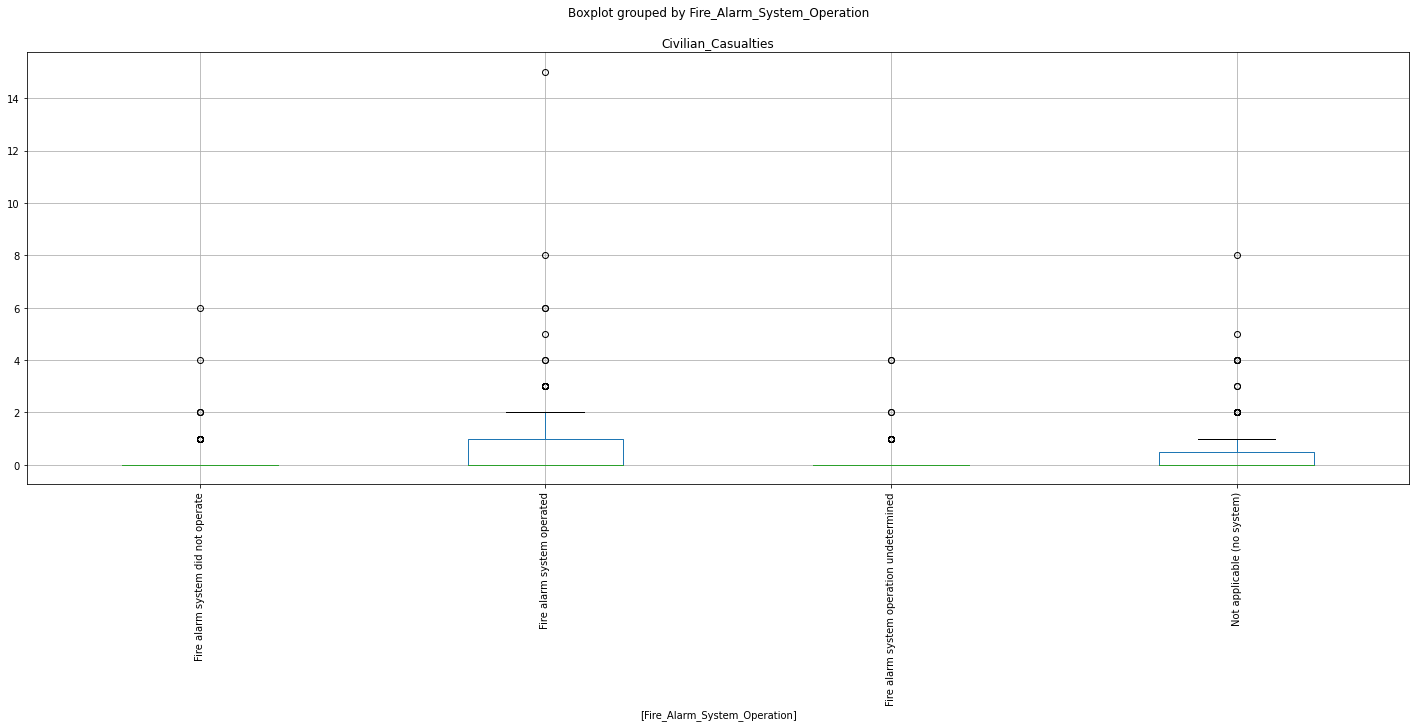

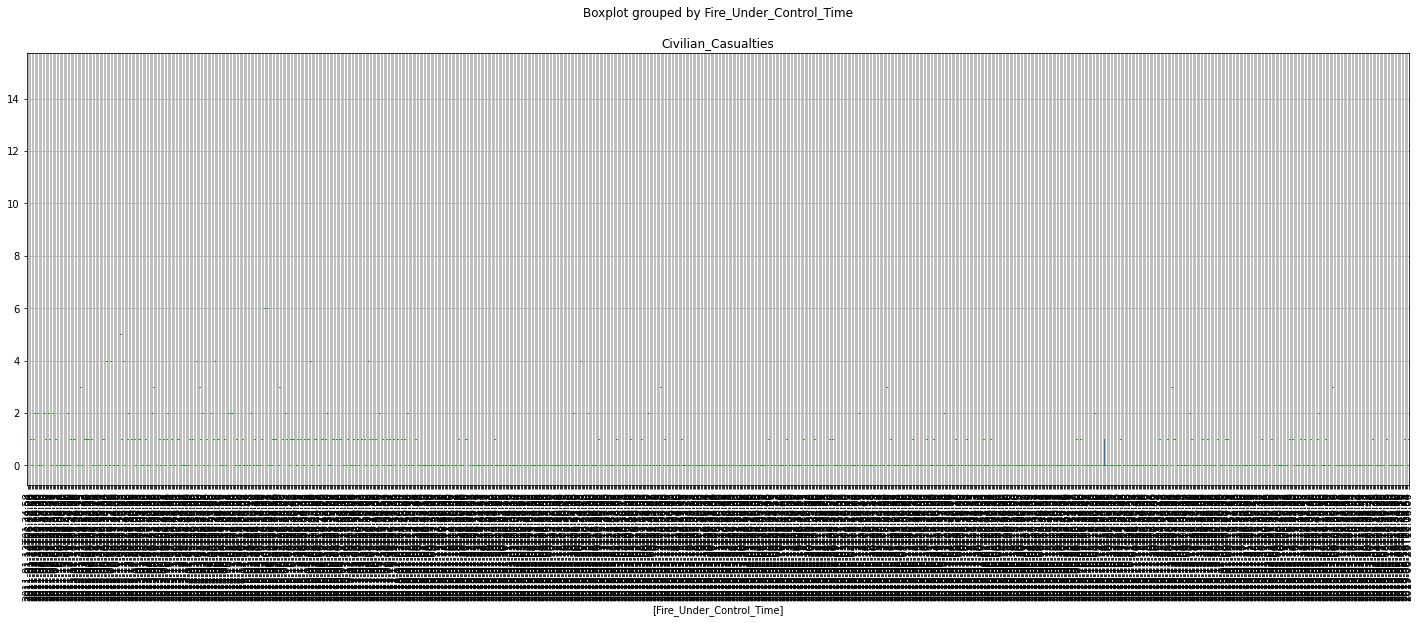

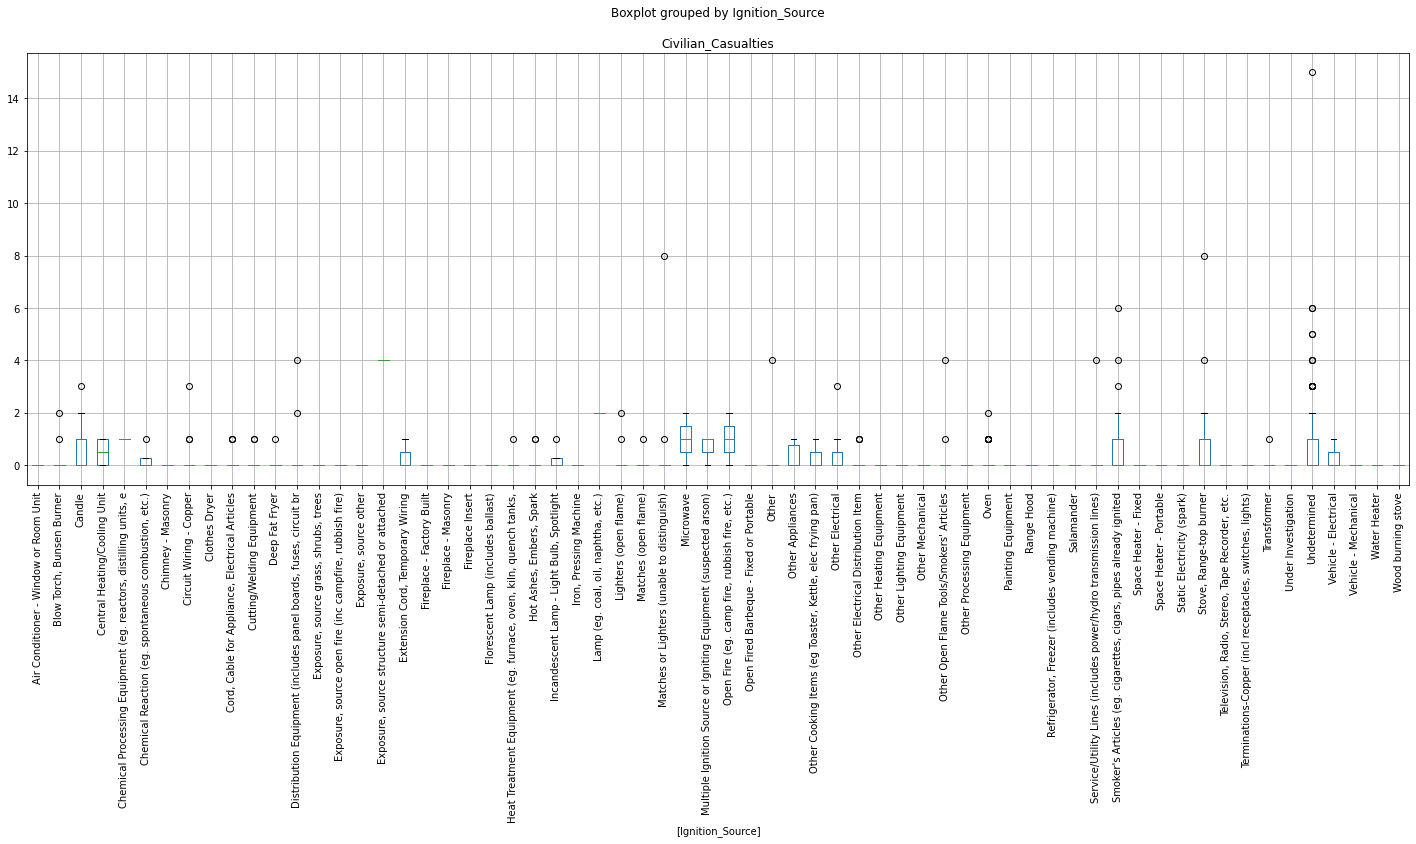

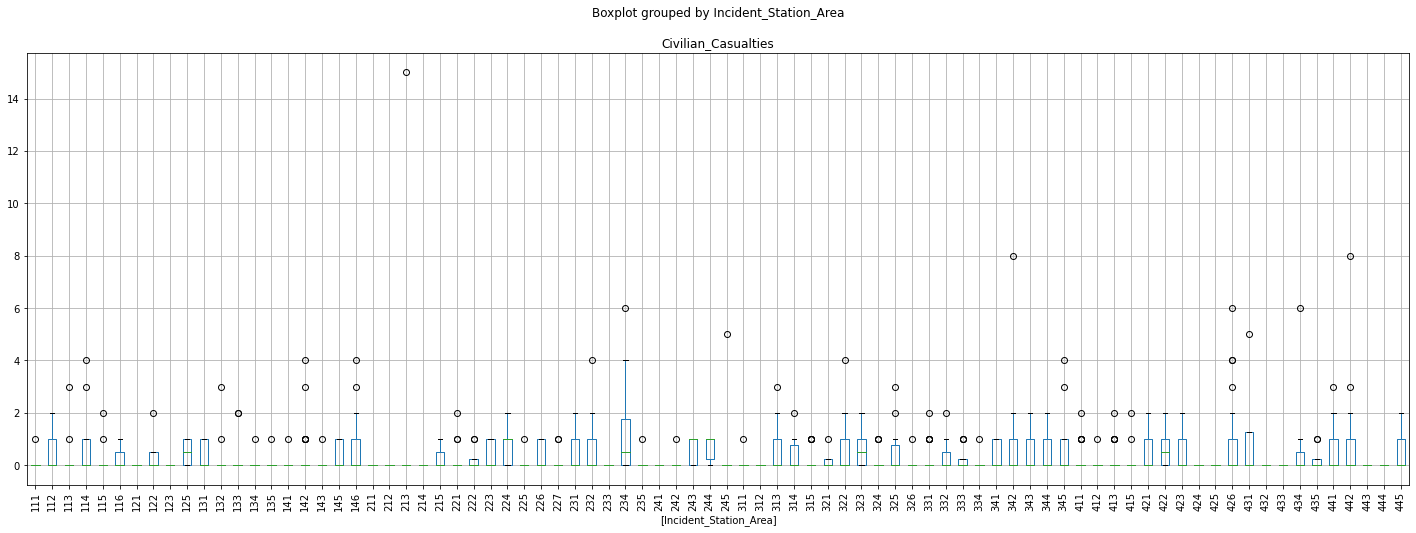

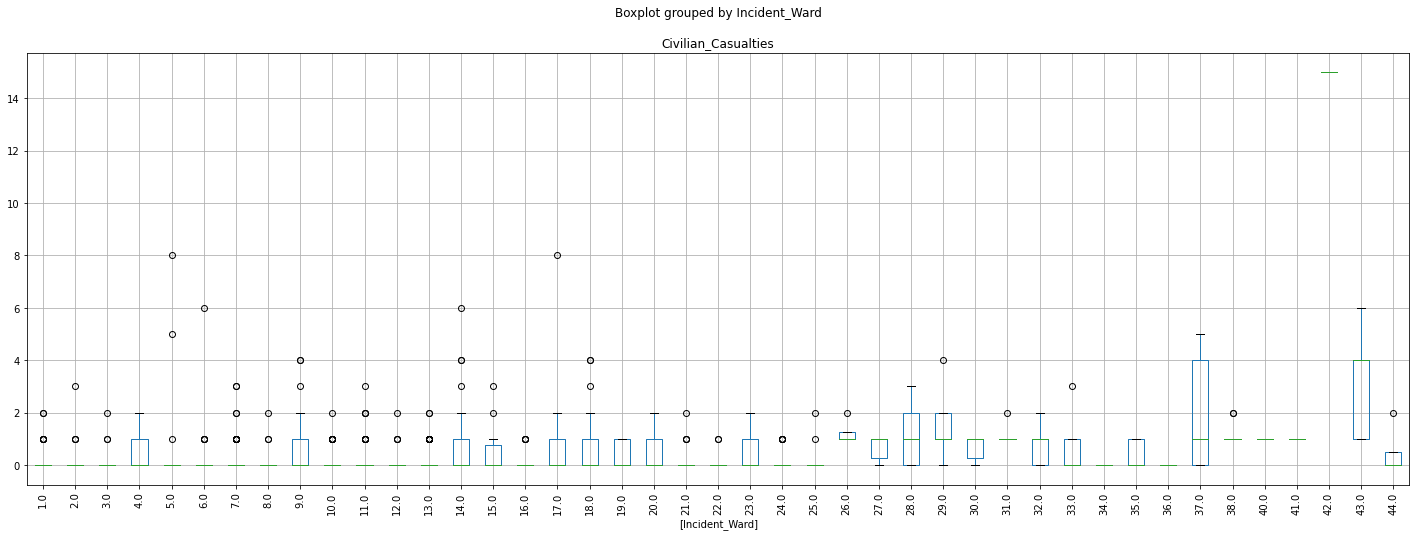

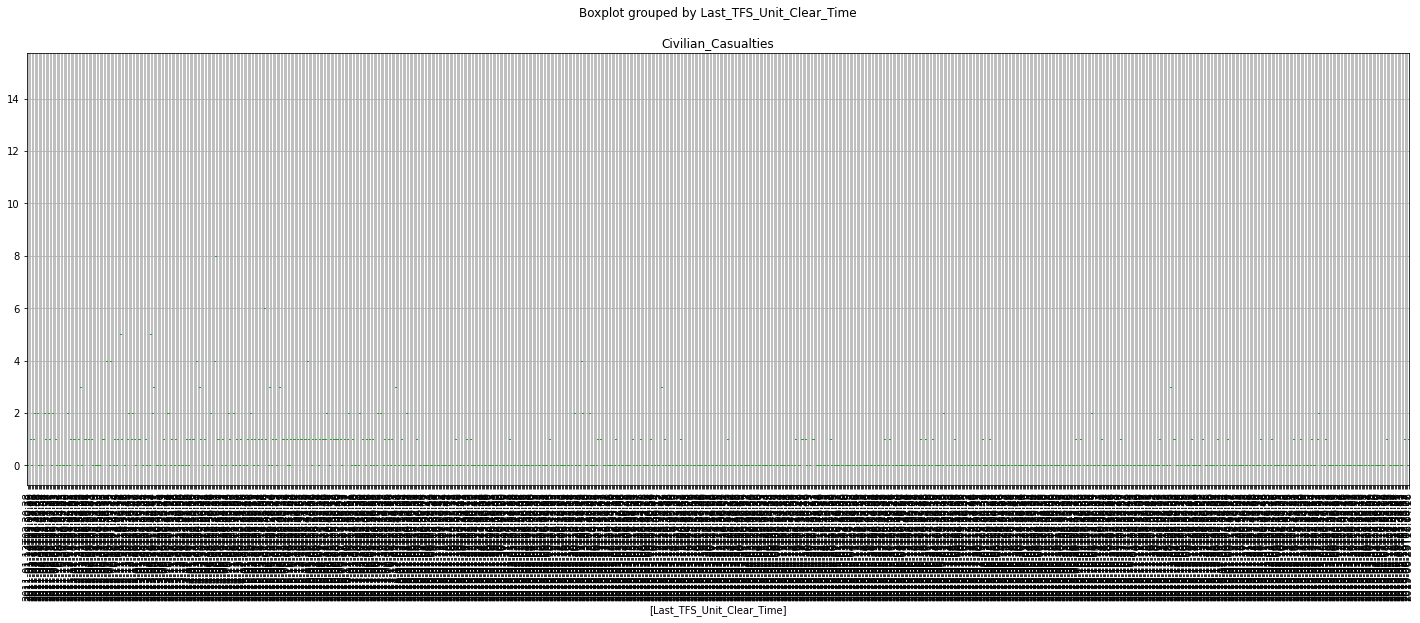

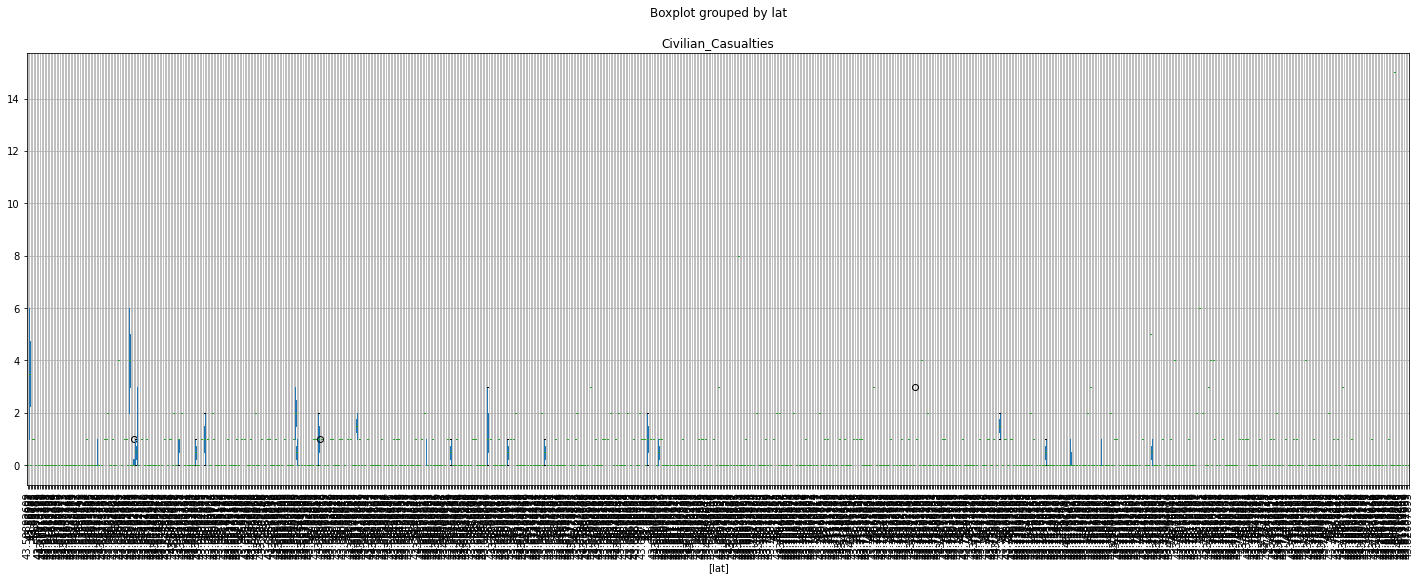

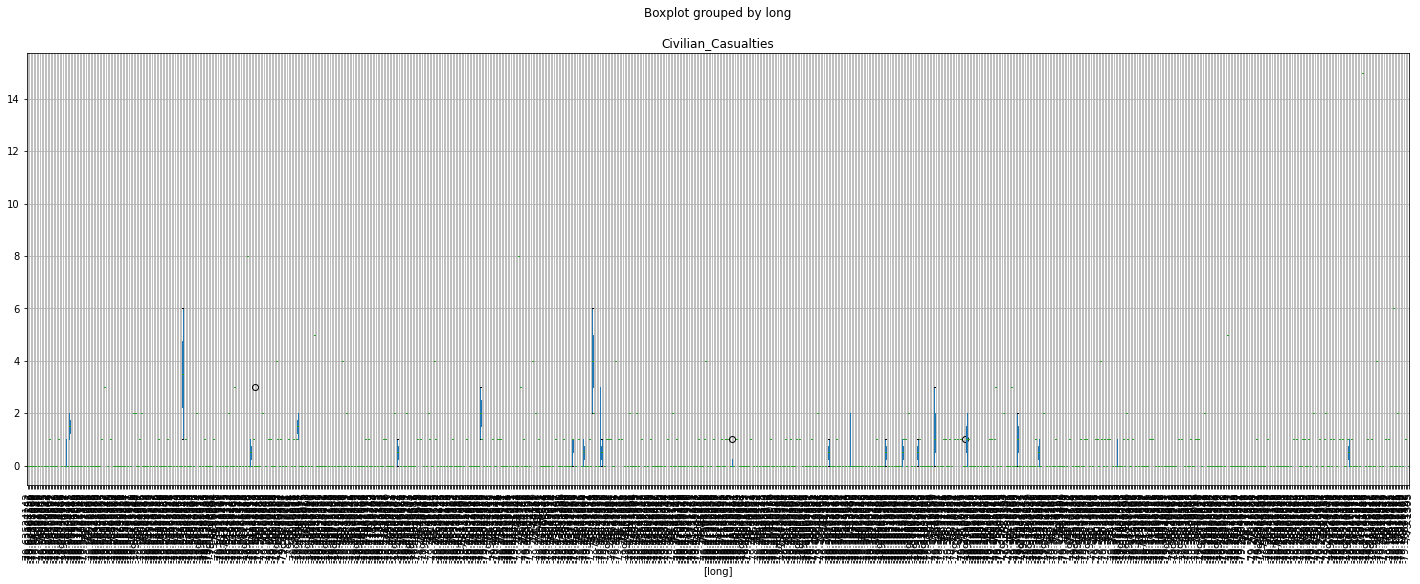

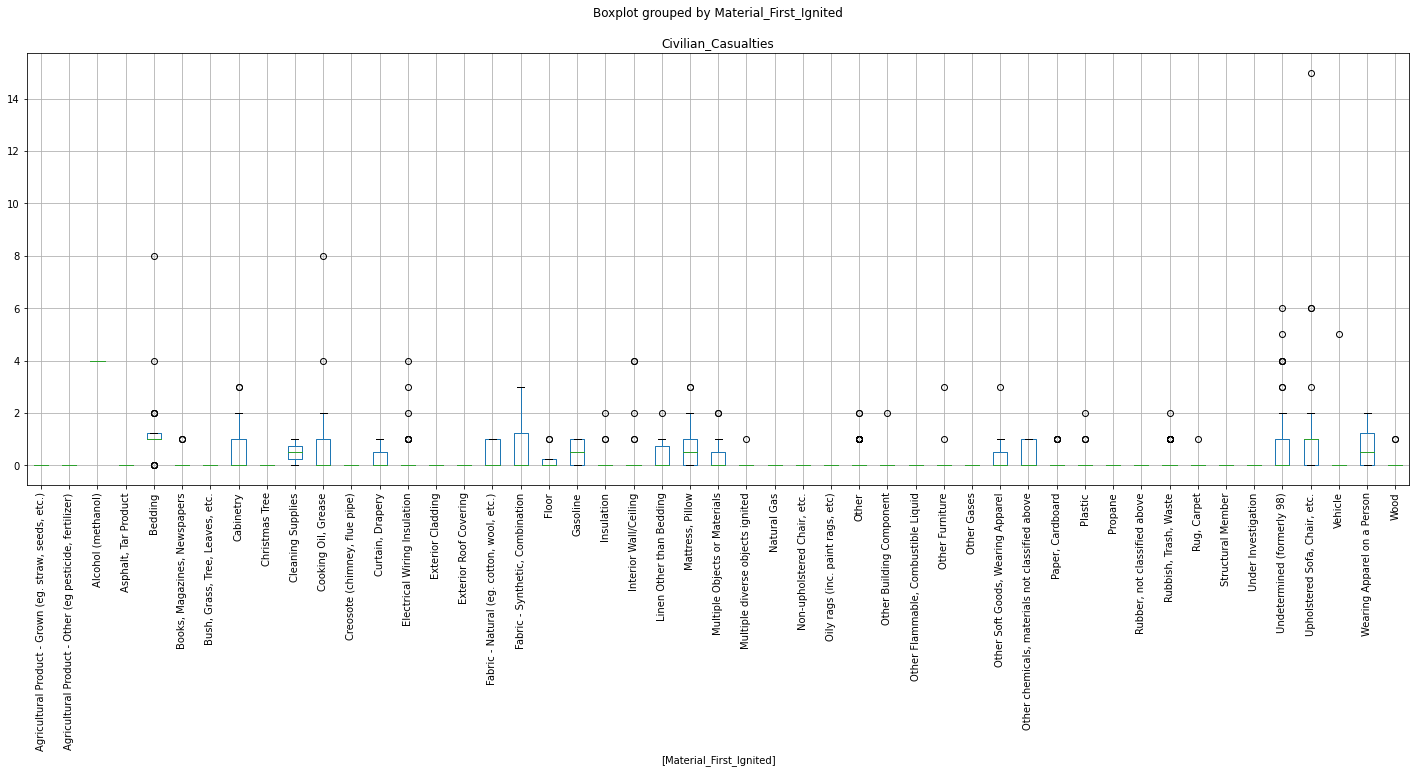

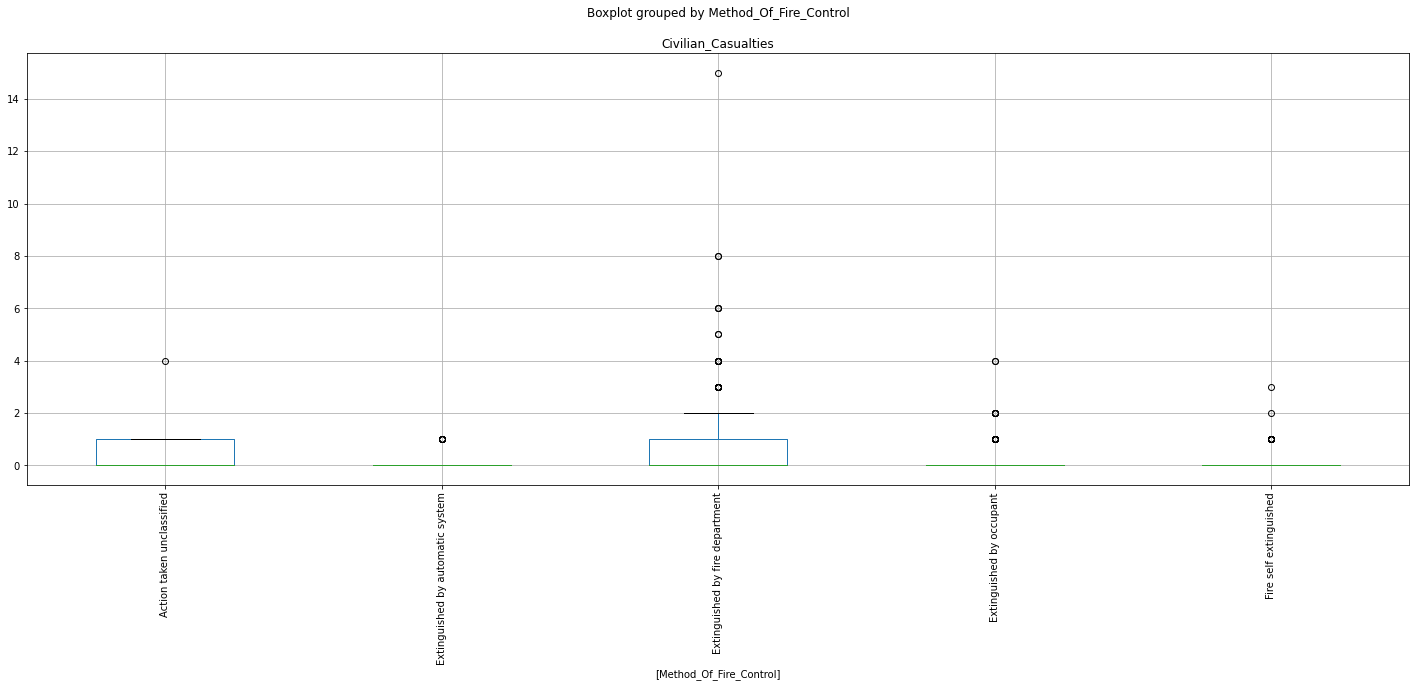

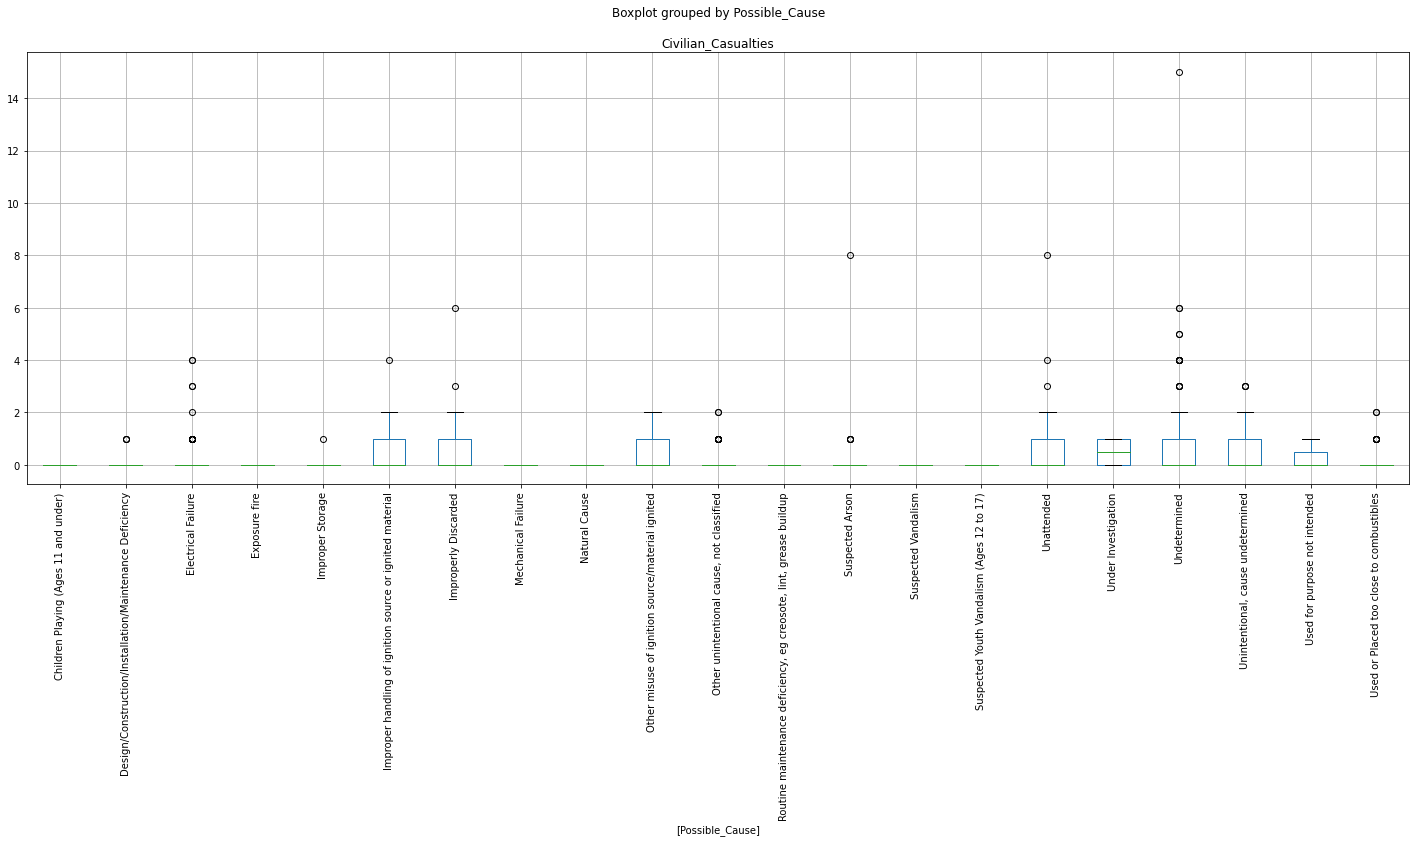

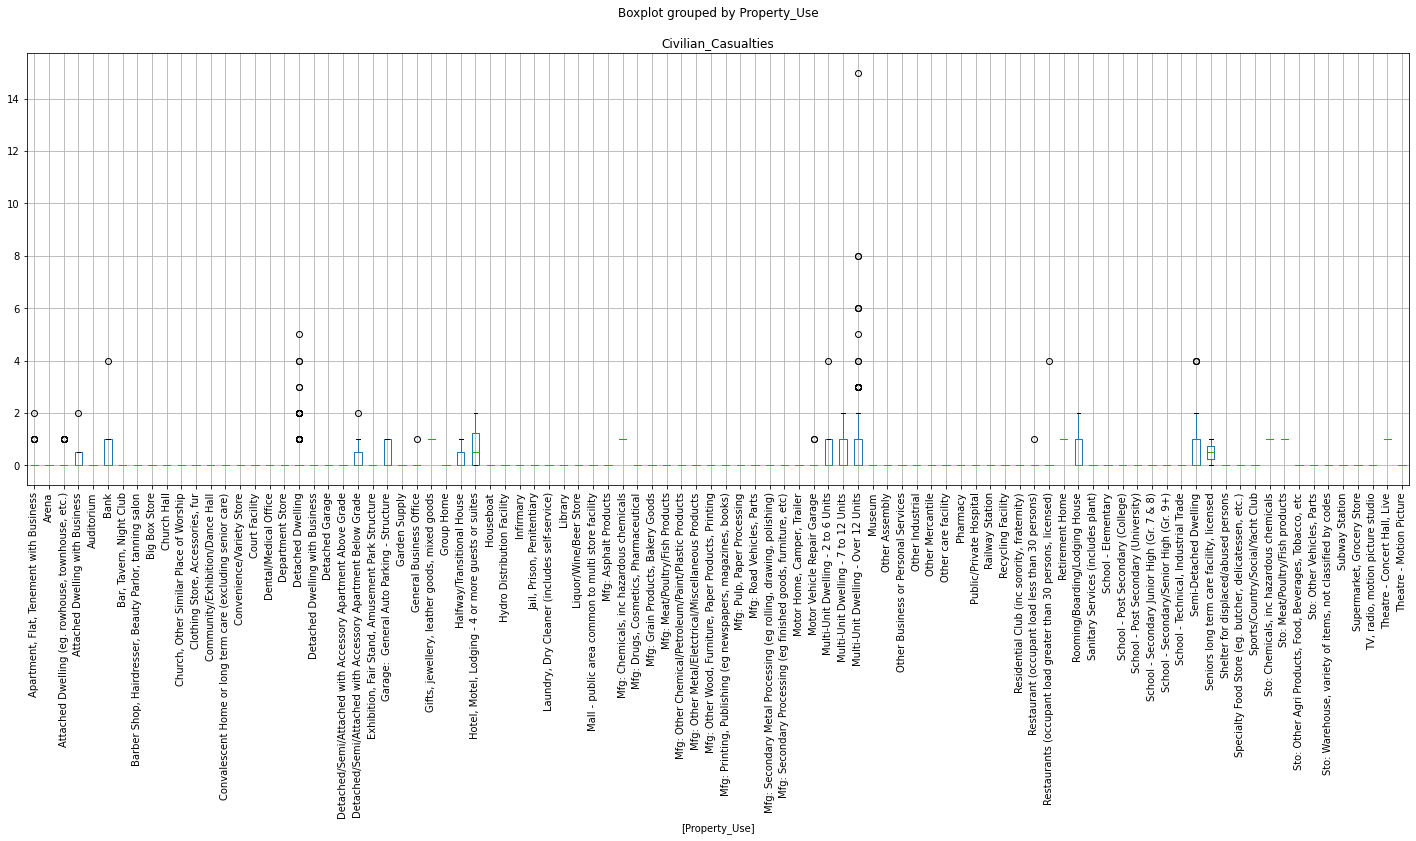

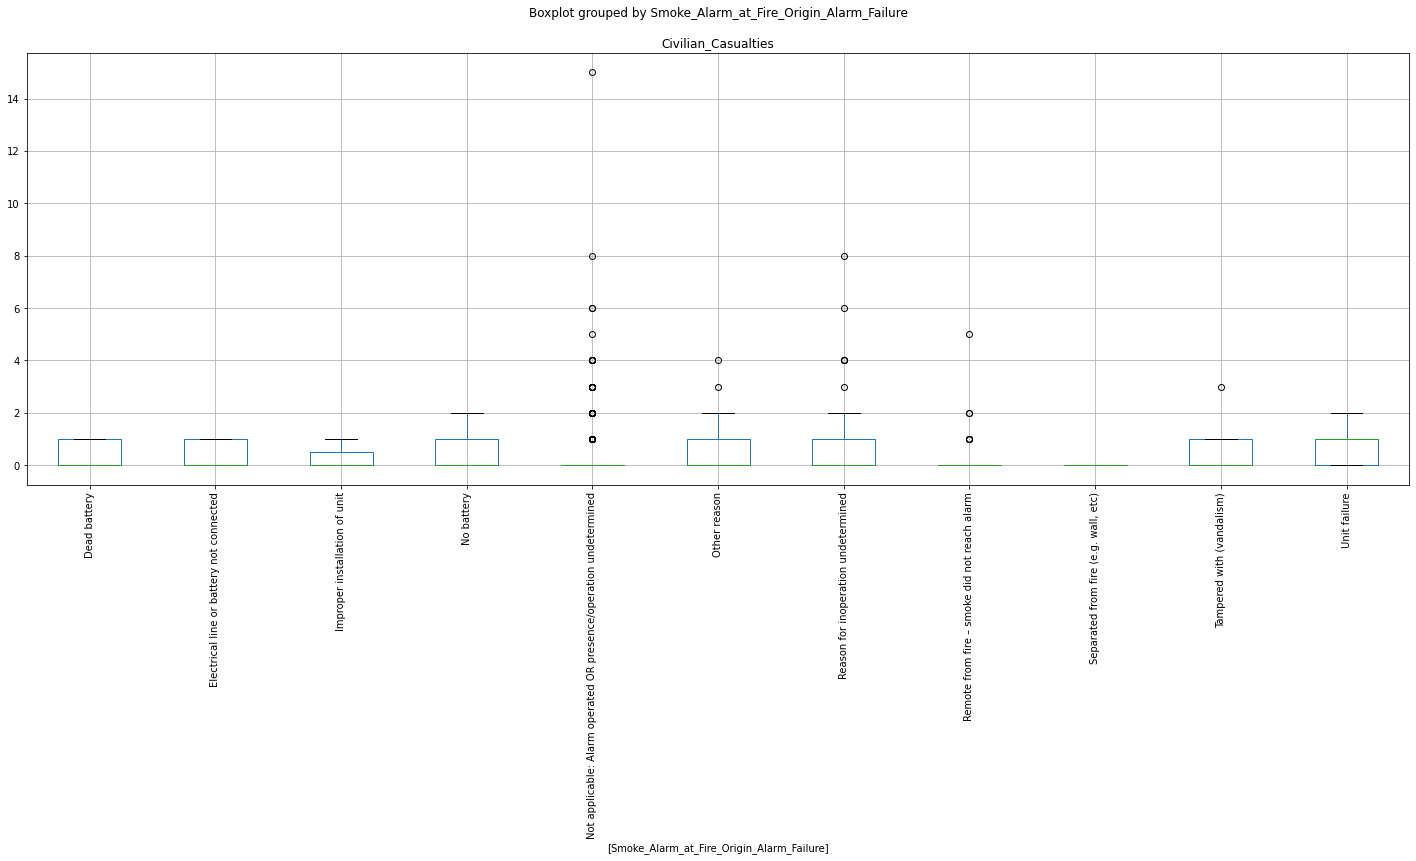

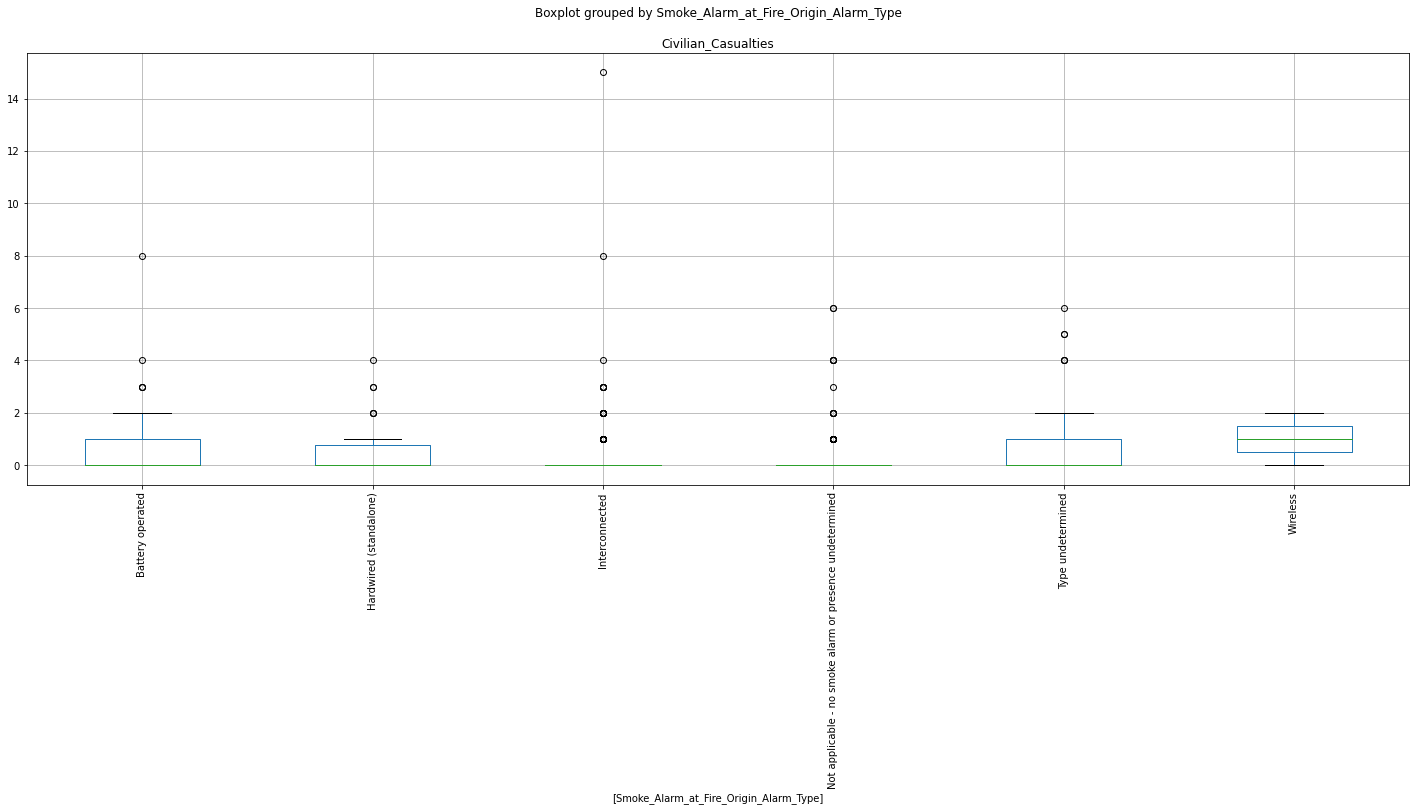

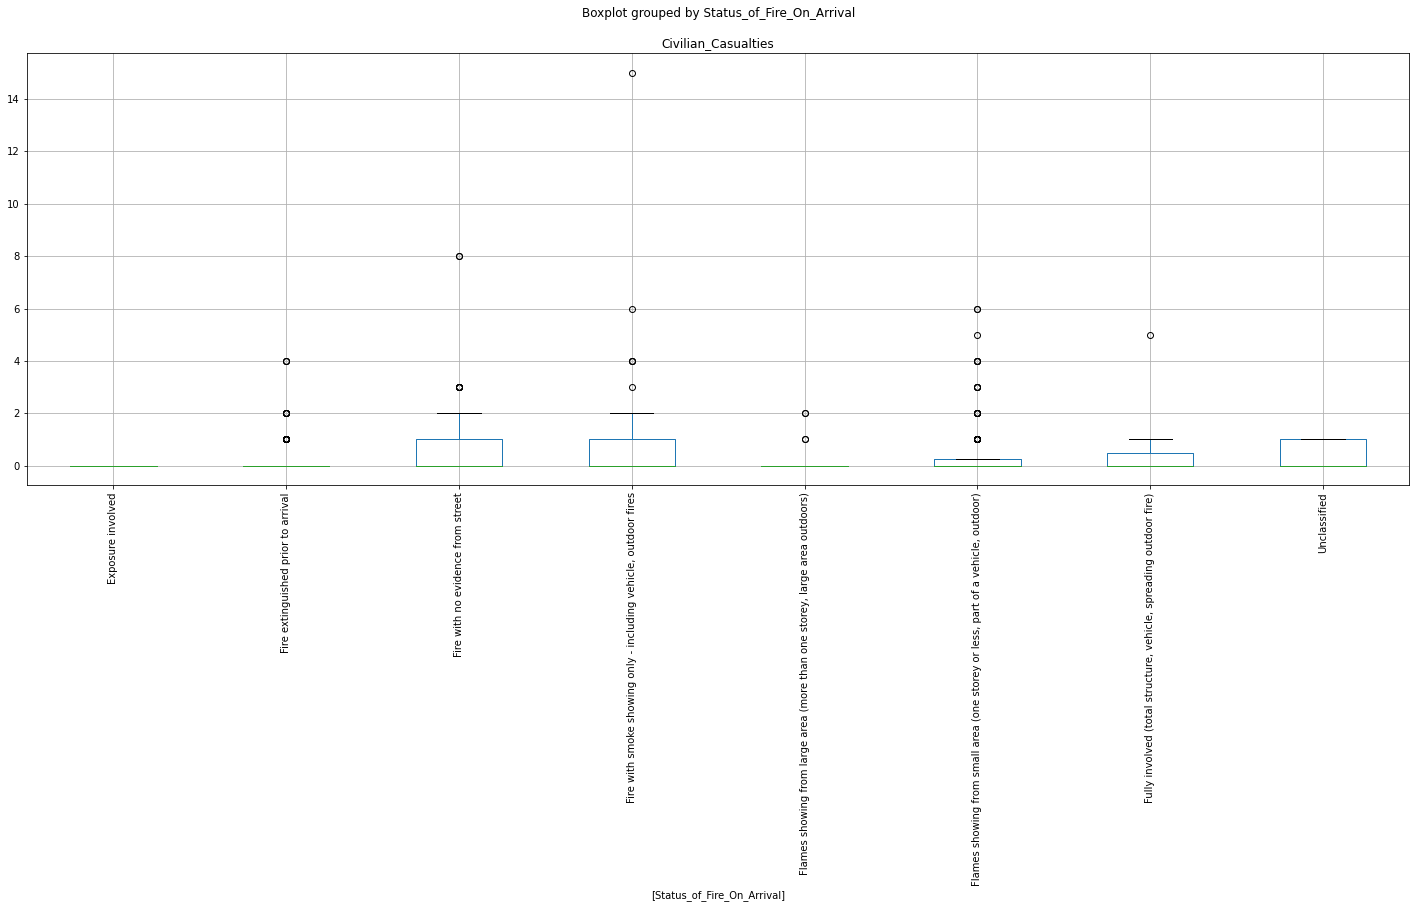

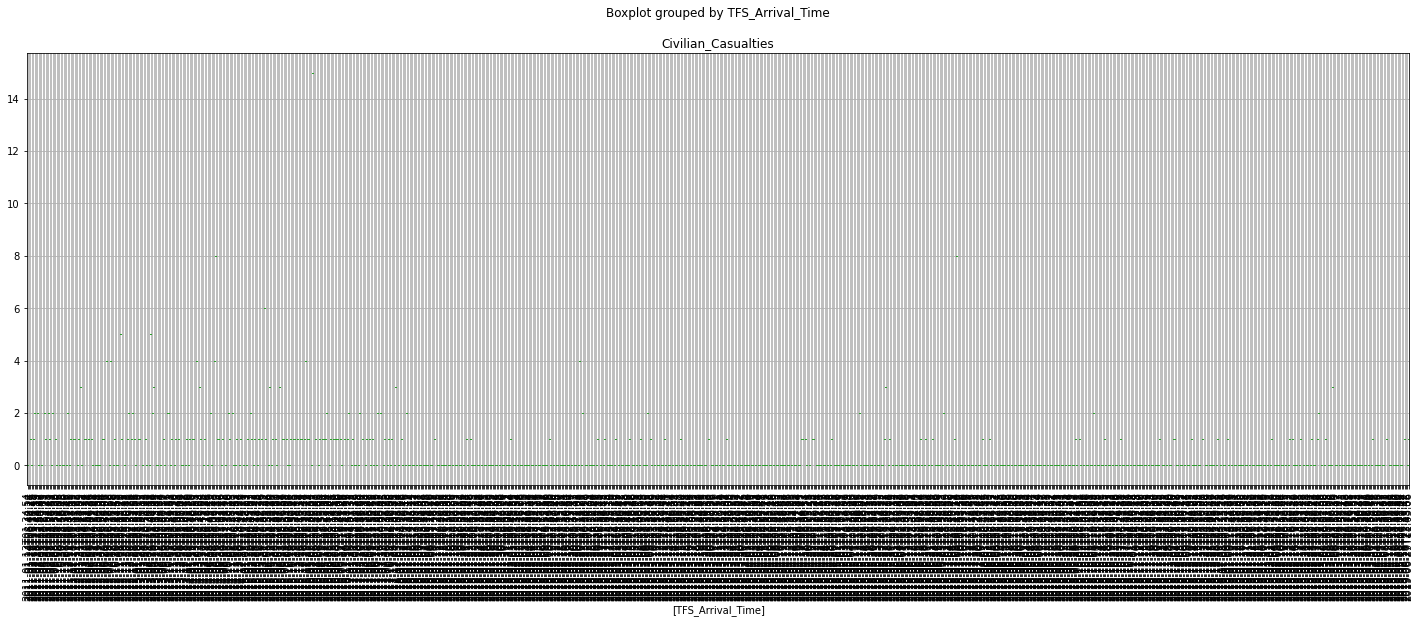

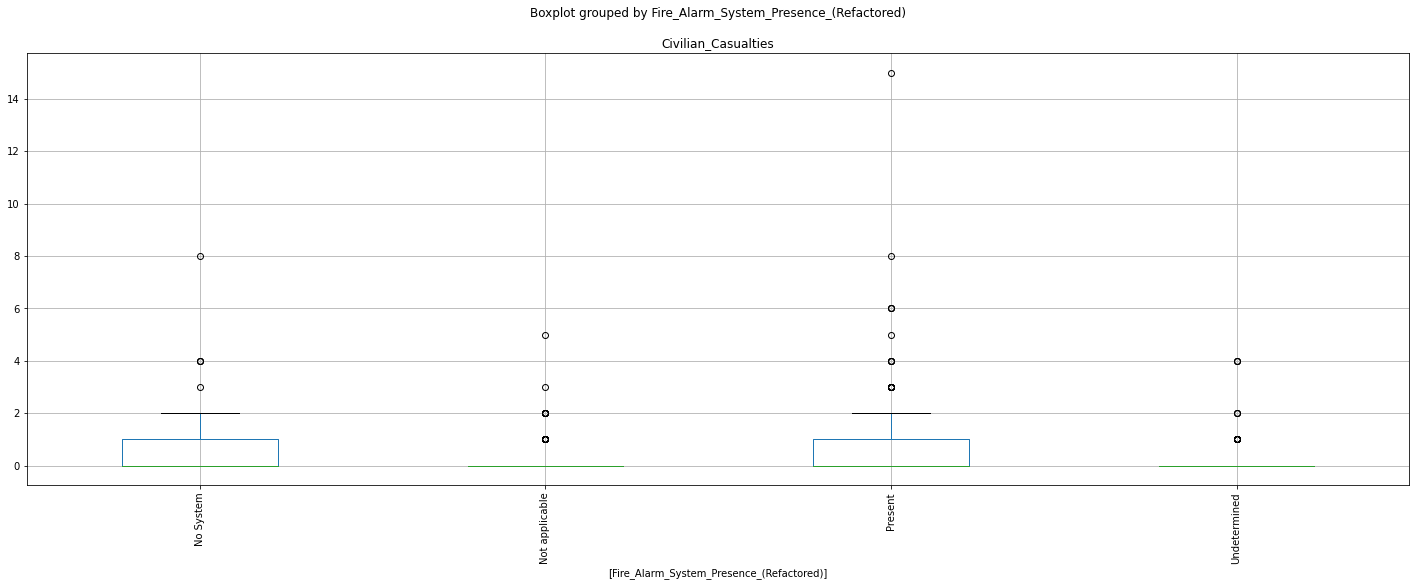

In [165]:
for columna in columnas:
    boxplot_por_tipo(archivo,columna)

# Statistical Analysis

In [9]:
from typing import Tuple, List
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Normalizing Data

Ejemplo de como normalizar los datos. Este procedimiento lo he realizado en las columnas tipo Date y en la columna de Fire_Alarm_System_Presence_(Refactored)

In [ ]:
def categorize(name:str)->str:
    if 'South-Eastern Metropolitan' in name:
        return 'South-Eastern'
    if 'Northern Metropolitan' in name:
        return 'Northern'
    if 'Western Metropolitan' in name:
        return 'Western'
    if 'Southern Metropolitan' in name:
        return 'Southern'
    if 'Eastern Metropolitan' in name:
        return 'Eastern'
    return 'Other'

def transform_into_typed_df(raw_df: pd.DataFrame)->pd.DataFrame:
    raw_df["Date"] = pd.to_datetime(raw_df['Date'], format="%d/%m/%Y")
    raw_df["MetropolitanRegion"] = raw_df["MetropolitanRegion"].map(categorize)
    return raw_df

def normalize_data(df: pd.DataFrame)->pd.DataFrame:
    df_complete = transform_into_typed_df(df)
    df_complete.to_csv("typed_melb_clean_data.csv", index=False)
    return df_complete

### ANOVA

In [11]:
def anova(df_aux: pd.DataFrame, str_ols: str):
    modl = ols(str_ols, data=df_aux).fit()
    anova_df = sm.stats.anova_lm(modl, typ=2)
    
    if anova_df["PR(>F)"][0] < 0.005:
        print("hay diferencias")
        print(anova_df)
    else:
        print("No hay diferencias")

def anova_1(df_complete: pd.DataFrame):
    df_by_type = df_complete.groupby(["Method_Of_Fire_Control", 
                                      "TFS_Alarm_Time"])[["Estimated_Dollar_Loss"]].aggregate(pd.DataFrame.sum)
    df_by_type.reset_index(inplace=True)
    df_by_type.set_index("TFS_Alarm_Time", inplace=True)
    df_by_type.reset_index(inplace=True)
    
    
    df_aux = df_by_type.rename(columns={"Estimated_Dollar_Loss": "Gasto"}).drop(['TFS_Alarm_Time'], axis=1)
    print(df_aux.head())
    anova(df_aux, "Gasto ~ Method_Of_Fire_Control")
    

#DataFrame normalizado
#dfNorm = normalize_data(dftest)

#Análisis del precio con el DF normalizado
#dfa = analysis_price(dfNorm)

#create_plot(dfNorm)

#Grafica BoxPlot del precio según cada suburb
#create_boxplot_by_type(dfNorm, "Suburb", pd.DataFrame.mean)

#ANOVA
anova_1(archivo)

      Method_Of_Fire_Control  Gasto
0  Action taken unclassified  15600
1  Action taken unclassified      0
2  Action taken unclassified  40000
3  Action taken unclassified    250
4  Action taken unclassified     50
hay diferencias
                              sum_sq     df         F    PR(>F)
Method_Of_Fire_Control  1.172469e+12    4.0  7.997154  0.000002
Residual                3.643279e+13  994.0       NaN       NaN


# Linear Models

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [25]:
#Since Linear Regression only accepts integer/float data, we can only work with the following columns: 

#["Civilian_Casualties","Count_of_Persons_Rescued", "Estimated_Dollar_Loss","Estimated_Number_Of_Persons_Displaced",
#"Incident_Station_Area","Incident_Ward","lat","long"]
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Area_of_Origin                            999 non-null    object        
 1   Business_Impact                           999 non-null    object        
 2   Civilian_Casualties                       999 non-null    int64         
 3   Count_of_Persons_Rescued                  999 non-null    int64         
 4   Estimated_Dollar_Loss                     999 non-null    int64         
 5   Estimated_Number_Of_Persons_Displaced     999 non-null    int64         
 6   Ext_agent_app_or_defer_time               999 non-null    object        
 7   Extent_Of_Fire                            999 non-null    object        
 8   Fire_Alarm_System_Impact_on_Evacuation    999 non-null    object        
 9   Fire_Alarm_System_Operation     

In [17]:
#deprecated
columns=list(archivo.columns)
columns.remove("Estimated_Dollar_Loss")
print(columns)

['Area_of_Origin', 'Business_Impact', 'Civilian_Casualties', 'Count_of_Persons_Rescued', 'Estimated_Number_Of_Persons_Displaced', 'Ext_agent_app_or_defer_time', 'Extent_Of_Fire', 'Fire_Alarm_System_Impact_on_Evacuation', 'Fire_Alarm_System_Operation', 'Fire_Under_Control_Time', 'Ignition_Source', 'Incident_Station_Area', 'Incident_Ward', 'Last_TFS_Unit_Clear_Time', 'lat', 'long', 'Material_First_Ignited', 'Method_Of_Fire_Control', 'Possible_Cause', 'Property_Use', 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure', 'Smoke_Alarm_at_Fire_Origin_Alarm_Type', 'Status_of_Fire_On_Arrival', 'TFS_Alarm_Time', 'TFS_Arrival_Time', 'Fire_Alarm_System_Presence_(Refactored)']


***

#### Vamos a intentar de nuevo con otras columnas más relevantes, porque usando estas no nos da un buen resultado en las predicciones.

In [8]:
columns=["Civilian_Casualties","Count_of_Persons_Rescued","Estimated_Number_Of_Persons_Displaced","Incident_Station_Area","Incident_Ward","lat","long"]

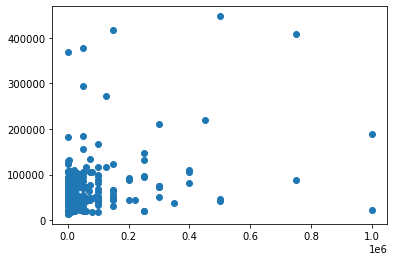

In [22]:
plt.pyplot.scatter(y_test,predictions)

***

In [25]:
columns=["Civilian_Casualties","Count_of_Persons_Rescued","Estimated_Number_Of_Persons_Displaced","Incident_Station_Area","Incident_Ward","lat","long"]

In [26]:
X = archivo[columns]
y = archivo['Estimated_Dollar_Loss']

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training the Model

In [10]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()

In [86]:
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [87]:
# print the coeficients
print(lm.coef_)

[ 23791.11862476   3128.80704774    325.82113514     95.28932131
   1795.68037648 -19843.19100693 -16899.29612883]


In [88]:
# print the intercept
print(lm.intercept_)

-481231.88973737886


In [89]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Estimated Dollar Loss Coefficient'])
coeff_df

Estimated Dollar Loss Coefficient
Civilian_Casualties                                         23791.118625
Count_of_Persons_Rescued                                     3128.807048
Estimated_Number_Of_Persons_Displaced                         325.821135
Incident_Station_Area                                          95.289321
Incident_Ward                                                1795.680376
lat                                                        -19843.191007
long                                                       -16899.296129

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Civilian_Casualties** is associated with an **increase of \$23791.118625 **.
- Holding all other features fixed, a 1 unit increase in **Count_of_Persons_Rescued** is associated with an **increase of \$3128.807048 **.
- Holding all other features fixed, a 1 unit increase in **Estimated_Number_Of_Persons_Displaced** is associated with an **increase of \$325.821135 **.
- Holding all other features fixed, a 1 unit increase in **Incident_Station_Area** is associated with an **increase of \$95.289321 **.
- Holding all other features fixed, a 1 unit increase in **Incident_Ward** is associated with an **increase of \$1795.680376 **.
- Holding all other features fixed, a 1 unit increase in **lat** is associated with an **decrease of \$19843.191007 **.
- Holding all other features fixed, a 1 unit increase in **long** is associated with an **decrease of \$16899.296129 **.

Does this make sense? Probably not depending on the column.



### Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [90]:
predictions = lm.predict(X_test)

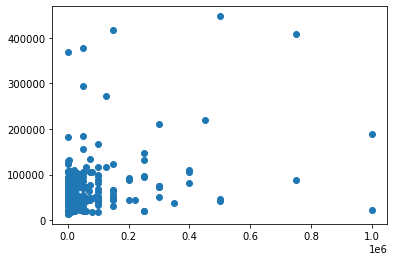

In [91]:
plt.pyplot.scatter(y_test,predictions)

### Recta

In [110]:
np.reshape(lm.coef_,7)[0]

23791.118624763258

In [105]:
np.reshape(lm.intercept_,1)

array([-481231.88973738])

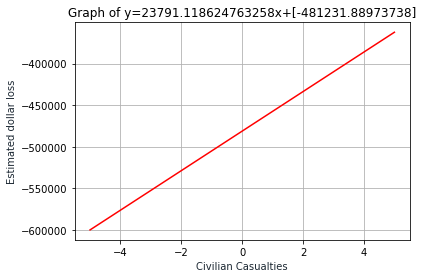

In [119]:
def abline(coef,intercept):
    x = np.linspace(-5,5,100)
    y = coef*x+intercept  #y=ax+b
    
    plt.pyplot.plot(x, y, '-r', label='Coef[0] (Civilian Casualties) y='+str(coef)+'x+'+str(intercept))
    plt.pyplot.title('Graph of y='+str(coef)+'x+'+str(intercept))
    plt.pyplot.xlabel('Civilian Casualties', color='#1C2833')
    plt.pyplot.ylabel('Estimated dollar loss', color='#1C2833')
    plt.pyplot.grid()
    plt.pyplot.show()
    
abline(np.reshape(lm.coef_,7)[0],np.reshape(lm.intercept_,1))


**Residual Histogram**

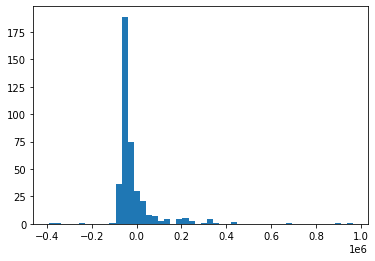

In [66]:
plt.pyplot.hist((y_test-predictions),bins=50);
#DataFrame.plot.kde(bw_method=None, ind=None, **kwargs)[source]

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 65323.59772645068
MSE: 12374355602.752592
RMSE: 111240.08091849175


# KNN / K-Nearest Neighbors

In [13]:
import seaborn as sns

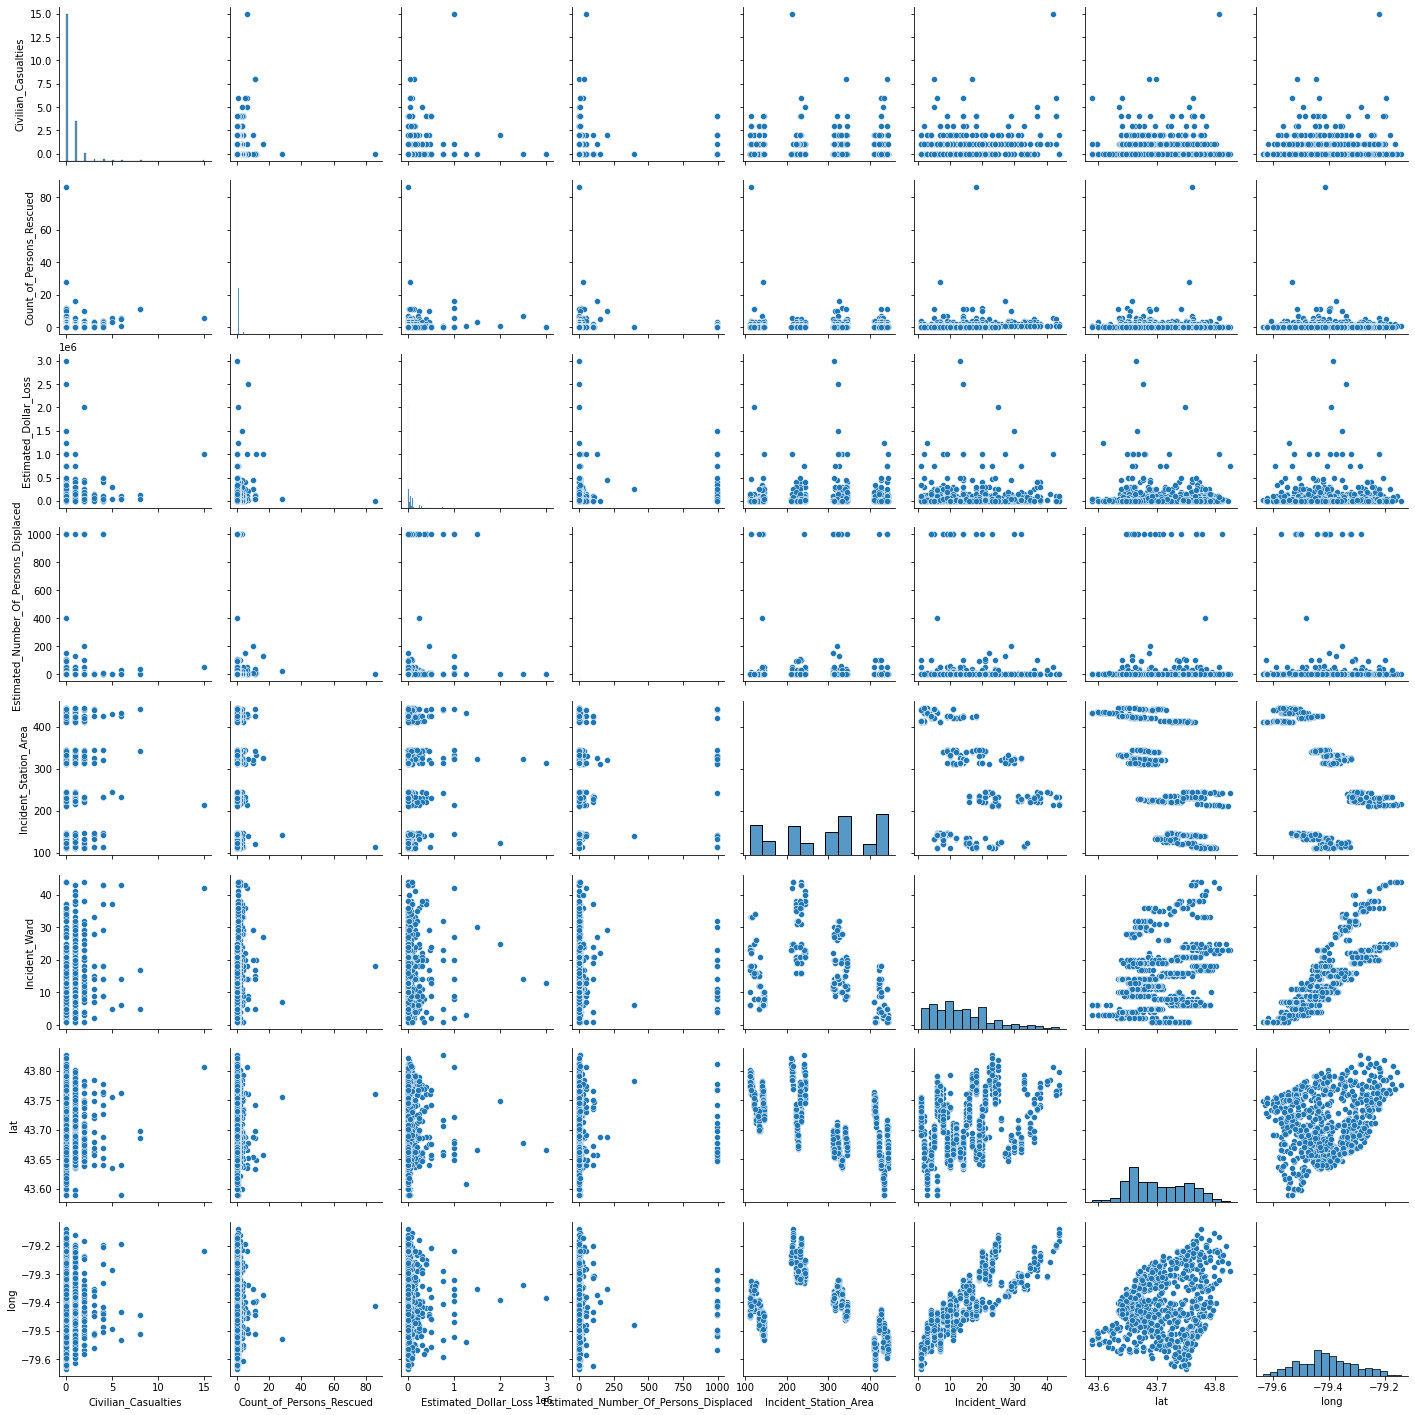

In [121]:
sns.pairplot(data=archivo)

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

Al principio había clasificado los datos de mi dataset como numéricos, categóricos y de fechas, aquí tengo las columnas categóricas que sirven para este tipo de análisis.

Columnas categóricas:
- Area_of_Origin
- Business_Impact
- Extent_Of_Fire
- Fire_Alarm_System_Impact_on_Evacuation
- Fire_Alarm_System_Operation
- Ignition_Source
- Material_First_Ignited
- Method_Of_Fire_Control
- Possible_Cause
- Smoke_Alarm_at_Fire_Origin_Alarm_Failure
- Smoke_Alarm_at_Fire_Origin_Alarm_Type
- Status_of_Fire_On_Arrival
- Fire_Alarm_System_Presence_(Refactored)

In [28]:
#Voy a aislar las columnas categoricas en otro array
columns.append("Estimated_Dollar_Loss")
columns

['Civilian_Casualties',
 'Count_of_Persons_Rescued',
 'Estimated_Number_Of_Persons_Displaced',
 'Incident_Station_Area',
 'Incident_Ward',
 'lat',
 'long',
 'Estimated_Dollar_Loss']

In [29]:
columnas = []
for columna in archivo.columns:
    if columna not in columns:
        columnas.append(columna)
        
columnas

['Area_of_Origin',
 'Business_Impact',
 'Ext_agent_app_or_defer_time',
 'Extent_Of_Fire',
 'Fire_Alarm_System_Impact_on_Evacuation',
 'Fire_Alarm_System_Operation',
 'Fire_Under_Control_Time',
 'Ignition_Source',
 'Last_TFS_Unit_Clear_Time',
 'Material_First_Ignited',
 'Method_Of_Fire_Control',
 'Possible_Cause',
 'Property_Use',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Failure',
 'Smoke_Alarm_at_Fire_Origin_Alarm_Type',
 'Status_of_Fire_On_Arrival',
 'TFS_Alarm_Time',
 'TFS_Arrival_Time',
 'Fire_Alarm_System_Presence_(Refactored)']

Ahora que si tengo esto aislado, voy a trabajar con el scaler.

In [31]:
scaler.fit(archivo.drop(columnas,axis=1))

StandardScaler()

In [34]:
#Este es el dataframe con el que estoy entrenando el modelo, nótese que estoy procurando solo modelos numéricos
archivo.drop(columnas,axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Civilian_Casualties                    999 non-null    int64  
 1   Count_of_Persons_Rescued               999 non-null    int64  
 2   Estimated_Dollar_Loss                  999 non-null    int64  
 3   Estimated_Number_Of_Persons_Displaced  999 non-null    int64  
 4   Incident_Station_Area                  999 non-null    int64  
 5   Incident_Ward                          999 non-null    float64
 6   lat                                    999 non-null    float64
 7   long                                   999 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [35]:
scaled_features = scaler.transform(archivo.drop(columnas,axis=1))

In [36]:
cols = list(archivo.drop(columnas,axis=1).columns)
cols

['Civilian_Casualties',
 'Count_of_Persons_Rescued',
 'Estimated_Dollar_Loss',
 'Estimated_Number_Of_Persons_Displaced',
 'Incident_Station_Area',
 'Incident_Ward',
 'lat',
 'long']

In [37]:
#columns tiene otro orden, por eso no puedo utilizarlo, si uso estos nombres con este orden 
#mi DF quedará con las columnas mal tageadas
columns

['Civilian_Casualties',
 'Count_of_Persons_Rescued',
 'Estimated_Number_Of_Persons_Displaced',
 'Incident_Station_Area',
 'Incident_Ward',
 'lat',
 'long',
 'Estimated_Dollar_Loss']

In [39]:
df_feat = pd.DataFrame(scaled_features,columns=cols)
df_feat.head()

Civilian_Casualties  Count_of_Persons_Rescued  Estimated_Dollar_Loss  \
0            -0.414681                 27.033600              -0.294459   
1            -0.414681                  8.652516              -0.052214   
2             0.608198                  4.849533               4.844245   
3            -0.414681                  3.581872               4.844245   
4             7.768348                  3.264957               0.334349   

   Estimated_Number_Of_Persons_Displaced  Incident_Station_Area  \
0                              -0.174825              -1.618654   
1                               0.020074              -1.361448   
2                               0.730063               0.319576   
3                              -0.077376               0.383878   
4                              -0.160904               1.394330   

   Incident_Ward       lat      long  
0       0.432727  1.182197 -0.056702  
1      -0.752821  1.063418 -1.244179  
2       1.402721 -0.922647  0.336154  
3       0.648281 -1.085018  0.132369  
4      -0.968376 -0.092201 -1.054081

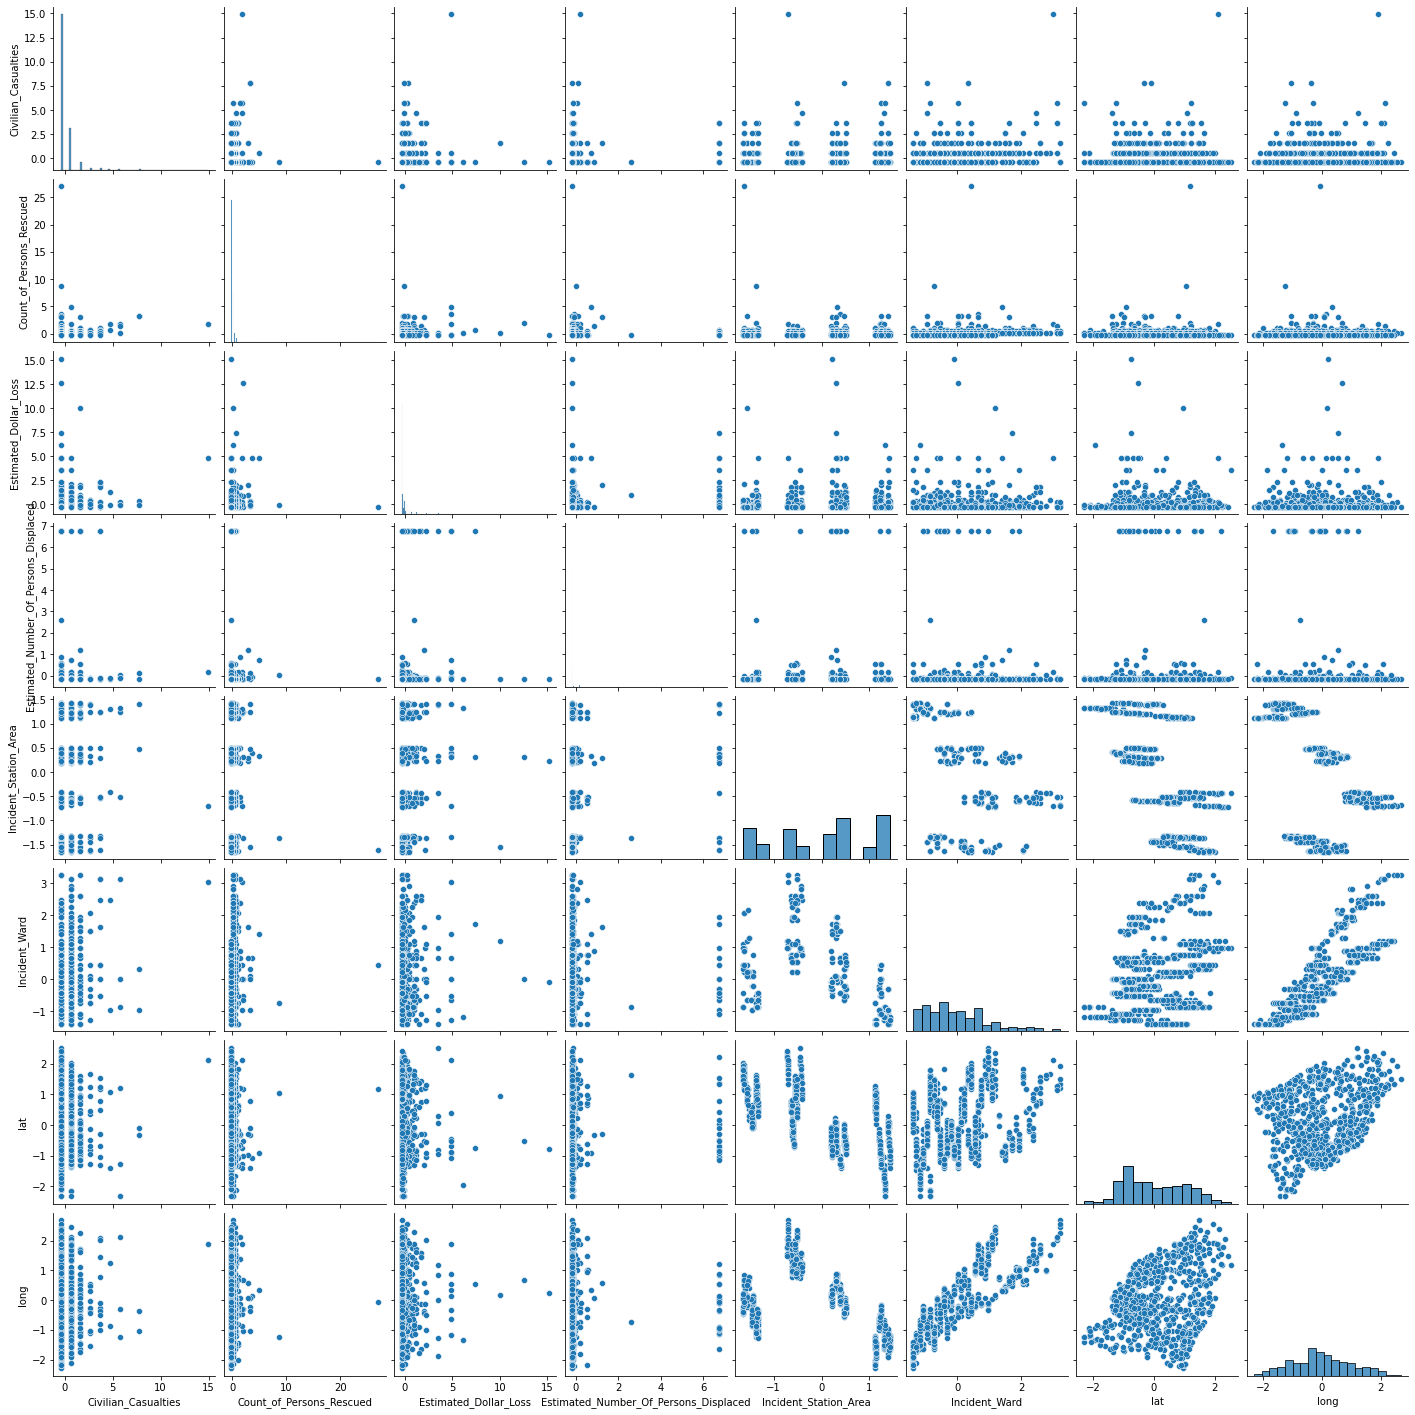

In [40]:
sns.pairplot(data=df_feat)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,archivo["Fire_Alarm_System_Presence_(Refactored)"],test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [46]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred))

[[  7   9  22   7]
 [ 19  10  16   6]
 [ 18  21 130  13]
 [  6   5   8   3]]


In [49]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

     No System       0.14      0.16      0.15        45
Not applicable       0.22      0.20      0.21        51
       Present       0.74      0.71      0.73       182
  Undetermined       0.10      0.14      0.12        22

      accuracy                           0.50       300
     macro avg       0.30      0.30      0.30       300
  weighted avg       0.51      0.50      0.51       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [50]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

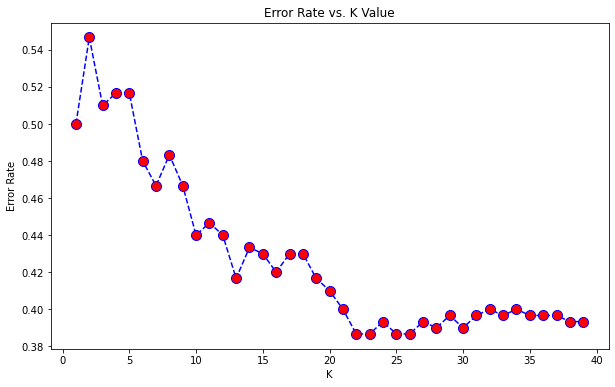

In [52]:
plt.pyplot.figure(figsize=(10,6))
plt.pyplot.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.pyplot.title('Error Rate vs. K Value')
plt.pyplot.xlabel('K')
plt.pyplot.ylabel('Error Rate')

Here we can see that that after arouns K>22 the error rate just tends to hover around 0.39-0.41 Let's retrain the model with that and check the classification report!

In [53]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[  7   9  22   7]
 [ 19  10  16   6]
 [ 18  21 130  13]
 [  6   5   8   3]]


                precision    recall  f1-score   support

     No System       0.14      0.16      0.15        45
Not applicable       0.22      0.20      0.21        51
       Present       0.74      0.71      0.73       182
  Undetermined       0.10      0.14      0.12        22

      accuracy                           0.50       300
     macro avg       0.30      0.30      0.30       300
  weighted avg       0.51      0.50      0.51       300



In [54]:
# NOW WITH K=22
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[  0   6  39   0]
 [  0   3  48   0]
 [  1   1 180   0]
 [  1   1  19   1]]


                precision    recall  f1-score   support

     No System       0.00      0.00      0.00        45
Not applicable       0.27      0.06      0.10        51
       Present       0.63      0.99      0.77       182
  Undetermined       1.00      0.05      0.09        22

      accuracy                           0.61       300
     macro avg       0.48      0.27      0.24       300
  weighted avg       0.50      0.61      0.49       300

